# Importing the libraries and loading the data set


In [70]:
# Importing Libraries required
import pandas as pd
import numpy as np
from math import floor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MultiLabelBinarizer

from umap import UMAP
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [71]:
# Loading the data from the file
data = pd.read_csv('mh.csv')
data2 = data.copy()
# Show the number of rows and columns 
print(data.shape)

(1433, 63)


# Preproccessing the data

In [72]:
# Showing the first 5 columns
print(data.columns[:5], "\n")

# Renaming the columns
data.columns = ['is_self_employed','number_of_employees','is_tech_company','is_role_tech_related','provides_mental_health_benefits','aware_of_mental_health_options','employer_discusses_mental_health',
    'employer_resources_for_mental_health','anonymity_protected_for_treatment','request_medical_leave_due_to_mental_health','fear_negative_consequences_discussing_mental_health',
    'fear_negative_consequences_discussing_physical_health','comfortable_discussing_mental_health_with_coworkers','comfortable_discussing_mental_health_with_supervisors','employer_takes_mental_health_seriously',
    'observed_negative_consequences_for_open_discussions','has_medical_coverage_for_mental_health','aware_of_local_or_online_mental_health_resources','disclosed_mental_health_issue_to_clients',
    'disclosure_impact_on_relationships_with_clients','disclosed_mental_health_issue_to_coworkers','disclosure_impact_on_relationships_with_coworkers','productivity_impacted_by_mental_health',
    'percentage_of_work_time_impacted_by_mental_health','has_previous_employers','previous_employers_provided_mental_health_benefits','aware_of_mental_health_options_with_previous_employers',
    'previous_employers_discussed_mental_health','previous_employers_resources_for_mental_health','anonymity_protected_for_previous_employers','fear_negative_consequences_discussing_mental_health_previous',
    'fear_negative_consequences_discussing_physical_health_previous','willing_to_discuss_mental_health_with_previous_coworkers',
    'willing_to_discuss_mental_health_with_previous_supervisors','previous_employers_took_mental_health_seriously','observed_negative_consequences_for_coworkers_previous','willing_to_discuss_physical_health_in_interview',
    'reason_for_willingness_to_discuss_physical_health','willing_to_discuss_mental_health_in_interview','reason_for_willingness_to_discuss_mental_health','fear_career_impact_from_mental_health_disclosure',
    'fear_negative_view_from_coworkers_due_to_mental_health','willing_to_share_mental_health_with_friends_family',
    'observed_unsupportive_response_to_mental_health_issues','impact_of_observing_others_on_disclosure_of_mental_health',
    'family_history_of_mental_illness','history_of_mental_health_disorder','current_mental_health_disorder','diagnosed_conditions','suspected_conditions','diagnosed_by_professional',
    'diagnosed_conditions_by_professional','sought_treatment_for_mental_health','treatment_interference_with_work_when_effectively_treated','treatment_interference_with_work_when_not_effectively_treated',
    'age','gender','country_of_residence','us_state_or_territory_of_residence','country_of_work','us_state_or_territory_of_work','work_position', 'works_remotely'
]
# Showing the first 5 columns
print(data.columns[:5], "\n")

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?'],
      dtype='object') 

Index(['is_self_employed', 'number_of_employees', 'is_tech_company',
       'is_role_tech_related', 'provides_mental_health_benefits'],
      dtype='object') 



In [73]:
# Showing the first 5 rows of for refrence
print(data["country_of_residence"].head(5), "\n")

# Changing everything to lowercase and removing the sapces at the end of the string
data = data.map(lambda x: x.strip().lower() if isinstance(x, str) else x)

# Showing the first 5 rows of for refrence
print(data["country_of_residence"].head(5), "\n")

0              United Kingdom
1    United States of America
2              United Kingdom
3              United Kingdom
4    United States of America
Name: country_of_residence, dtype: object 

0              united kingdom
1    united states of america
2              united kingdom
3              united kingdom
4    united states of america
Name: country_of_residence, dtype: object 



In [74]:
# Showing the first 5 rows of for refrence
print(data["willing_to_discuss_mental_health_in_interview"].head(5), "\n")

# Replacing values
data = data.replace({
    "maybe": 'uncertain',
    "i don't know": 'uncertain',
    "i'm not sure": 'uncertain',
    "i am not sure": 'uncertain',
    "unsure": 'uncertain',
    "maybe/not sure": 'uncertain',
    "n/a (not currently aware)": 'inapplicable',
    "not applicable to me": 'inapplicable',
    "not eligible for coverage / n/a": 'inapplicable',
    "not applicable to me (i do not have a mental illness)": 'inapplicable',    
    })

# Showing the first 5 rows of for refrence
print(data["willing_to_discuss_mental_health_in_interview"].head(5), "\n")

0    maybe
1       no
2      yes
3    maybe
4       no
Name: willing_to_discuss_mental_health_in_interview, dtype: object 

0    uncertain
1           no
2          yes
3    uncertain
4           no
Name: willing_to_discuss_mental_health_in_interview, dtype: object 



In [75]:
# Showing the first 5 rows of for refrence
print(data["observed_unsupportive_response_to_mental_health_issues"].head(5), "\n")

# Cleaning observed_unsupportive_response_to_mental_health_issues to match yes no uncertain format
data['observed_unsupportive_response_to_mental_health_issues'] = data['observed_unsupportive_response_to_mental_health_issues'].apply(
    lambda x: "yes" if isinstance(x, str) and 'yes' in x else x)

# Showing the first 5 rows of for refrence
print(data["observed_unsupportive_response_to_mental_health_issues"].head(5), "\n")

0                    no
1                    no
2             uncertain
3                    no
4    yes, i experienced
Name: observed_unsupportive_response_to_mental_health_issues, dtype: object 

0           no
1           no
2    uncertain
3           no
4          yes
Name: observed_unsupportive_response_to_mental_health_issues, dtype: object 



In [76]:
# Showing the first 5 rows of for refrence
print(data['percentage_of_work_time_impacted_by_mental_health'].head(5), "\n")

# Encoding and replacing values in percentage_of_work_time_impacted_by_mental_health
data['percentage_of_work_time_impacted_by_mental_health'] = data['percentage_of_work_time_impacted_by_mental_health'].map({
    "1-25%": 0.25,
    "26-50%": 0.5,
    "51-75%": 0.75,
    "76-100%": 1.0
    })

# Showing the first 5 rows of for refrence
print(data['percentage_of_work_time_impacted_by_mental_health'].head(5), "\n")

0      NaN
1      NaN
2      NaN
3    1-25%
4      NaN
Name: percentage_of_work_time_impacted_by_mental_health, dtype: object 

0     NaN
1     NaN
2     NaN
3    0.25
4     NaN
Name: percentage_of_work_time_impacted_by_mental_health, dtype: float64 



In [77]:
# Showing the first 5 rows of for refrence
print(data["fear_negative_view_from_coworkers_due_to_mental_health"].head(5), "\n")

# Remaping values of fear_negative_view_from_coworkers_due_to_mental_health for unified format
data['fear_negative_view_from_coworkers_due_to_mental_health'] = data['fear_negative_view_from_coworkers_due_to_mental_health'].replace({
    'yes, i think they would': 'yes, I think so',
    "no, i don't think they would": "no, I don't think so",
    'yes, they do': 'yes, I experienced it',
    'no, they do not': "no, I didn't experience it"
})

# Showing the first 5 rows of for refrence
print(data["fear_negative_view_from_coworkers_due_to_mental_health"].head(5), "\n")

0    no, i don't think they would
1    no, i don't think they would
2                       uncertain
3                       uncertain
4                       uncertain
Name: fear_negative_view_from_coworkers_due_to_mental_health, dtype: object 

0    no, I don't think so
1    no, I don't think so
2               uncertain
3               uncertain
4               uncertain
Name: fear_negative_view_from_coworkers_due_to_mental_health, dtype: object 



In [78]:
# Showing the first 5 rows of for refrence
print(data["fear_career_impact_from_mental_health_disclosure"].head(5), "\n")

# remapin values of fear_career_impact_from_mental_health_disclosure for unified format
data['fear_career_impact_from_mental_health_disclosure'] = data['fear_career_impact_from_mental_health_disclosure'].replace({
    'yes, i think it would': 'yes, I think so',
    "no, i don't think it would": "no, I don't think so",
    'yes, it has': 'yes, I experienced it',
    'no, it has not': "no, I didn't experience it"
})

# Showing the first 5 rows of for refrence
print(data["fear_career_impact_from_mental_health_disclosure"].head(5), "\n")

0                     uncertain
1    no, i don't think it would
2                     uncertain
3         yes, i think it would
4         yes, i think it would
Name: fear_career_impact_from_mental_health_disclosure, dtype: object 

0               uncertain
1    no, I don't think so
2               uncertain
3         yes, I think so
4         yes, I think so
Name: fear_career_impact_from_mental_health_disclosure, dtype: object 



In [79]:
# Remaping multiple columns for more unified format
mapping = {
    "all":["all", "yes", "always"],
    "some":["some", "sometimes"],
    "none":["none","no","never"]
}

def mapping_function(x):
    if isinstance(x, str) and x not in ["uncertain", "inapplicable"]:
        for key, values in mapping.items():
            if any(value in x for value in values):
                return key
    else:
        return x

for column in data.select_dtypes(include=['object']).columns:
    if len(data[column].value_counts()) == 2:
        data[column] = data[column].map({"yes": 1, "no": 0})

    if len(data[column].value_counts()) == 3 and not set(data[column].value_counts().index) == {"yes", "no", "uncertain"}:
        data[column] = data[column].apply(mapping_function)

    if len(data[column].value_counts()) == 4 and not set(data[column].value_counts().index) == {"yes", "no", "uncertain", "inapplicable"}:
        data[column] = data[column].apply(mapping_function)

In [80]:
# Showing the 10 lowest value counts for refrence
print(data["gender"].value_counts().tail(10), "\n")

# Cleaning Gender
man = ["male","m","malr","sex is male","mail" , "dude","m|",
        "i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take?",
        "male.", "man"]
woman = ["f","woman", "female", "fm", " female", "female/woman",
         "female (props for making this a freeform field, though)",
         "fem", "female ", "i identify as female."]

data["gender"] = data["gender"].replace(man, "man")
data["gender"] = data["gender"].replace(woman, "woman")
data["gender"] = data["gender"].apply(lambda x: "diverse" if x not in ["man", "woman"] else x)

# Showing the 10 lowest value counts for refrence
print(data["gender"].value_counts().tail(5), "\n")

gender
nb masculine                1
cisgender female            1
sex is male                 1
none of your business       1
fm                          1
female assigned at birth    1
genderfluid                 1
enby                        1
malr                        1
transgender woman           1
Name: count, dtype: int64 

gender
man        1050
woman       334
diverse      49
Name: count, dtype: int64 



In [81]:
# Showing the first 5 rows of for refrence
print(data["us_state_or_territory_of_work"].head(5), "\n")

# Replacing empty values from states with "not specified"
data['us_state_or_territory_of_residence'] = data['us_state_or_territory_of_residence'].apply(lambda x: x if isinstance(x, str) else 'not specified')
data['us_state_or_territory_of_work'] = data['us_state_or_territory_of_work'].apply(lambda x: x if isinstance(x, str) else 'not specified')

# Showing the first 5 rows of for refrence
print(data["us_state_or_territory_of_work"].head(5), "\n")

0         NaN
1    illinois
2         NaN
3         NaN
4    illinois
Name: us_state_or_territory_of_work, dtype: object 

0    not specified
1         illinois
2    not specified
3    not specified
4         illinois
Name: us_state_or_territory_of_work, dtype: object 



In [82]:
# Showing the first 5 rows of for refrence
print(data["number_of_employees"].head(5), "\n")

# Fixing the issue with number of employees
data["number_of_employees"] = data["number_of_employees"].replace({
    "more than 1000":"above 1000",
    "500-1000":"500 to 1000",
    "100-500":"100 to 500",
    "26-100":"26 to 100",
    "6-25":"6 to 25",
    "1-5":"1 to 5",
})

# Showing the first 5 rows of for refrence
print(data["number_of_employees"].head(5), "\n")

0    26-100
1      6-25
2      6-25
3       NaN
4      6-25
Name: number_of_employees, dtype: object 

0    26 to 100
1      6 to 25
2      6 to 25
3          NaN
4      6 to 25
Name: number_of_employees, dtype: object 



In [83]:
# Showing the 5 lowest value counts for refrence
print(data["age"].value_counts().tail(5), "\n")

# Removing outliers from age
data['age'] = data['age'].apply(lambda x: x if x < 80 and x >= 18 else np.nan)

# Showing the 5 lowest value counts for refrence
print(data["age"].value_counts().tail(5), "\n")

age
58     1
62     1
323    1
99     1
70     1
Name: count, dtype: int64 

age
58.0    1
66.0    1
65.0    1
74.0    1
70.0    1
Name: count, dtype: int64 



In [84]:
# Showing the value counts for refrence
print(len(data['reason_for_willingness_to_discuss_mental_health'].value_counts()), "\n")

# Cleaning the reasons for unification
reasons = [
    'reason_for_willingness_to_discuss_physical_health',
    'reason_for_willingness_to_discuss_mental_health'
]

mapping = {
    "stigma": ["stigma", "acceptance"],
    "uncertain": ["uncertain","idk"],
    "wont_discuss": ["private", "privacy", "relevant", "none", "business", "concern", "useless", "information", "know","because","problems"],
    "honesty": ["honesty","fortunate","problem", "open", "transparent", "honest", "acceptable", "accepted", "aware", "personal", "not an issue", ],
    "bias": ["bias"]
}

def mapping_reasons(x):
    if isinstance(x, str):
        for key, values in mapping.items():
            if any(value in x for value in values):
                return key
        return "other" 
    else:
        return x

for reason in reasons:
    data[reason] = data[reason].apply(mapping_reasons)

# Showing the value counts for refrence
print(len(data['reason_for_willingness_to_discuss_mental_health'].value_counts()), "\n")

1062 

6 



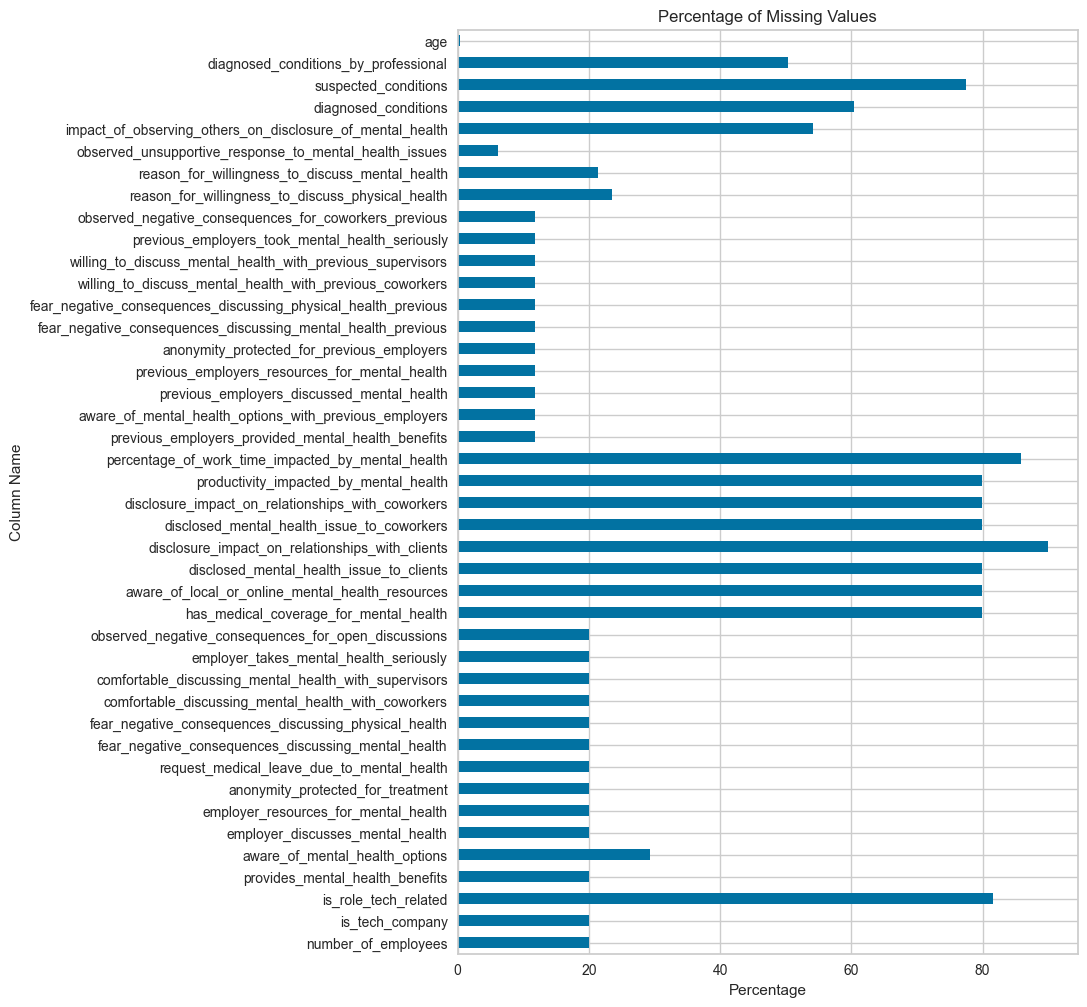

In [85]:
# Visualising the percentage of valeus missing
missing_values = data.isnull().sum() * 100 / len(data)
missing_values_columns = missing_values[missing_values > 0]

plt.figure(figsize=(8,12))
missing_values_columns.plot(kind='barh')
plt.title('Percentage of Missing Values')
plt.ylabel('Column Name')
plt.xlabel('Percentage')
plt.show()

In [86]:
# Showing the number of columns with missing values
print("Number of columns with missing values: ",len(data.isnull().sum()[data.isnull().sum() > 0]), "\n")

# Handle missing values from numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns
num_imputer = SimpleImputer(strategy='median')
data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])

# Handle missing values from categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

# Showing the number of columns with missing values
print("Number of columns with missing values: ",len(data.isnull().sum()[data.isnull().sum() > 0]), "\n")

Number of columns with missing values:  42 

Number of columns with missing values:  0 



In [87]:
# Showing the 5 lowest value counts for refrence
print(data["age"].value_counts().tail(5), "\n")

# Simplifying age
data['age'] = pd.cut(data['age'], bins=[18, 30, 40, 50, 60, 70], 
                     labels=['18 to 30', '30 to 40', '40 to 50', '50 to 60', '60+'], 
                     right=False).fillna('60+')
data['age'] = data['age'].astype('object')

# Showing the 5 lowest value counts for refrence
print(data["age"].value_counts().tail(5), "\n")

age
58.0    1
66.0    1
65.0    1
74.0    1
70.0    1
Name: count, dtype: int64 

age
30 to 40    683
18 to 30    447
40 to 50    235
50 to 60     57
60+          11
Name: count, dtype: int64 



In [88]:
# Droping country_of_residence and us_state_or_territory_of_residence beacuse of high cardinality
data.drop(["country_of_work", "us_state_or_territory_of_work"], axis=1, inplace=True)

# Encoding

In [89]:
# Copy data before encoding
unencoded_data = data.copy()

In [90]:
# Serperating the type of columns
YN_cols, YNM_cols, NSA_cols, YNMU_cols, NSAM_cols, fifth_col, sixth_col, multi_col, main_cols = [], [], [], [], [], [], [], [], []

for column in data.columns:
    if data[column].nunique() == 2:
        YN_cols.append(column)

for column in data.columns:
    if data[column].nunique() == 3:
        if {"yes", "no", 'uncertain'} == set(data[column].unique()):
            YNM_cols.append(column)
        elif {"some", "none", "all"} == set(data[column].unique()):
            NSA_cols.append(column)
        else:
            main_cols.append(column)

for column in data.columns:
    if data[column].nunique() == 4:
        if {"yes", "no", 'uncertain', 'inapplicable'} == set(data[column].unique()):
            YNMU_cols.append(column)
        elif {"some", "none", "all", "uncertain"} == set(data[column].unique()) or {"some", "none", "all", "inapplicable"} == set(data[column].unique()):
            NSAM_cols.append(column)

for column in data.columns:
    if data[column].nunique() == 5:
        if column == 'age':
            main_cols.append(column)
        else:
            fifth_col.append(column)

for column in data.columns:
    if data[column].nunique() == 6:
        if column == 'number_of_employees':
            main_cols.append(column)
        else:
            sixth_col.append(column)

for column in data.columns:
    if data[column].nunique() > 6:
        multi_col.append(column)

In [91]:
# Use Label Encoding for binary categorical columns
label_encoders = {col: LabelEncoder() for col in YN_cols}
for col in YN_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

for col in YNM_cols:
    data[col] = label_encoders.get(col, LabelEncoder()).fit_transform(data[col])

for col in YNMU_cols:
    data[col] = label_encoders.get(col, LabelEncoder()).fit_transform(data[col])

In [92]:
# Ordinal Encoding
ordinal_mapping = {'none': 0, 'some': 1, 'all': 2}
for col in NSA_cols:
    data[col] = data[col].map(ordinal_mapping)

ordinal_mapping = {'inapplicable': -2, 'uncertain':-1 , 'none': 0, 'some': 1, 'all': 2}
for col in NSAM_cols:
    data[col] = data[col].map(ordinal_mapping)

disclosure_mapping = {"inapplicable": -2, "no, because it doesn't matter": 0, "no, because it would impact me negatively": 1, "sometimes, if it comes up": 2, "yes, always": 3}
data['disclosed_mental_health_issue_to_clients'] = data['disclosed_mental_health_issue_to_clients'].map(disclosure_mapping)
data['disclosed_mental_health_issue_to_coworkers'] = data['disclosed_mental_health_issue_to_coworkers'].map(disclosure_mapping)

fear_impact_mapping = {"uncertain": -1, "no, I don't think so": 1, "no, I didn't experience it": 0, "yes, I think so": 2, "yes, I experienced it": 3}
data['fear_career_impact_from_mental_health_disclosure'] = data['fear_career_impact_from_mental_health_disclosure'].map(fear_impact_mapping)
data['fear_negative_view_from_coworkers_due_to_mental_health'] = data['fear_negative_view_from_coworkers_due_to_mental_health'].map(fear_impact_mapping)

interference_mapping = {"inapplicable": -2, "never": 0, "rarely": 1, "sometimes": 2, "often": 3}
data['treatment_interference_with_work_when_effectively_treated'] = data['treatment_interference_with_work_when_effectively_treated'].map(interference_mapping)
data['treatment_interference_with_work_when_not_effectively_treated'] = data['treatment_interference_with_work_when_not_effectively_treated'].map(interference_mapping)

leave_difficulty_mapping = {"uncertain": -1, "very easy": 4, "somewhat easy": 3, "neither easy nor difficult": 2, "somewhat difficult": 1, "very difficult": 0}
data['request_medical_leave_due_to_mental_health'] = data['request_medical_leave_due_to_mental_health'].map(leave_difficulty_mapping)

sharing_openness_mapping = {
    "inapplicable": -2, "not open at all": 0, "somewhat not open": 1, "neutral": 2, "somewhat open": 3, "very open": 4}
data['willing_to_share_mental_health_with_friends_family'] = data['willing_to_share_mental_health_with_friends_family'].map(sharing_openness_mapping)

In [93]:
# Cleaning work position
def standardize_work(work):
    return work.apply(lambda x: x.split('|'))

data['work_position'] = standardize_work(data['work_position'])

mlb = MultiLabelBinarizer()
mlb.fit(data['work_position'])
encoded = mlb.transform(data['work_position'])
encoded_data = pd.DataFrame(encoded, columns='work_position'+"_"+mlb.classes_)
data = pd.concat([data, encoded_data], axis=1)
data.drop('work_position', axis=1, inplace=True)

In [94]:
# Cleaning conditions
conditions = [
    'diagnosed_conditions',
    'suspected_conditions',
    'diagnosed_conditions_by_professional'
    ]

condition_categories = {
    # Anxiety and Mood Disorders
    "anxiety disorder (generalized, social, phobia, etc)": "anxiety_and_mood_disorders",
    "stress response syndromes": "anxiety_and_mood_disorders",
    "obsessive-compulsive disorder": "anxiety_and_mood_disorders",
    "i haven't been formally diagnosed, so i felt uncomfortable answering, but social anxiety and depression.": "anxiety_and_mood_disorders",
    "mood disorder (depression, bipolar disorder, etc)": "anxiety_and_mood_disorders",
    "depression": "anxiety_and_mood_disorders",
    "seasonal affective disorder": "anxiety_and_mood_disorders",
    "post-partum / anxiety": "anxiety_and_mood_disorders",
    # Neurodevelopmental and Behavioral Disorders
    'combination of physical impairment (strongly near-sighted) with a possibly mental one (mcd / "adhd", though its actually a stimulus filtering impairment)': "neurodevelopmental_and_behavioral_disorders",
    "autism - while not a 'mental illness', still greatly affects how i handle anxiety": "neurodevelopmental_and_behavioral_disorders",
    "attention deficit hyperactivity disorder": "neurodevelopmental_and_behavioral_disorders",
    "pervasive developmental disorder (not otherwise specified)": "neurodevelopmental_and_behavioral_disorders",
    "pdd-nos": "neurodevelopmental_and_behavioral_disorders",
    "autism (asperger's)": "neurodevelopmental_and_behavioral_disorders",
    "asperger's": "neurodevelopmental_and_behavioral_disorders",
    "autism": "neurodevelopmental_and_behavioral_disorders",
    "pdd-nos (see above)": "neurodevelopmental_and_behavioral_disorders",
    'autism - while not a "mental illness", still greatly affects how i handle anxiety': "neurodevelopmental_and_behavioral_disorders",
    "asperges": "neurodevelopmental_and_behavioral_disorders",
    "aspergers": "neurodevelopmental_and_behavioral_disorders",
    "autism spectrum disorder": "neurodevelopmental_and_behavioral_disorders",
    "asperger syndrome": "neurodevelopmental_and_behavioral_disorders",
    "add (w/o hyperactivity)": "neurodevelopmental_and_behavioral_disorders",
    "attention deficit disorder": "neurodevelopmental_and_behavioral_disorders",
    """mcd (when it was diagnosed, the ultra-mega "disorder" adhd didn't exist yet)""": "neurodevelopmental_and_behavioral_disorders",
    "attention deficit disorder (but not the hyperactive version)": "neurodevelopmental_and_behavioral_disorders",
    # Trauma and Stress-Related Disorders
    "posttraumatic stress disourder": "trauma_and_stress_related_disorders",
    "dissociative disorder": "trauma_and_stress_related_disorders",
    "post-traumatic stress disorder": "trauma_and_stress_related_disorders",
    "ptsd (undiagnosed)": "trauma_and_stress_related_disorders",
    "posttraumatic stress disorder": "trauma_and_stress_related_disorders",
    "burn out": "trauma_and_stress_related_disorders",
    "burnout": "trauma_and_stress_related_disorders",
    "depersonalisation": "trauma_and_stress_related_disorders",
    "depersonalization disorder": "trauma_and_stress_related_disorders",
    # Substance and Addiction Disorders
    "substance use disorder": "substance_and_addiction_disorders",
    "addictive disorder": "substance_and_addiction_disorders",
    "sexual addiction": "substance_and_addiction_disorders",
    # Personality and Psychotic Disorders
    "personality disorder (borderline, antisocial, paranoid, etc)": "personality_and_psychotic_disorders",
    "schizotypal personality disorder": "personality_and_psychotic_disorders",
    "psychotic disorder (schizophrenia, schizoaffective, etc)": "personality_and_psychotic_disorders",
    # Sexual and Gender Identity Disorders
    "gender dysphoria": "sexual_and_gender_identity_disorders",
    "transgender": "sexual_and_gender_identity_disorders",
    "gender identity disorder": "sexual_and_gender_identity_disorders",
    "intimate disorder": "sexual_and_gender_identity_disorders",
    # Neurological Disorders
    "traumatic brain injury": "neurological_disorders",
    "tinnitus": "neurological_disorders",
    # Crisis and Mental Health Conditions
    "suicidal ideation": "crisis_and_mental_health_conditions",
    "we're all hurt, right?!": "crisis_and_mental_health_conditions",
    # Other
    "sleeping disorder": "sleep_disorders",
    "eating disorder (anorexia, bulimia, etc)": "eating_disorders",
}

def standardize_conditions(conditions_column, mapping_dict):
    standardized_conditions = []
    for condition in conditions_column:
        conditions_list = condition.split('|')
        standardized_conditions.append(
            [mapping_dict.get(cond.strip(), "Other") for cond in conditions_list]
        )
    return standardized_conditions

for condition in data[conditions]:
    data[condition] = standardize_conditions(data[condition], condition_categories)

for condition in conditions:
    mlb = MultiLabelBinarizer()
    mlb.fit(data[condition])
    encoded = mlb.transform(data[condition])
    encoded_data = pd.DataFrame(encoded, columns=condition+"_"+mlb.classes_)
    data = pd.concat([data, encoded_data], axis=1)
    data.drop(condition, axis=1, inplace=True)

In [95]:
# Calculate frequency counts for each categorical column
freq_enc_cols = list(set(main_cols + multi_col + reasons) - {'work_position'} - set(conditions))
for col in freq_enc_cols:
    data[col] = data[col].map(data[col].value_counts())

# Dimention Reduction

In [96]:
# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data) 
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)  

scaled_data.to_csv('Cleaned_Scaled_MH_Data.csv', index=False)

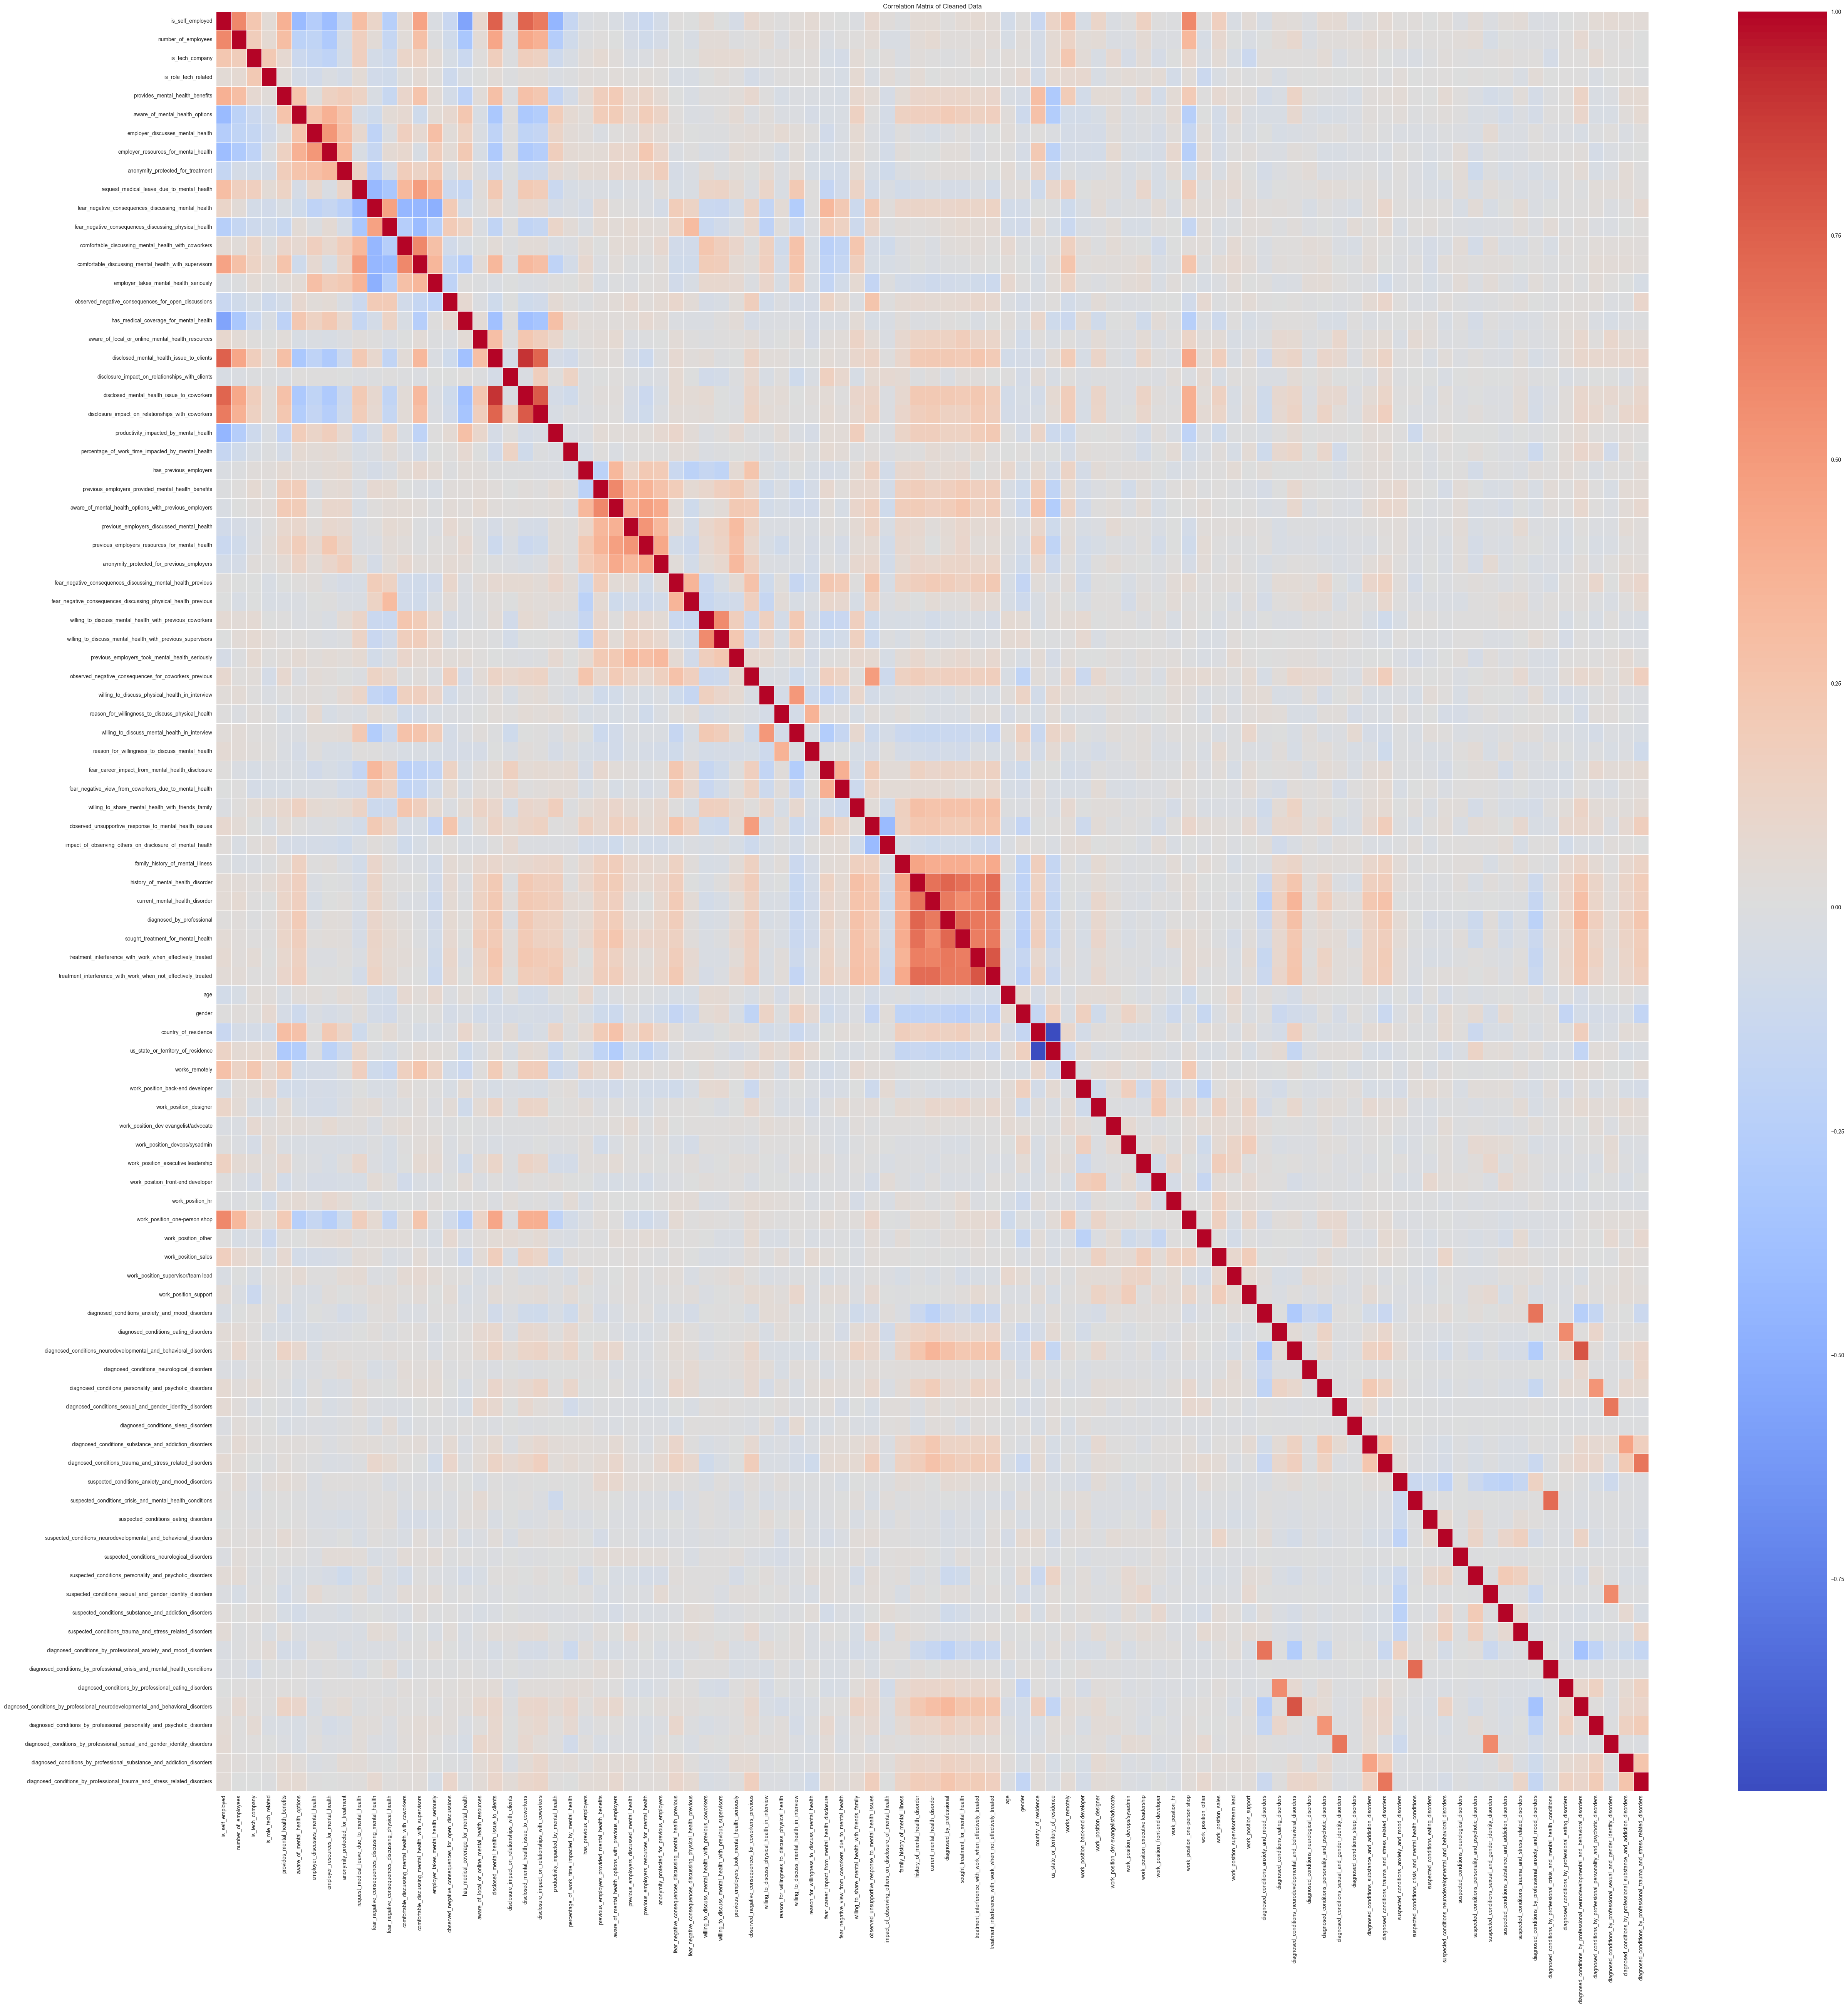

In [30]:
# Visualize correlation matrix
plt.figure(figsize=(60, 60))
sns.heatmap(scaled_data.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Cleaned Data")
plt.show()

In [97]:
# Reducing dimensionality using UMAP
umap_model = UMAP(n_components=2)
umap_data = umap_model.fit_transform(scaled_data)

# Clustering

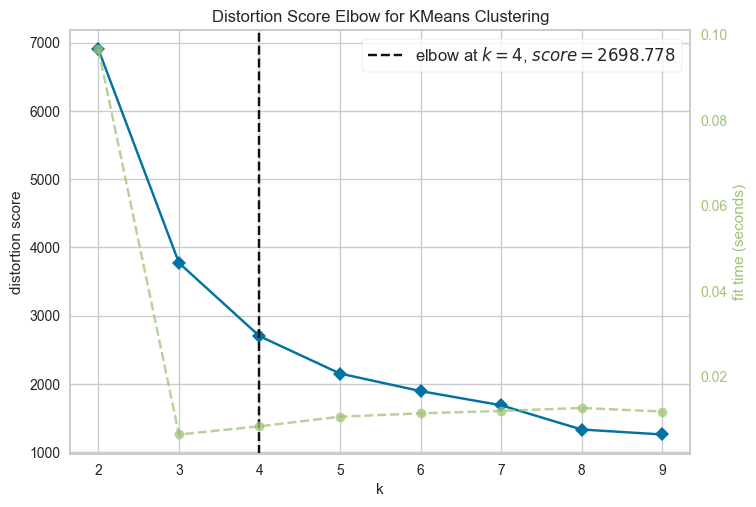

In [98]:
# Use KMeans for clustering with UMAP data
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(umap_data)
visualizer.show()

# Apply clustering
optimal_clusters = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(umap_data)
scaled_data['Cluster'] = kmeans_labels

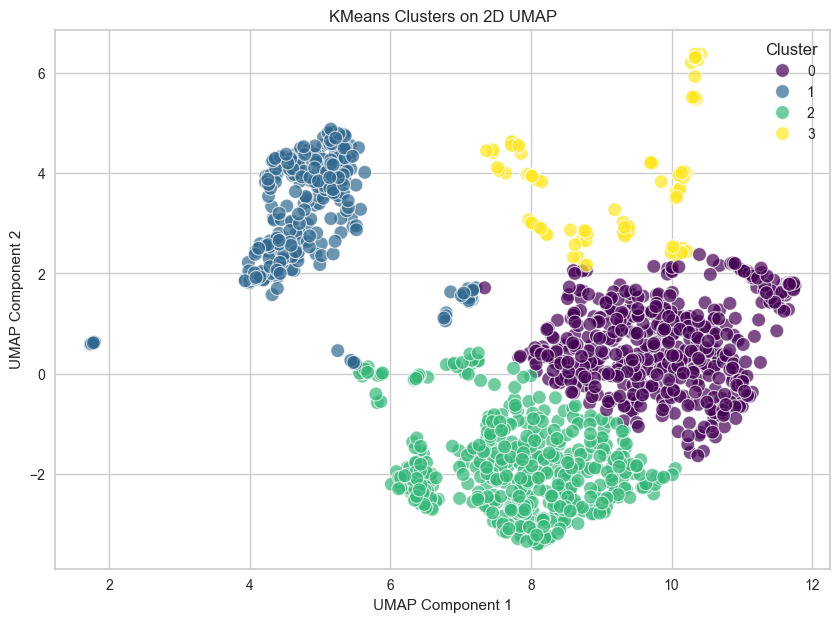

Silhouette Score: 0.49338683
Calinski-Harabasz Score: 1981.007876554496
Davies-Bouldin Score: 0.7191543220739647


In [99]:
# 2D Visualise clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=umap_data[:, 0], y=umap_data[:, 1], hue=kmeans_labels, palette='viridis', s=100, alpha=0.7)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("KMeans Clusters on 2D UMAP")
plt.legend(title='Cluster')
plt.show()

# Calculate evaluation metrics
silhouette_avg = silhouette_score(umap_data, kmeans_labels)
calinski_harabasz = calinski_harabasz_score(umap_data, kmeans_labels)
davies_bouldin = davies_bouldin_score(umap_data, kmeans_labels)

print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Davies-Bouldin Score:", davies_bouldin)

# Cluster Info


In [100]:
# Summary statistics for each cluster
cluster_summary = scaled_data.groupby('Cluster').mean()
print("\nCluster Characteristics Summary:")
print(cluster_summary)


Cluster Characteristics Summary:
         is_self_employed  number_of_employees  is_tech_company  \
Cluster                                                           
0               -0.495622            -0.284929        -0.093314   
1                1.735683             1.018854         0.421575   
2               -0.485200            -0.296124        -0.098201   
3               -0.126616            -0.055044        -0.217477   

         is_role_tech_related  provides_mental_health_benefits  \
Cluster                                                          
0                    0.102851                        -0.029125   
1                    0.102851                         0.657631   
2                    0.102851                        -0.381355   
3                   -1.057662                         0.068828   

         aware_of_mental_health_options  employer_discusses_mental_health  \
Cluster                                                                     
0           

In [101]:
# Show what each cluster represents
for cluster in scaled_data['Cluster'].unique():
    print(f"\nCluster {cluster} Top Features:")
    print(cluster_summary.loc[cluster].sort_values(ascending=False).head(floor( len(scaled_data.columns) / len(scaled_data['Cluster'].unique()) )))


Cluster 2 Top Features:
has_medical_coverage_for_mental_health                              0.276829
gender                                                              0.262886
productivity_impacted_by_mental_health                              0.222813
willing_to_discuss_mental_health_in_interview                       0.187544
diagnosed_conditions_anxiety_and_mood_disorders                     0.170160
employer_takes_mental_health_seriously                              0.135240
us_state_or_territory_of_residence                                  0.133802
work_position_back-end developer                                    0.129978
diagnosed_conditions_by_professional_anxiety_and_mood_disorders     0.117818
impact_of_observing_others_on_disclosure_of_mental_health           0.113877
suspected_conditions_substance_and_addiction_disorders              0.103932
is_role_tech_related                                                0.102851
employer_discusses_mental_health                   

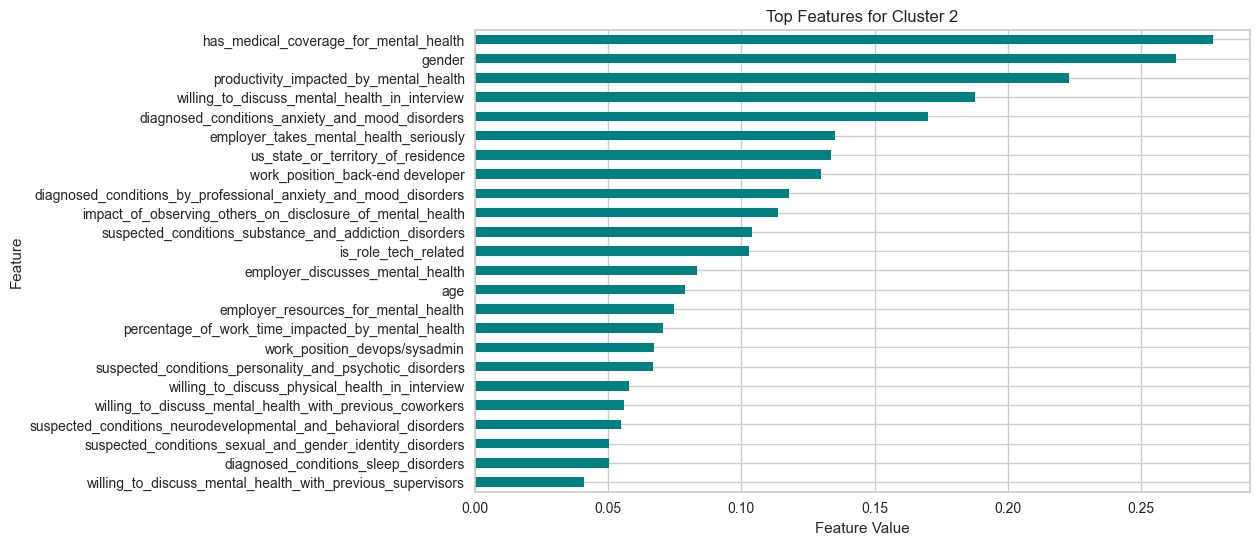

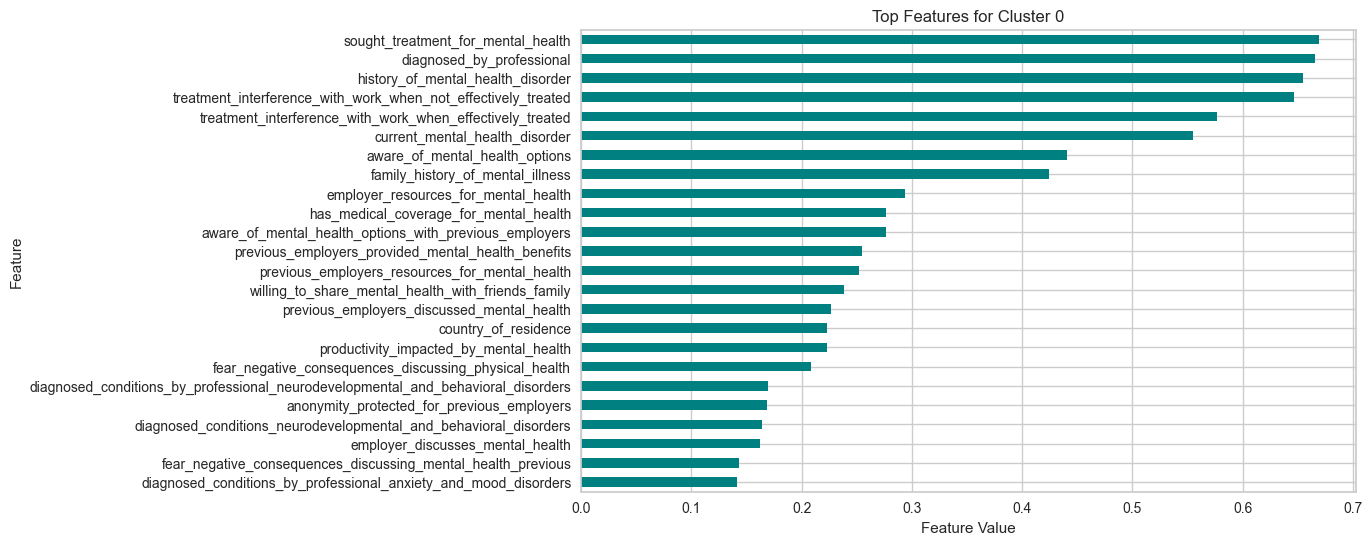

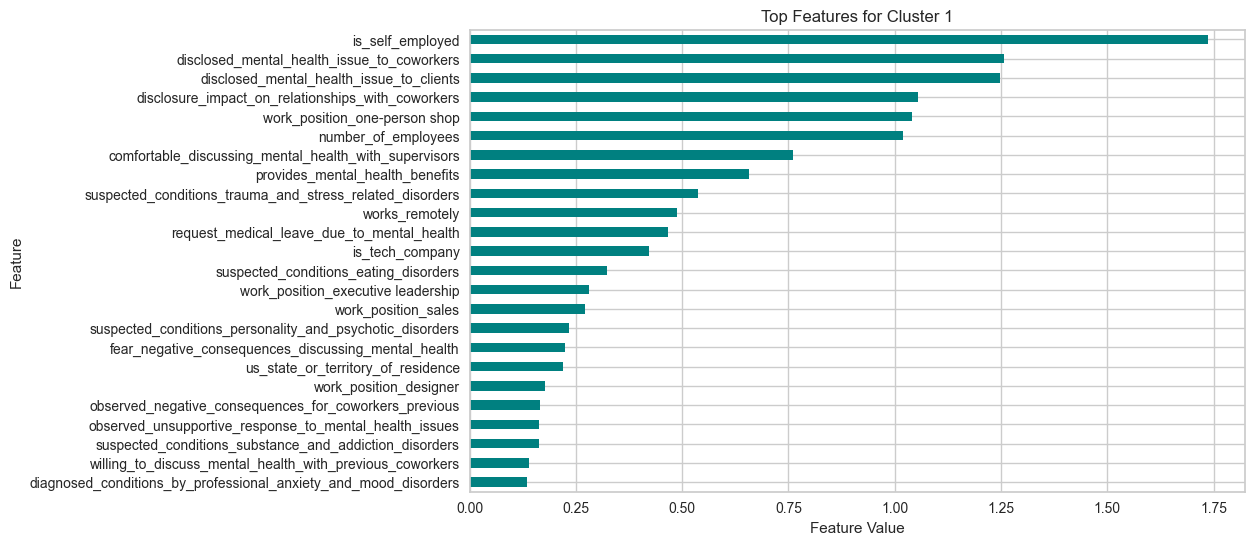

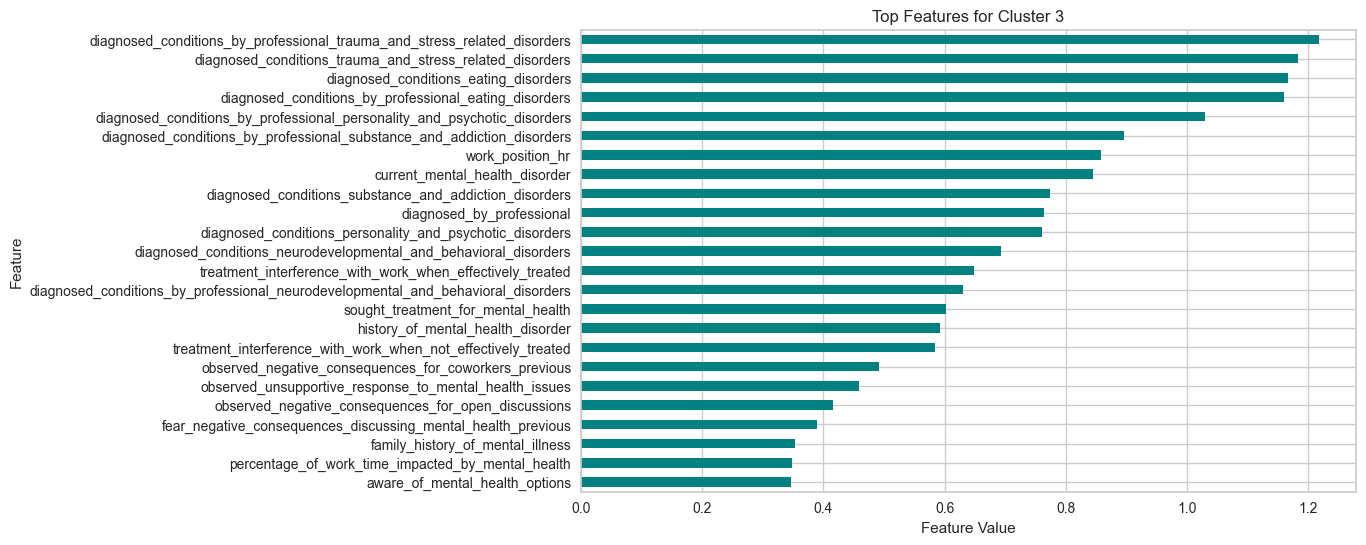

In [102]:
# Bar chart for top features in a specific cluster
for cluster_id in scaled_data['Cluster'].unique():
    top_features = cluster_summary.loc[cluster_id].sort_values(ascending=False).head(floor( len(scaled_data.columns) / len(scaled_data['Cluster'].unique()) ))

    plt.figure(figsize=(10, 6))
    top_features.plot(kind='barh', color='teal')
    plt.title(f'Top Features for Cluster {cluster_id}')
    plt.xlabel('Feature Value')
    plt.ylabel('Feature')
    plt.gca().invert_yaxis()
    plt.show()


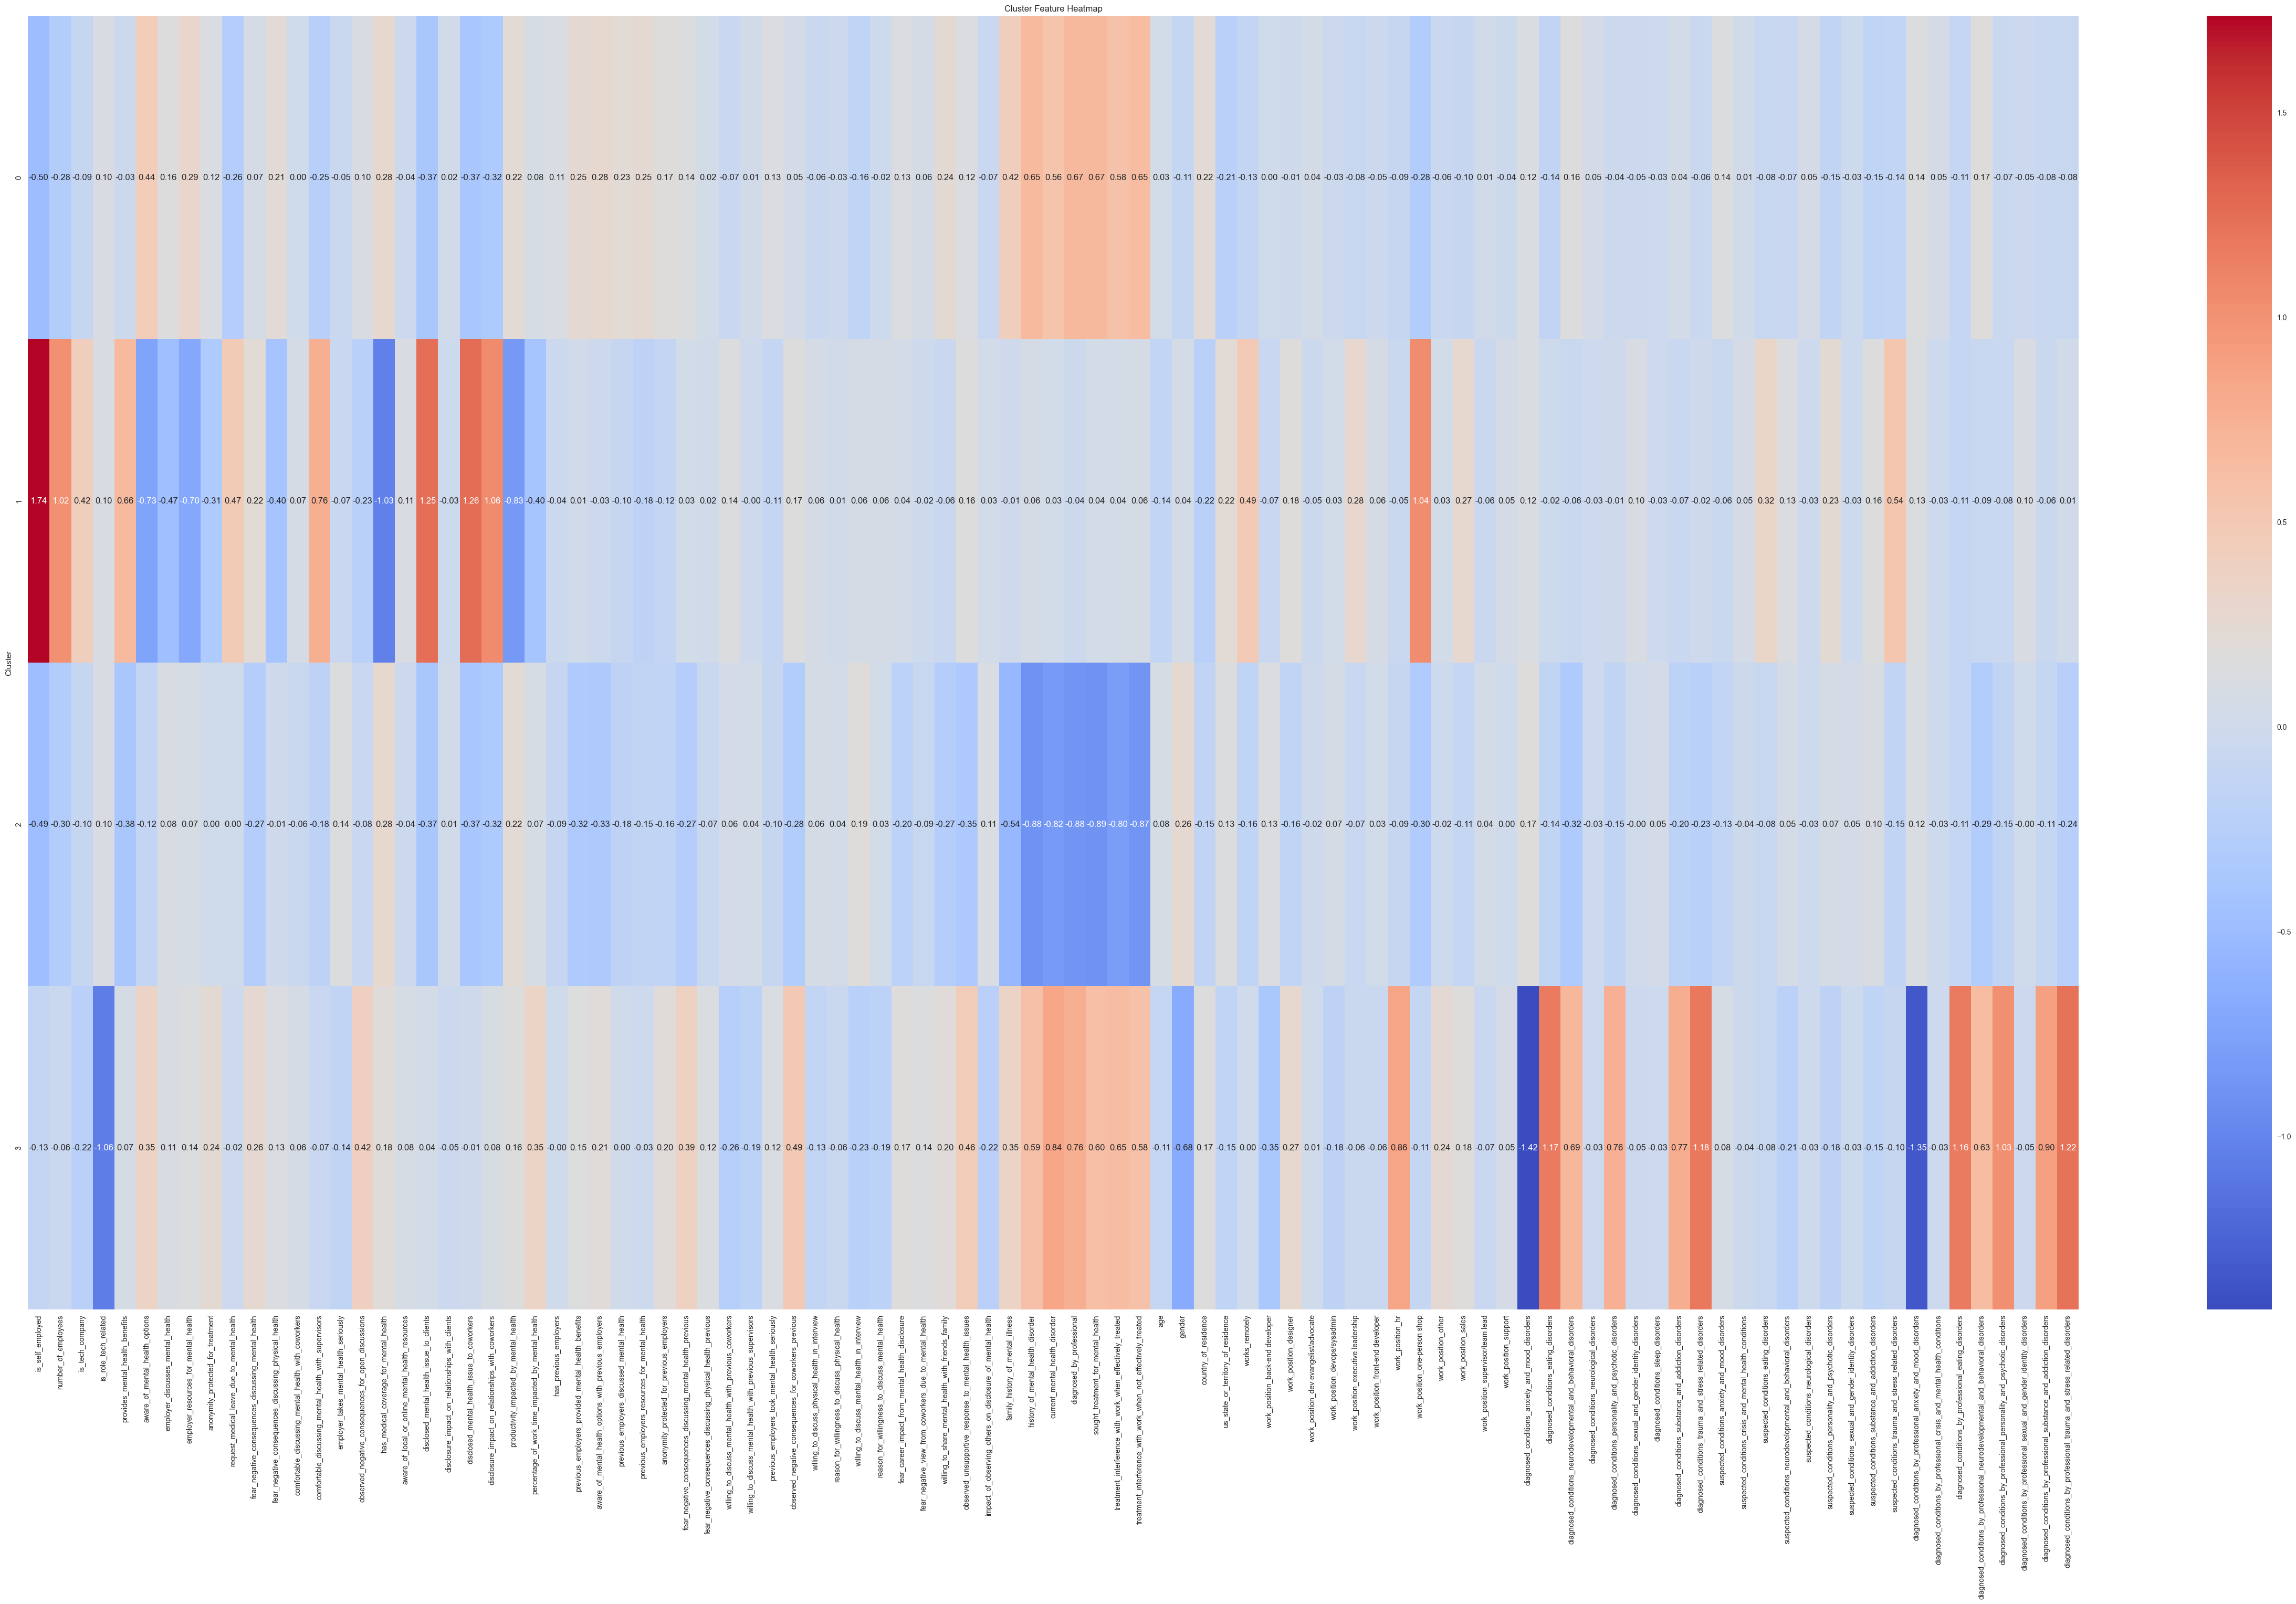

In [103]:
# Visualize cluster feature heatmap
plt.figure(figsize=(63, 32))
sns.heatmap(cluster_summary, cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Cluster Feature Heatmap")
plt.show()

# Final Graphs

In [104]:
# Decoding the data for the graphs and  
mappings = {
    column: dict(zip(data[column], unencoded_data[column]))
    for column in unencoded_data.columns if column in data.columns
}

for column, mapping in mappings.items():
    data[column] = data[column].map(mapping)

data = data.replace({
    0 : 'no',
    1 : 'yes',
})

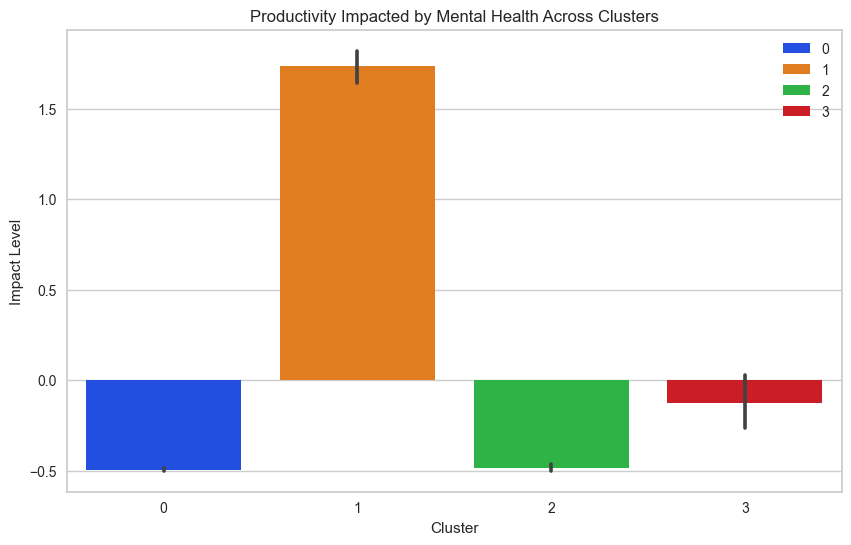

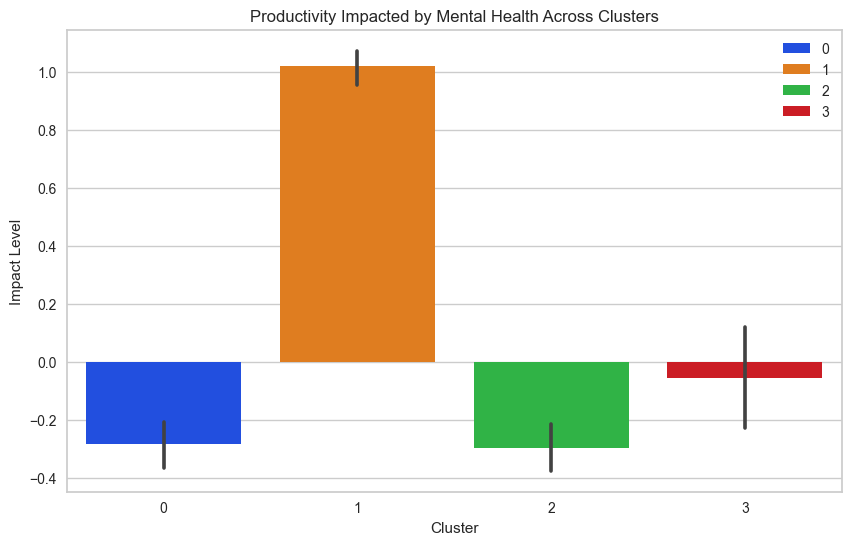

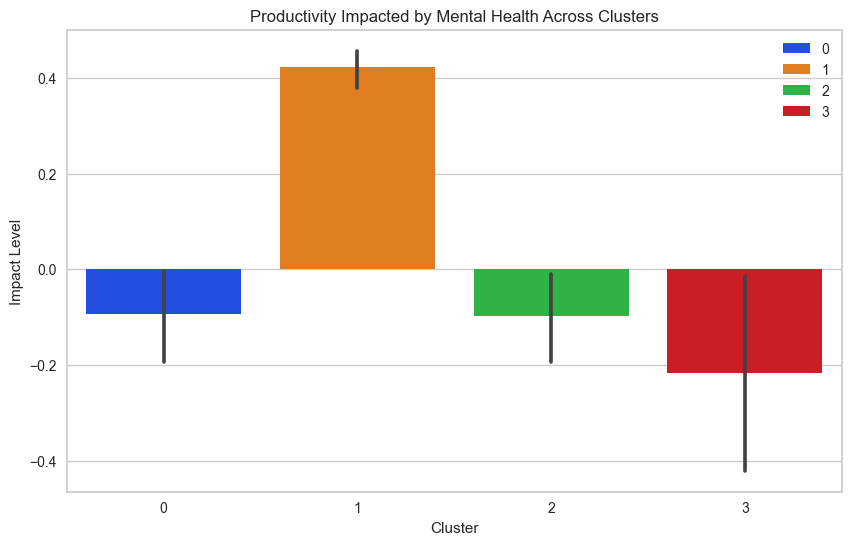

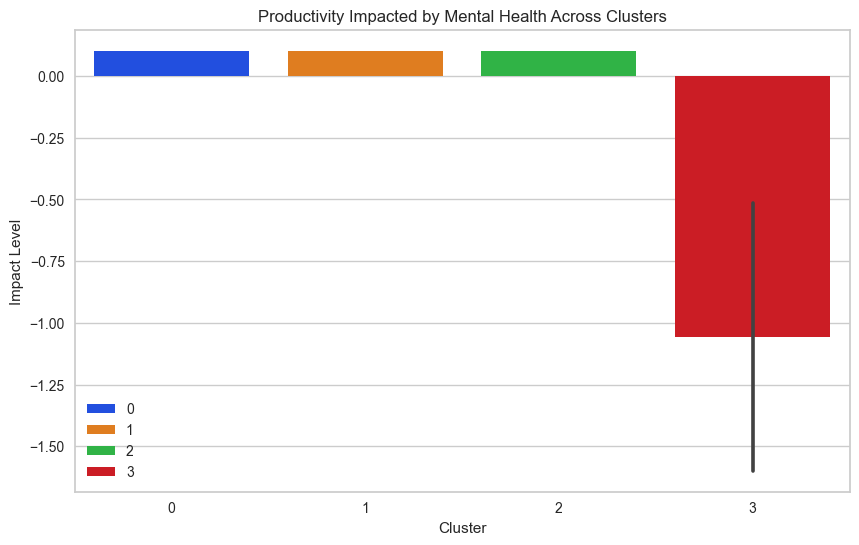

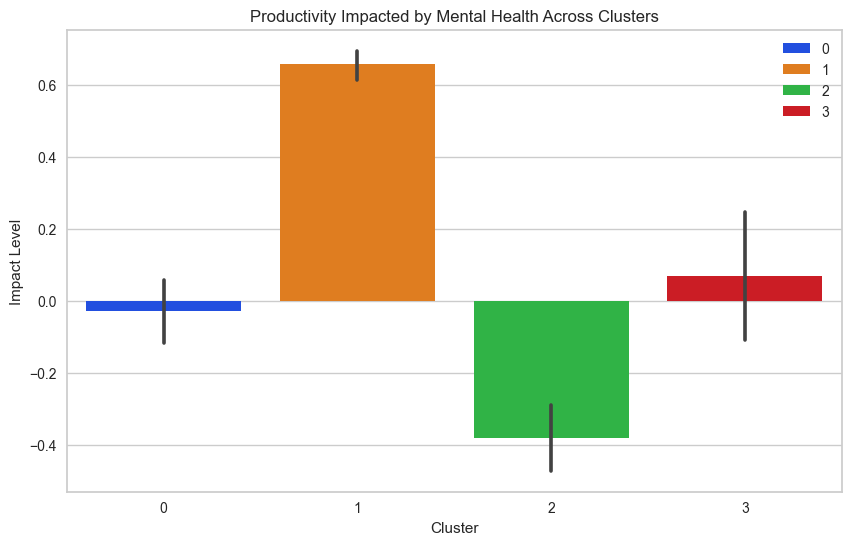

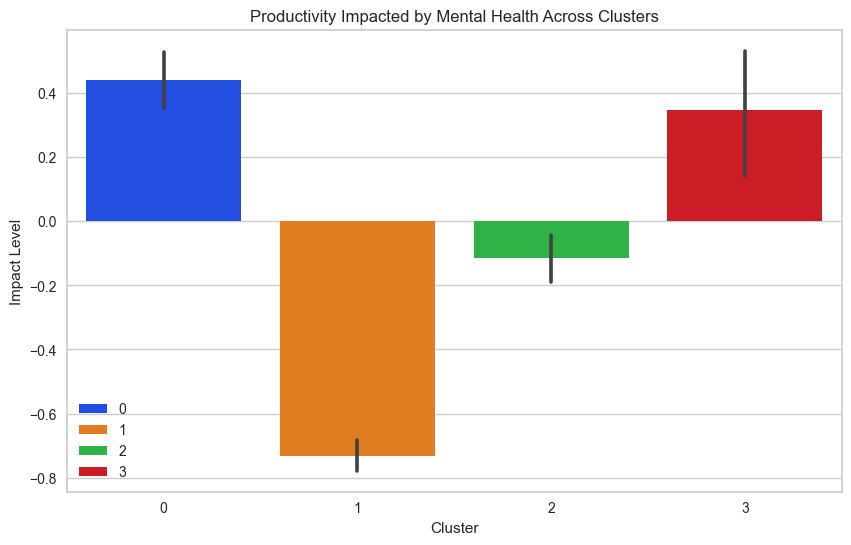

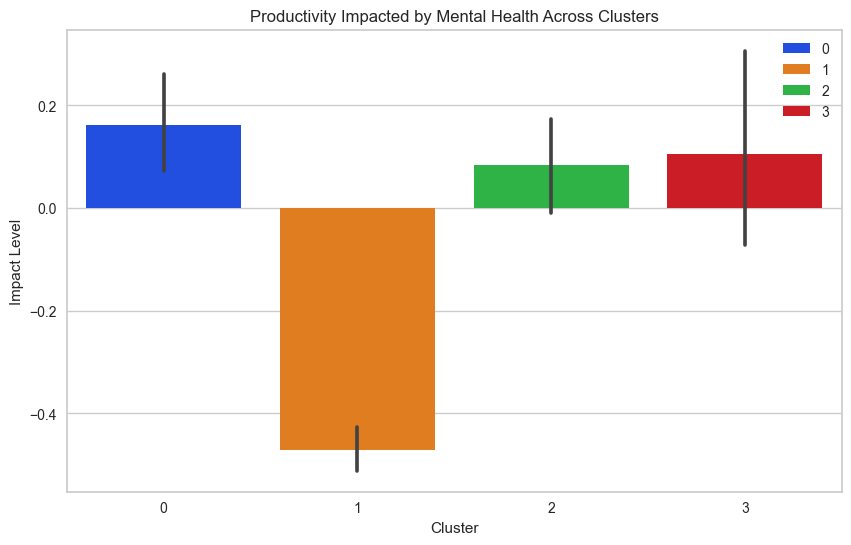

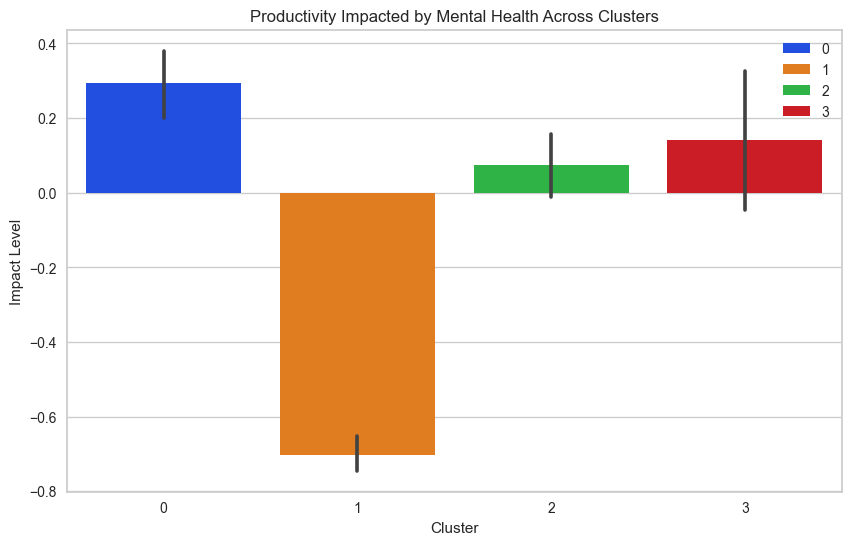

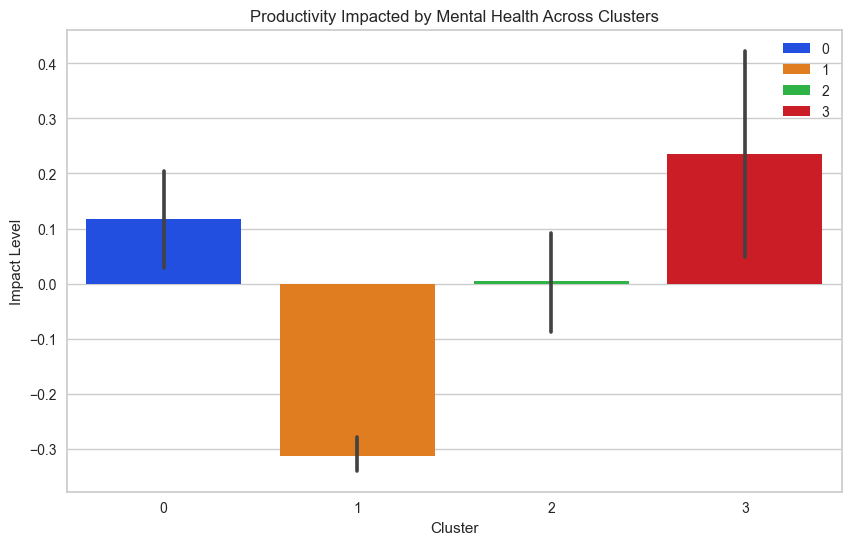

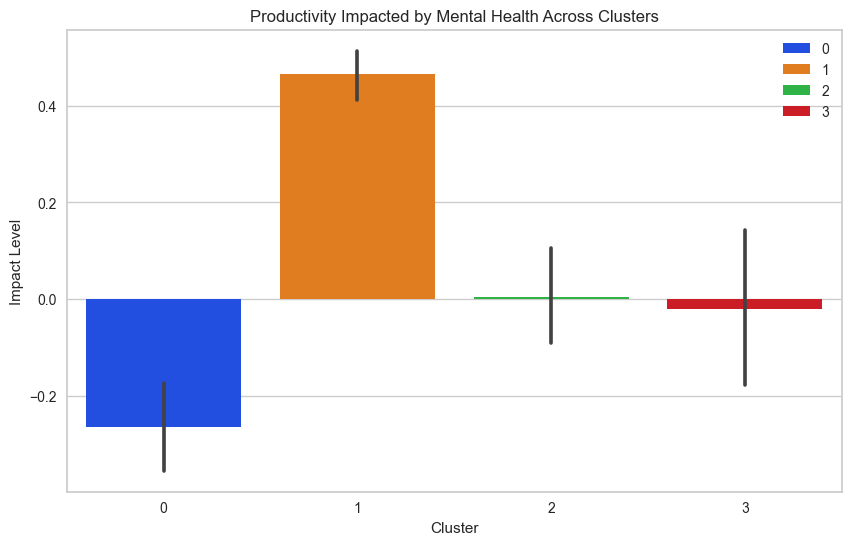

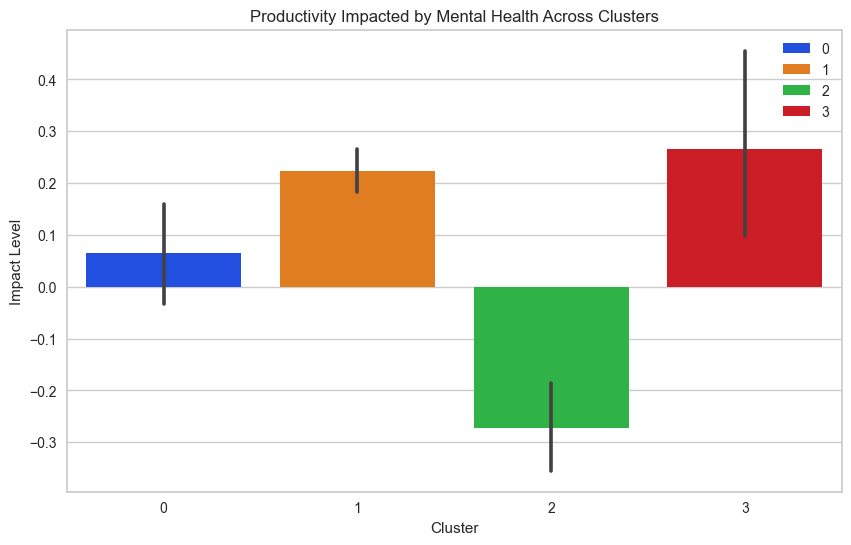

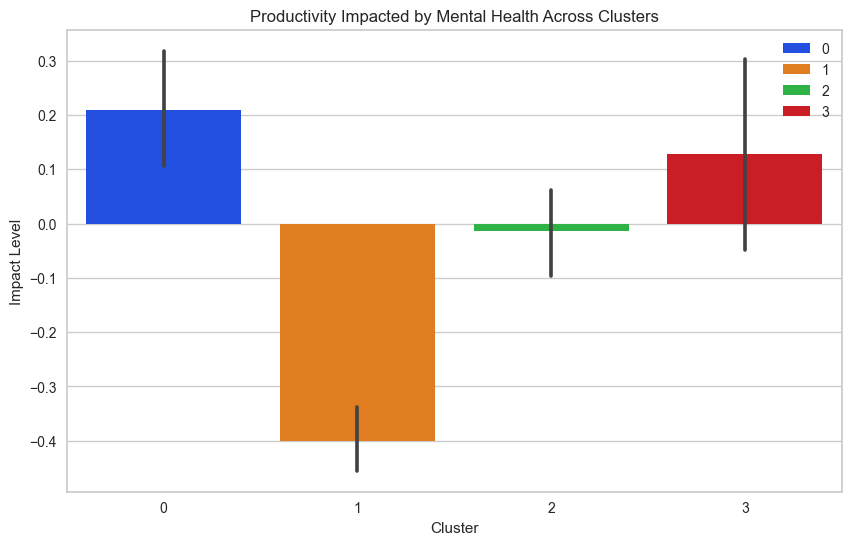

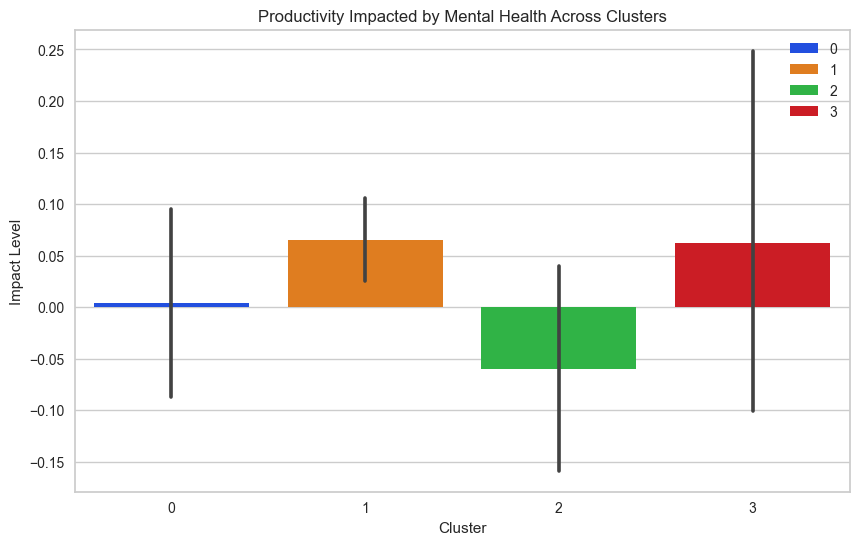

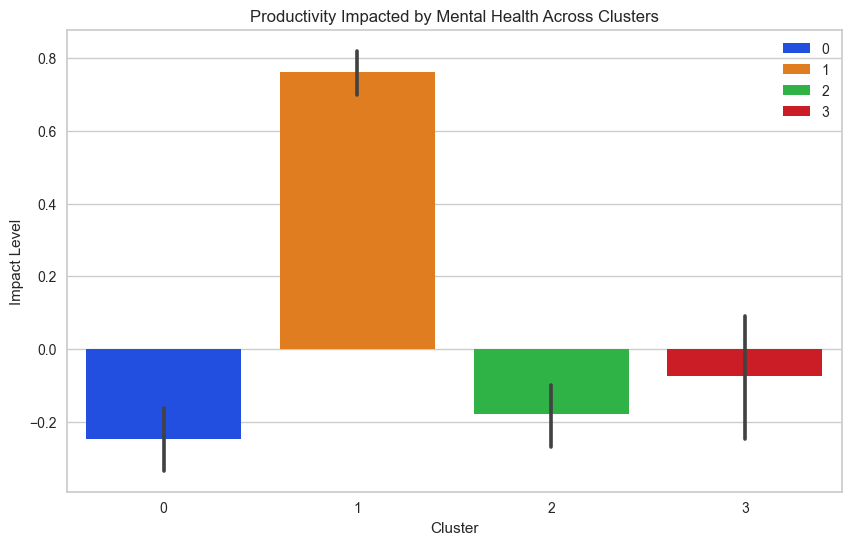

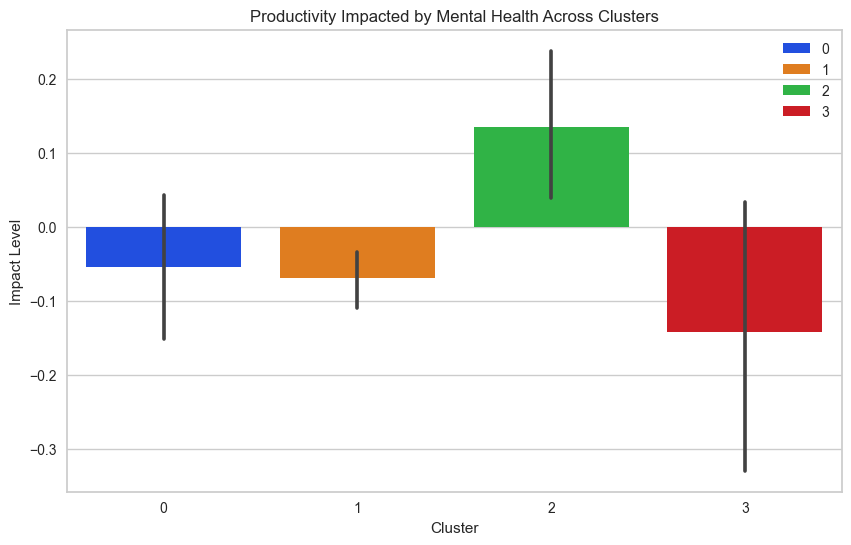

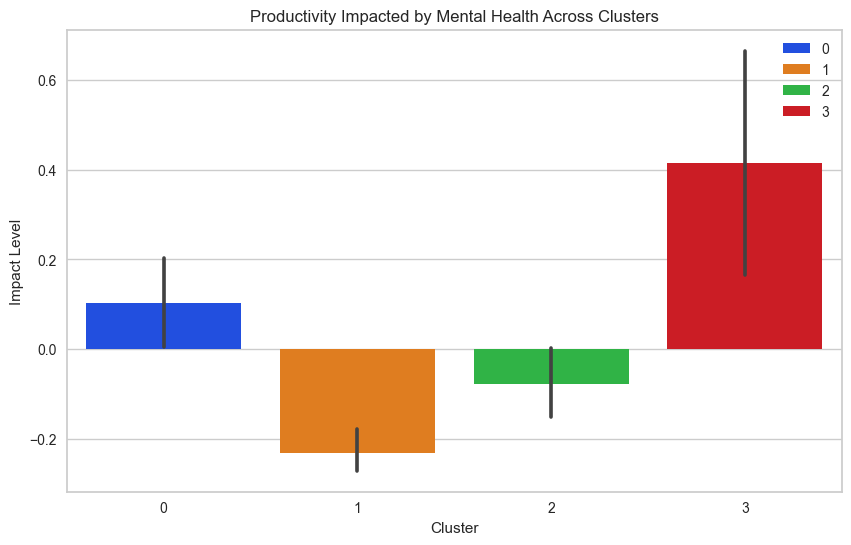

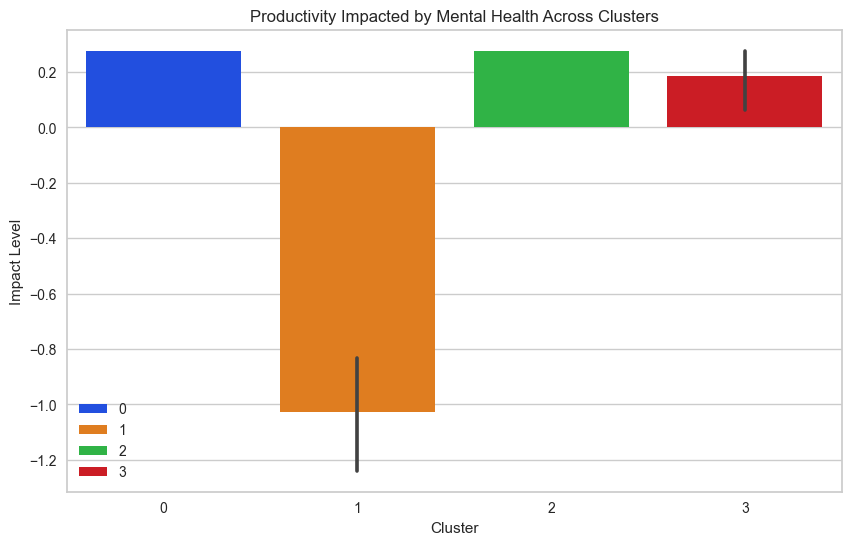

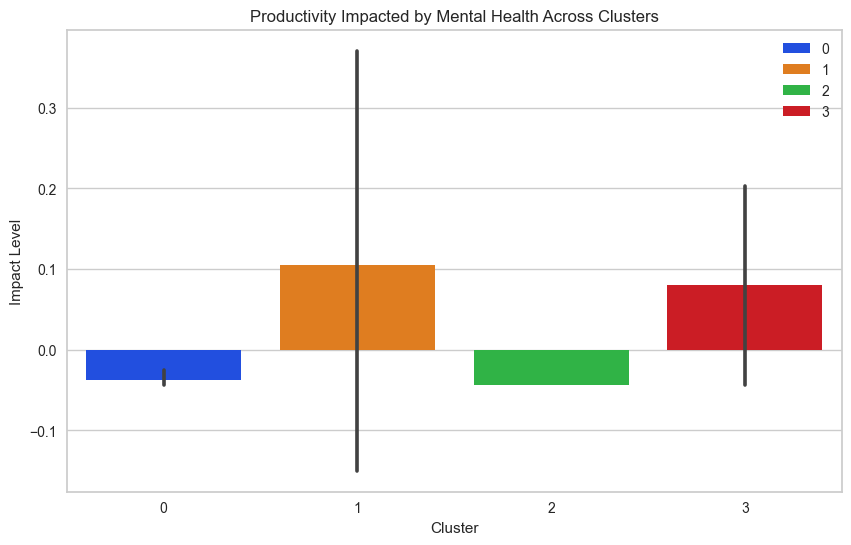

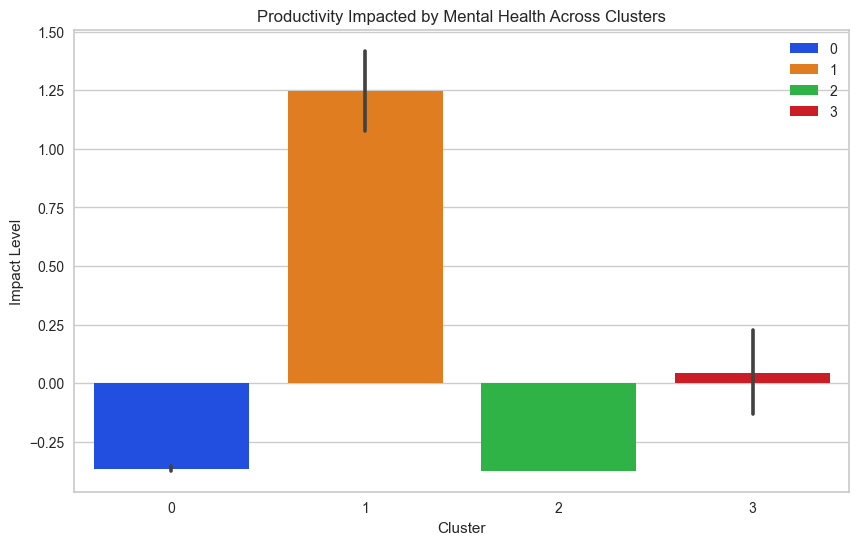

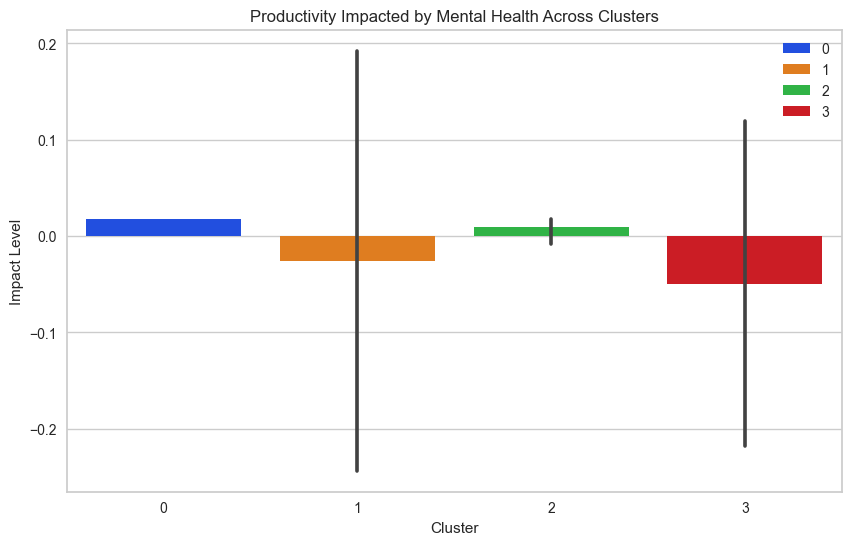

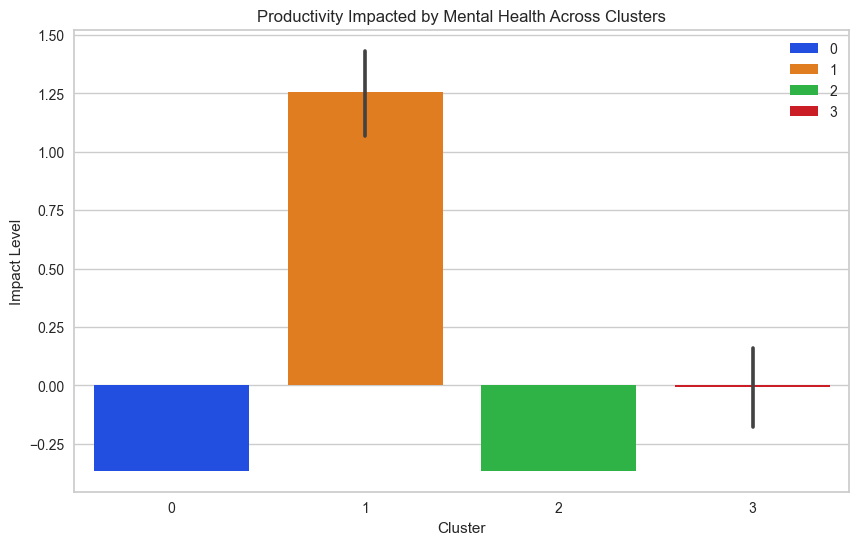

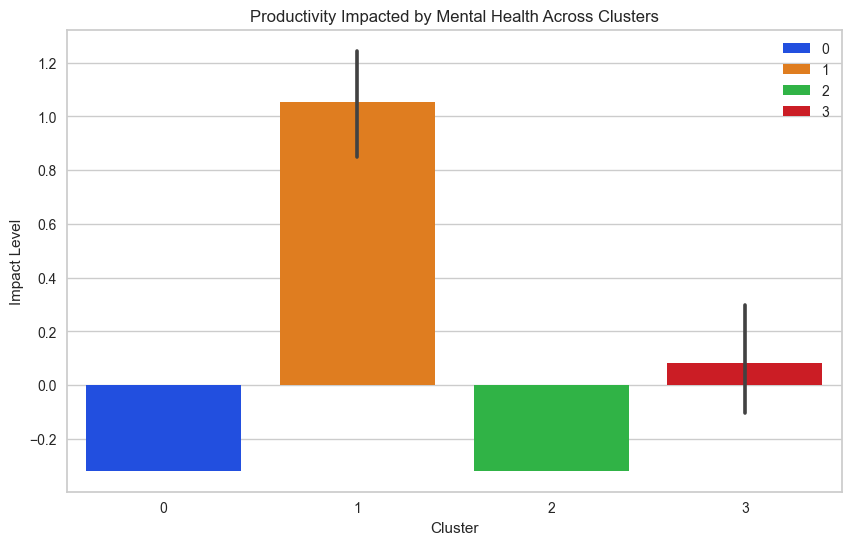

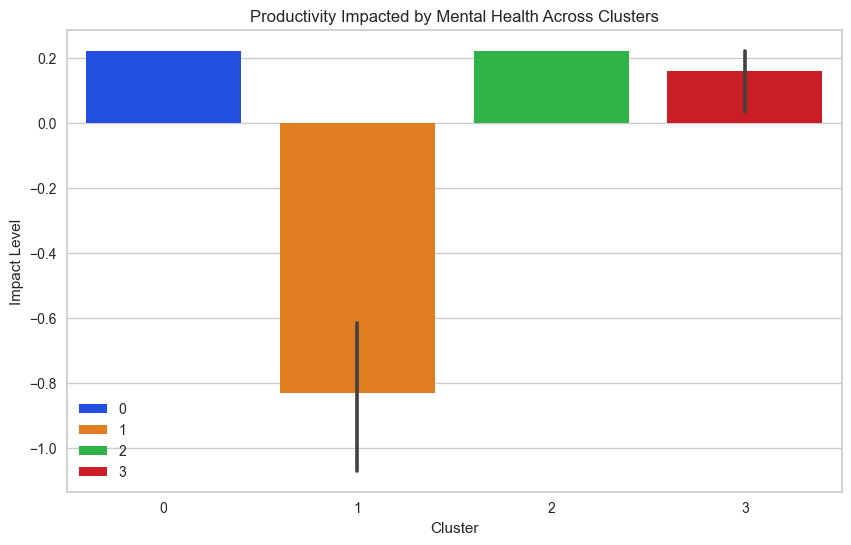

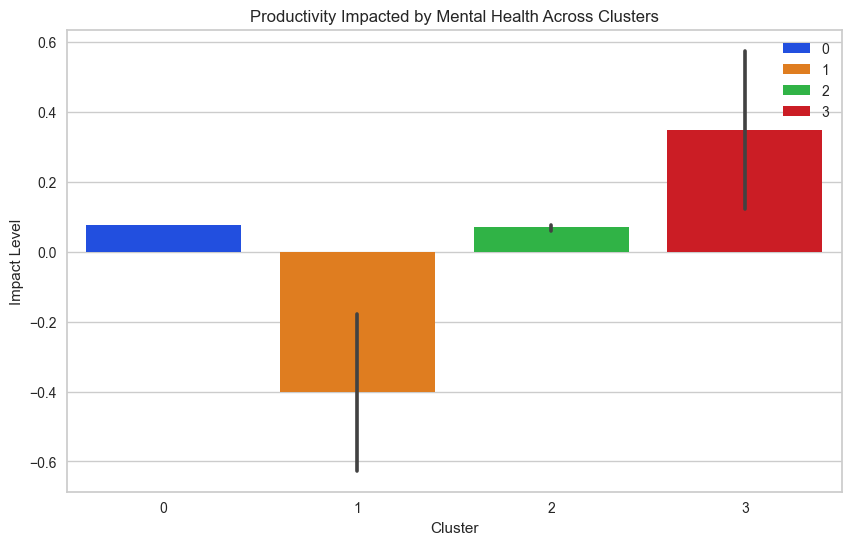

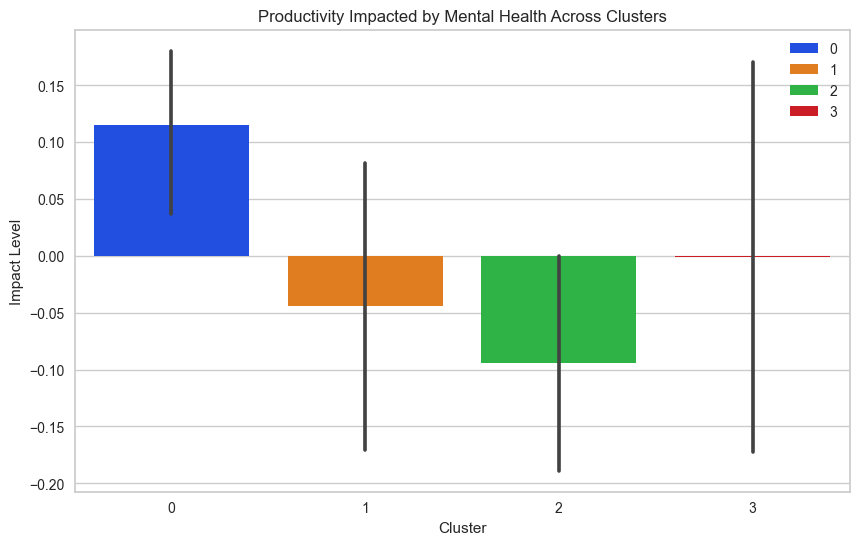

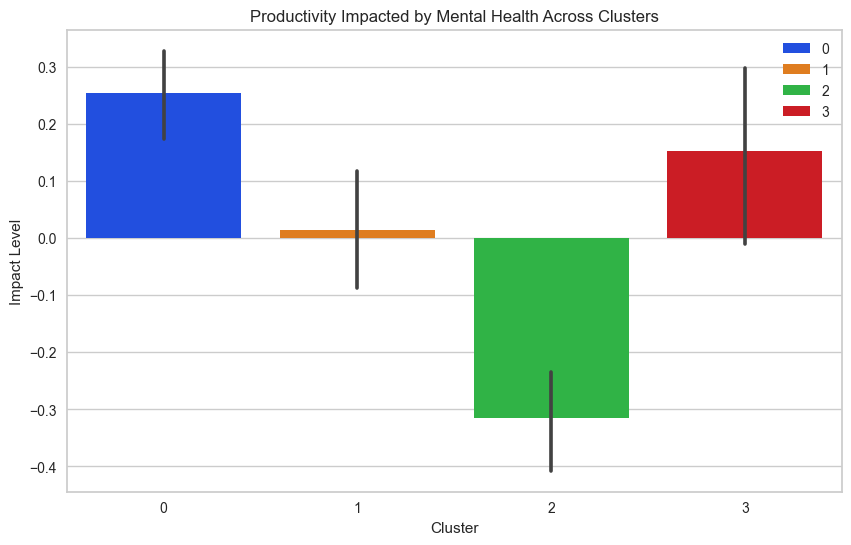

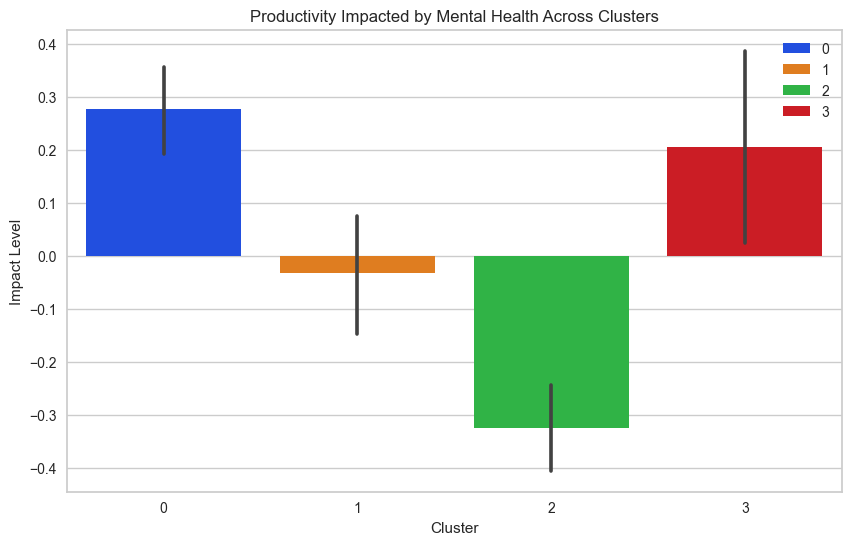

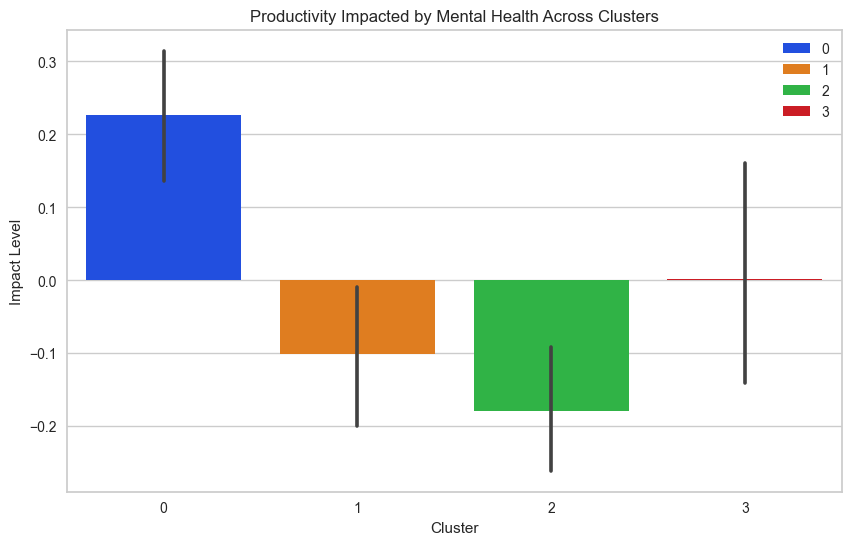

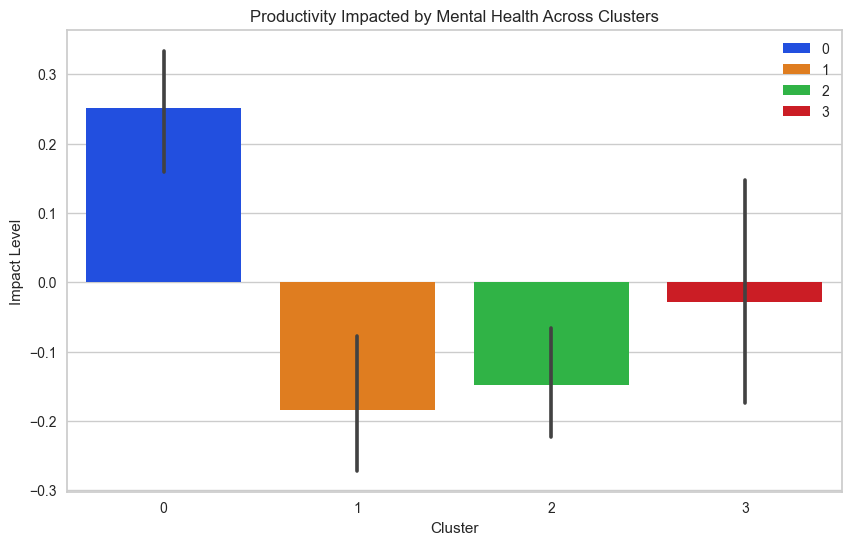

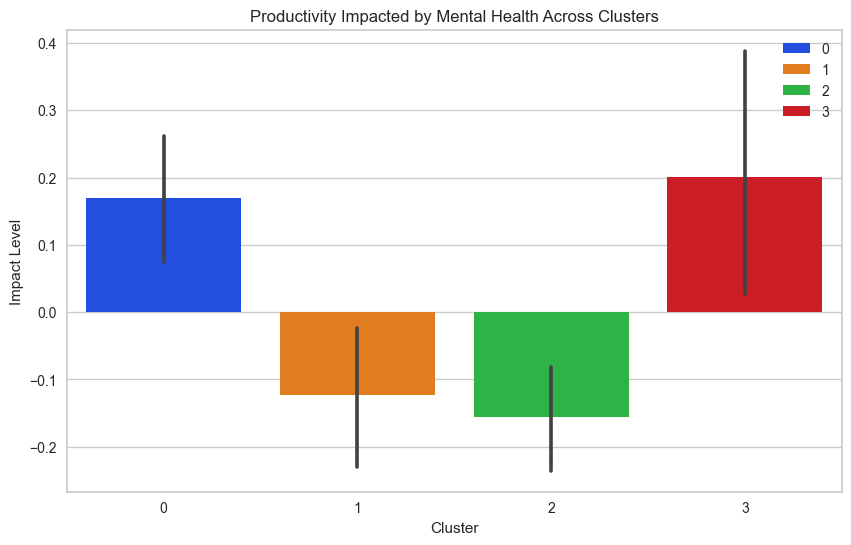

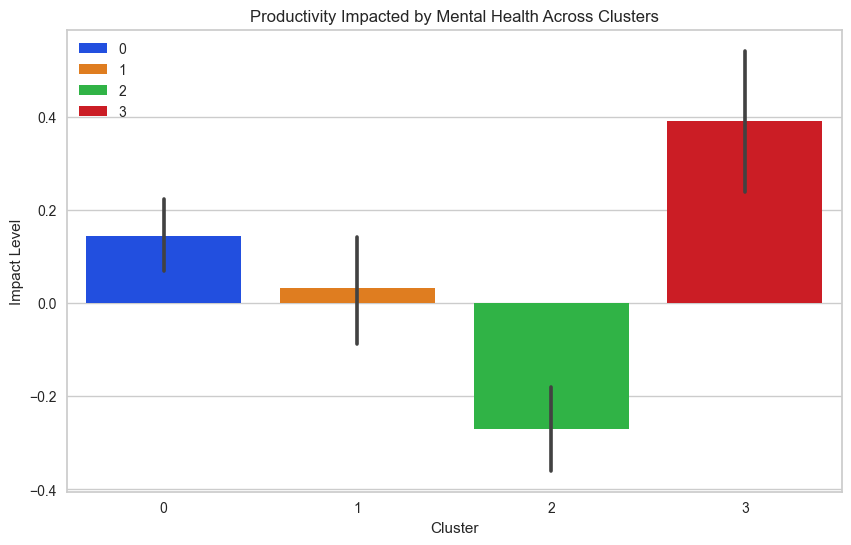

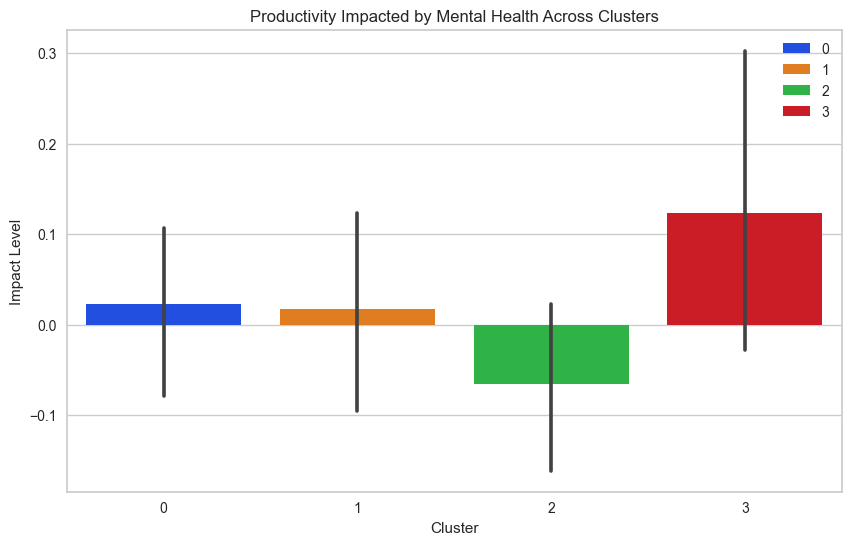

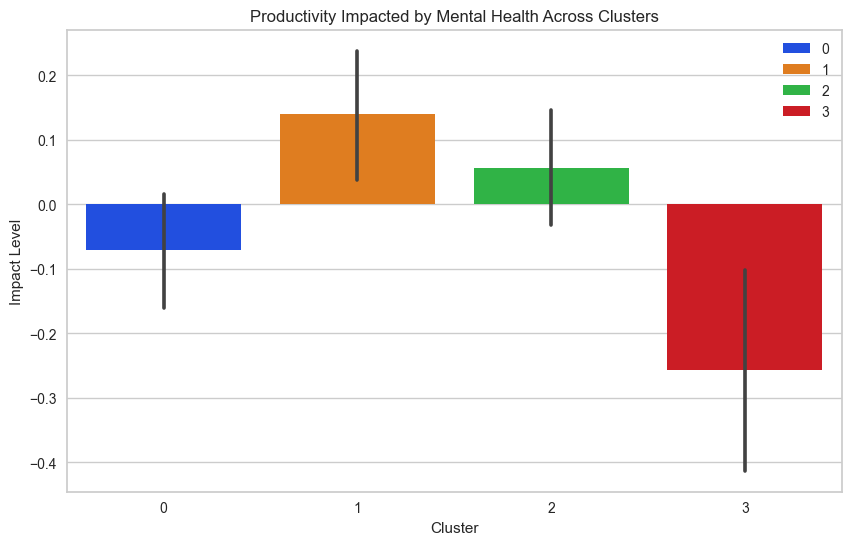

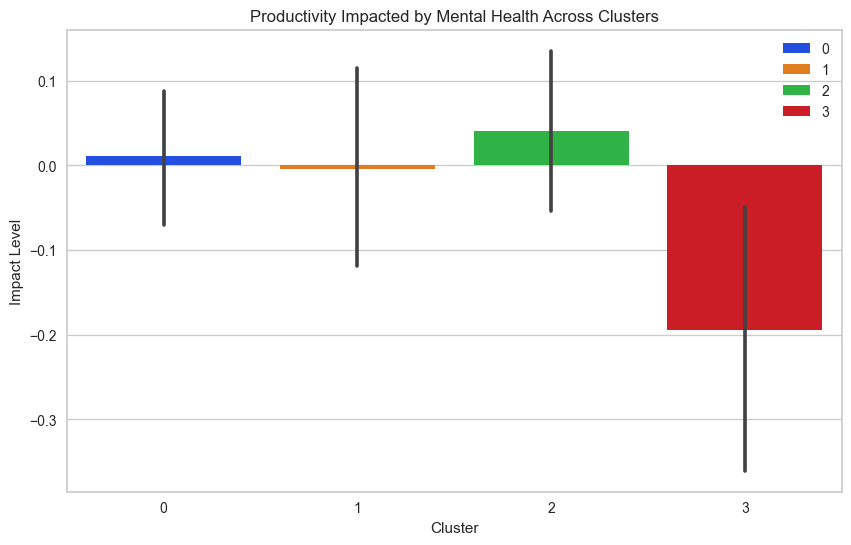

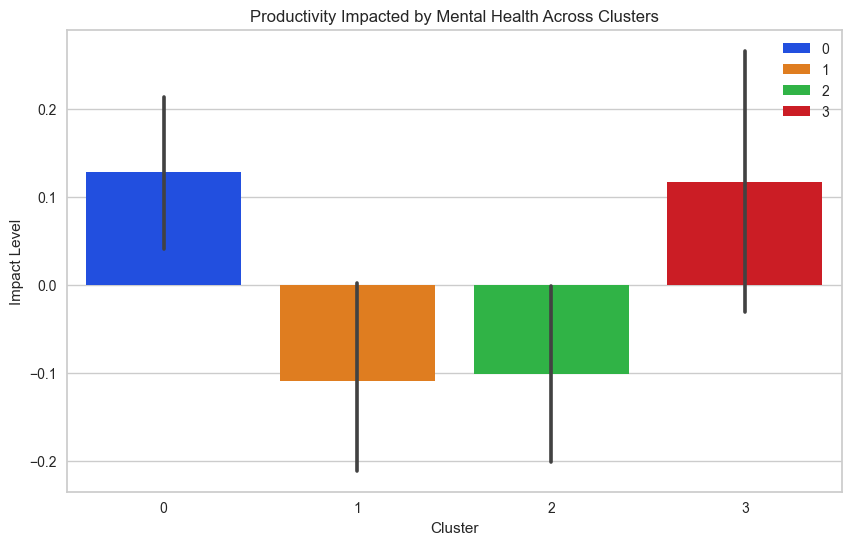

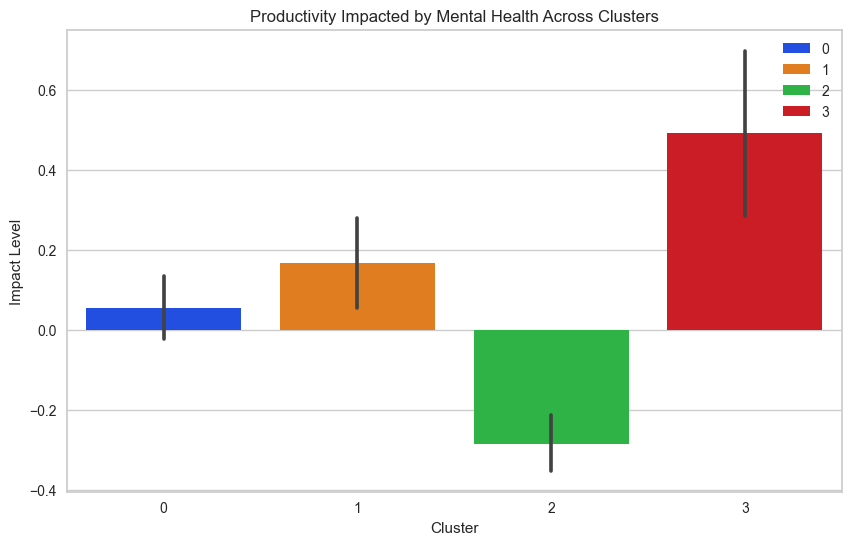

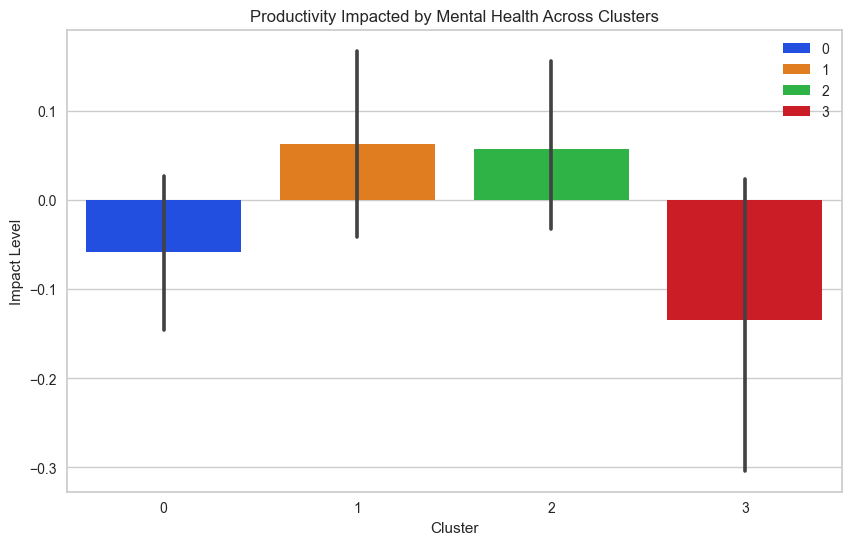

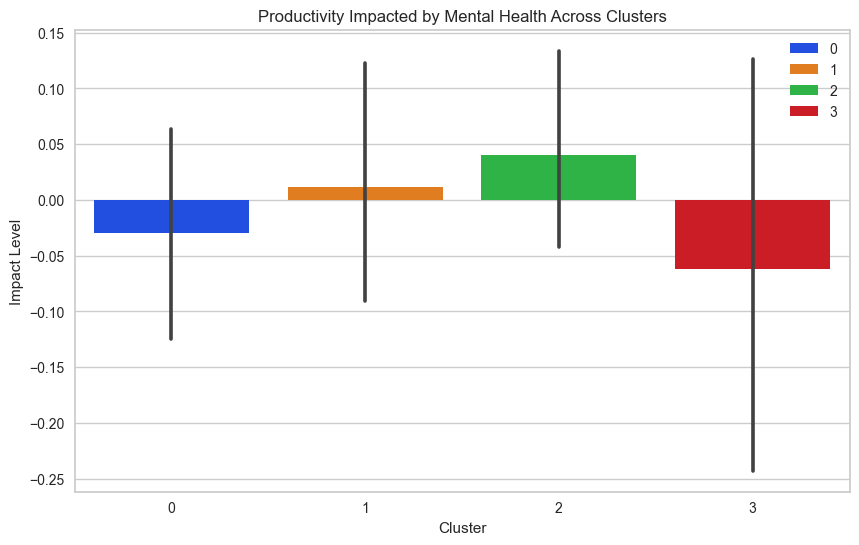

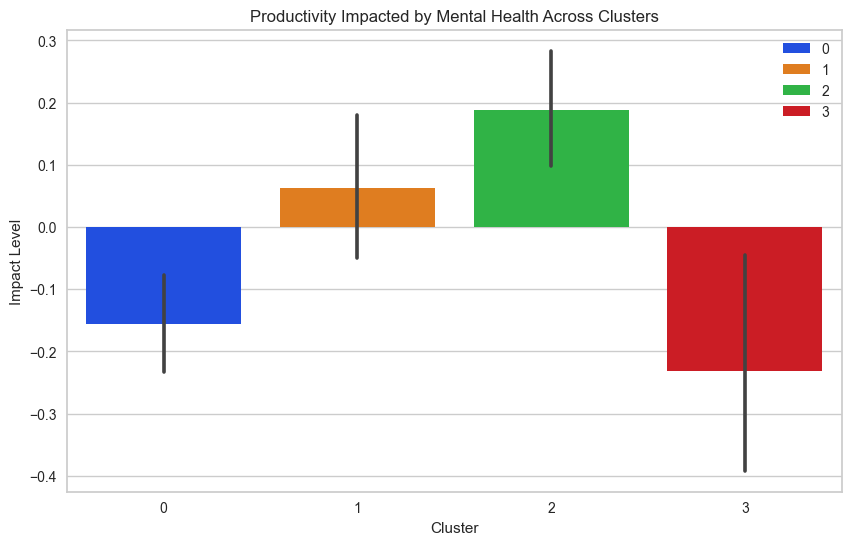

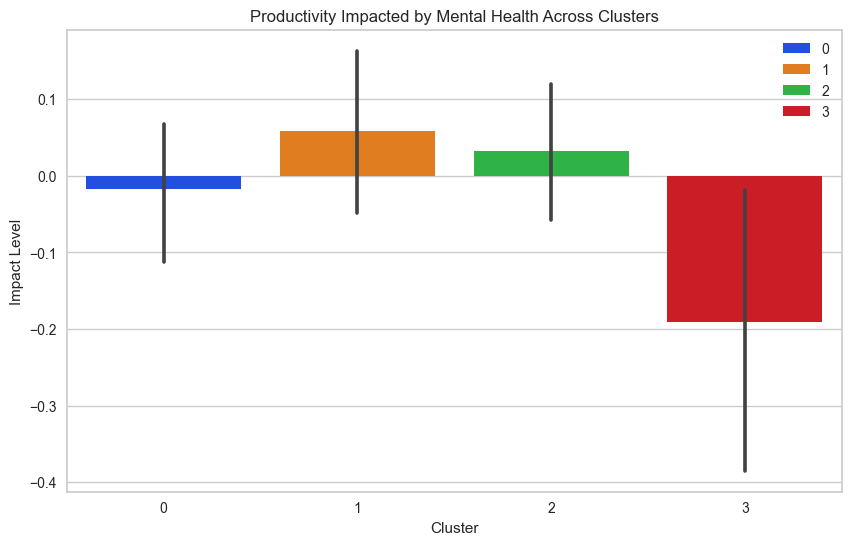

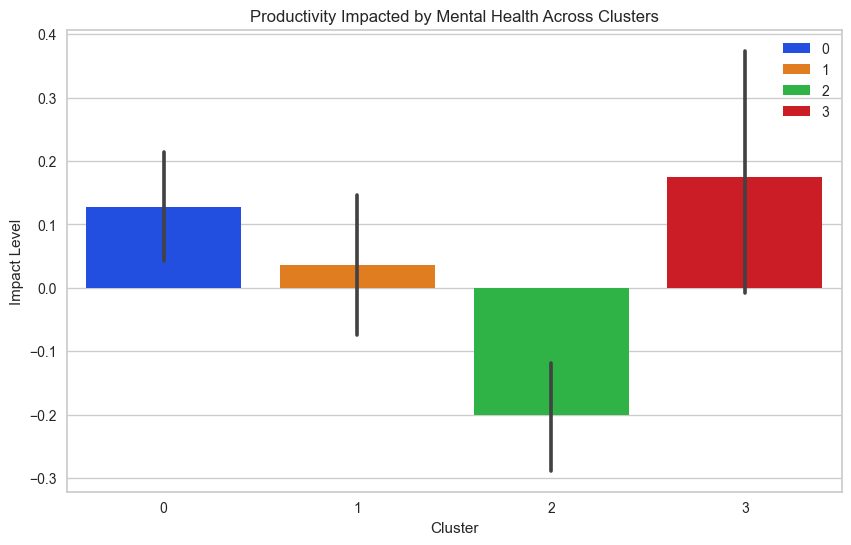

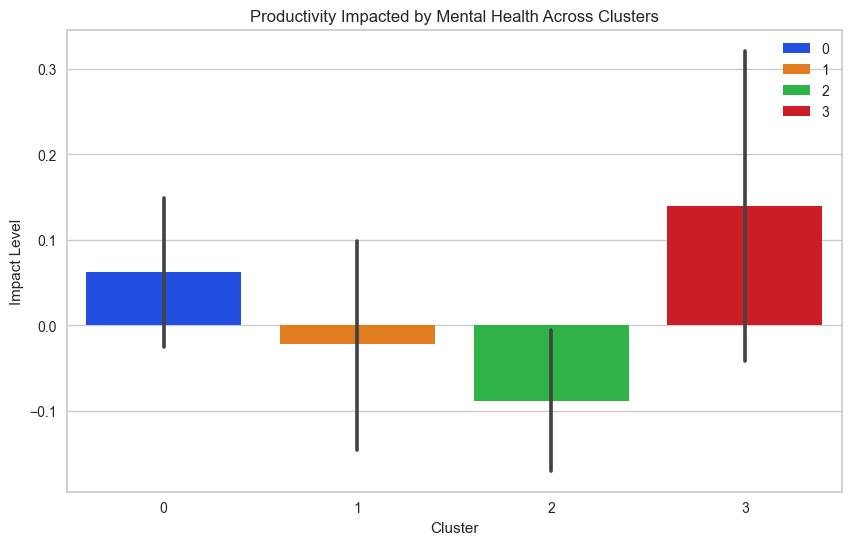

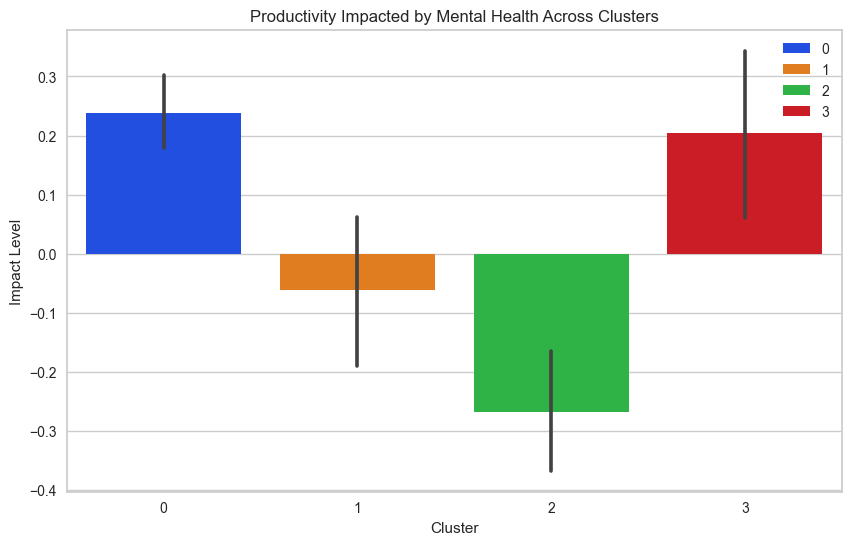

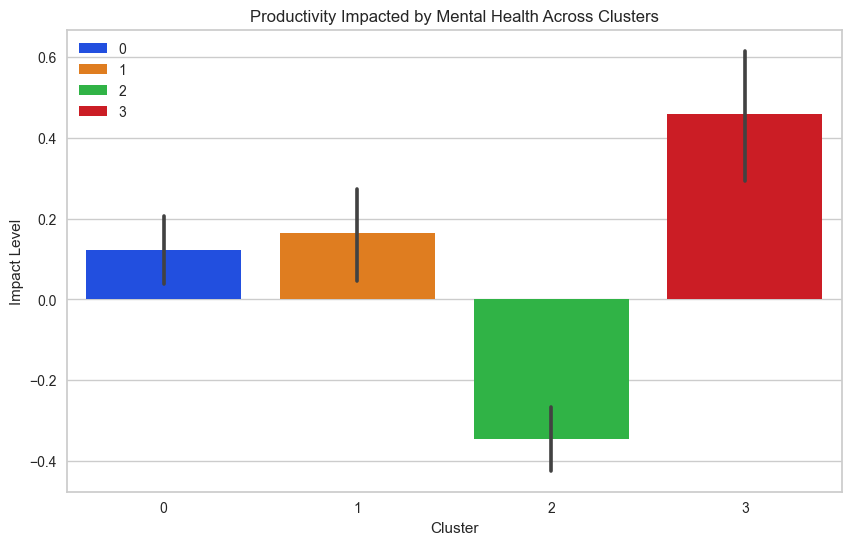

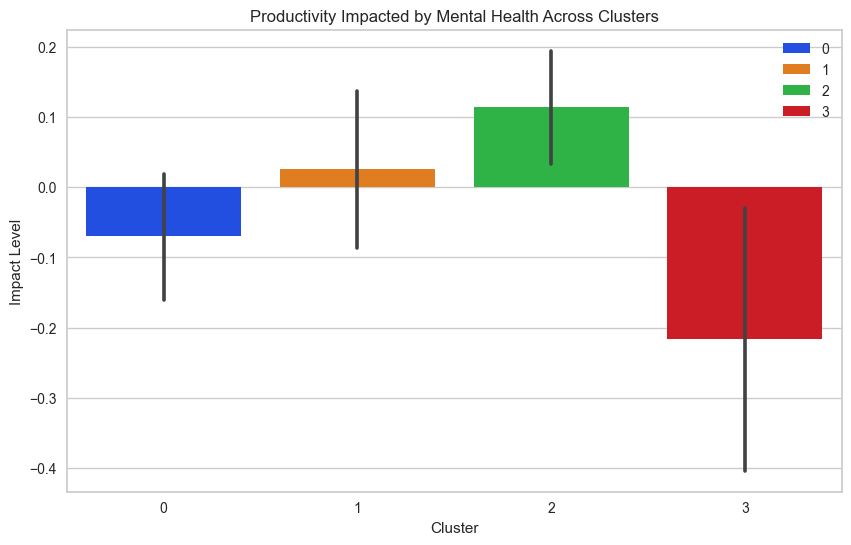

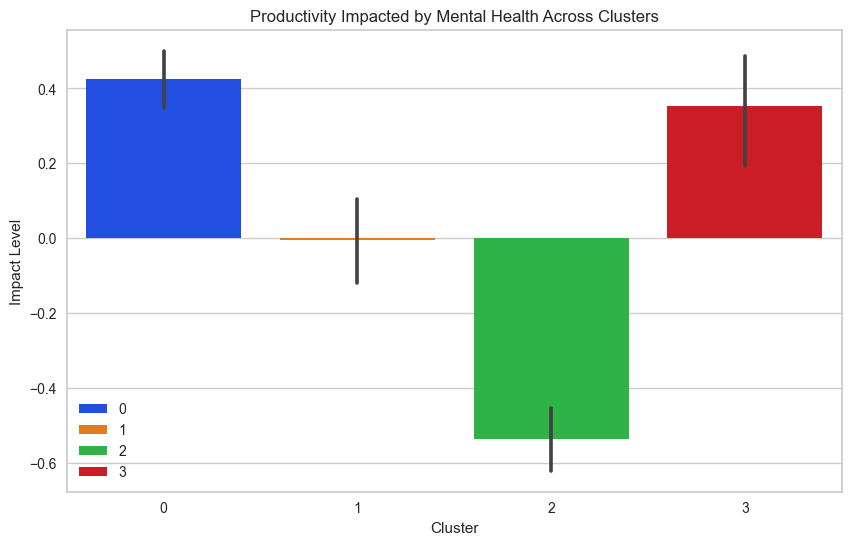

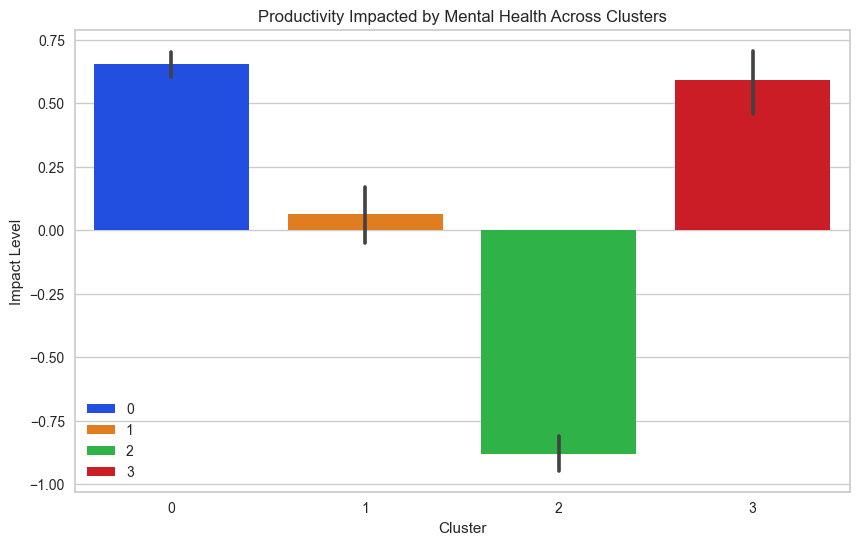

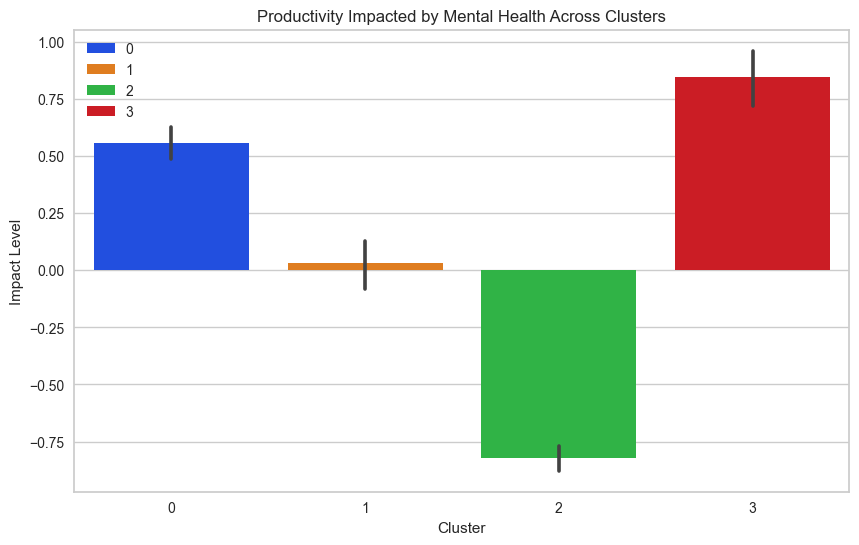

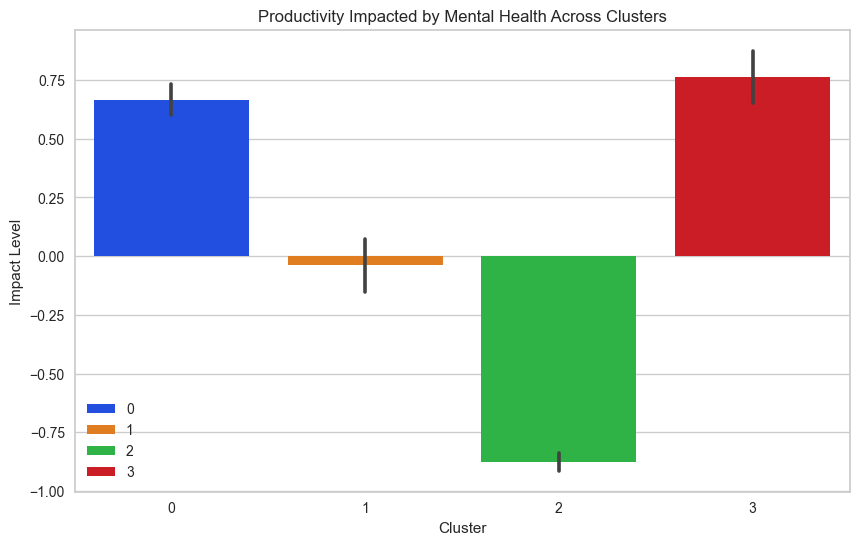

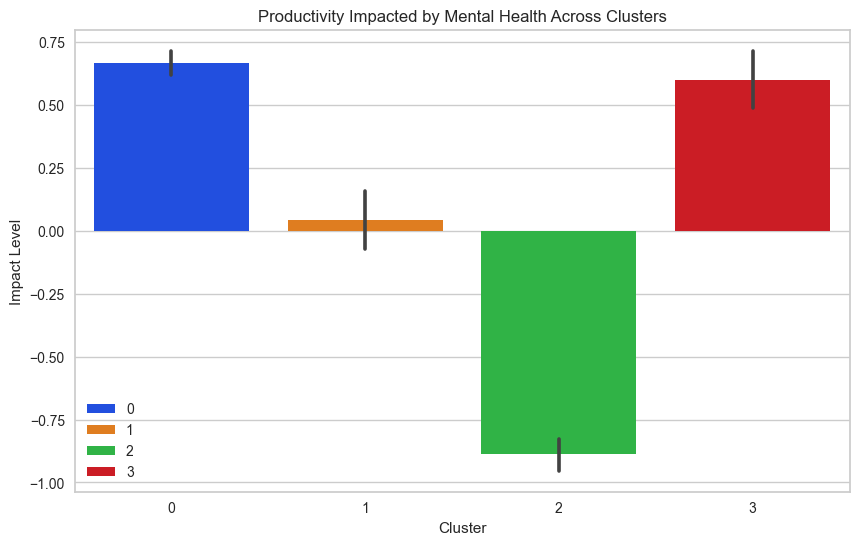

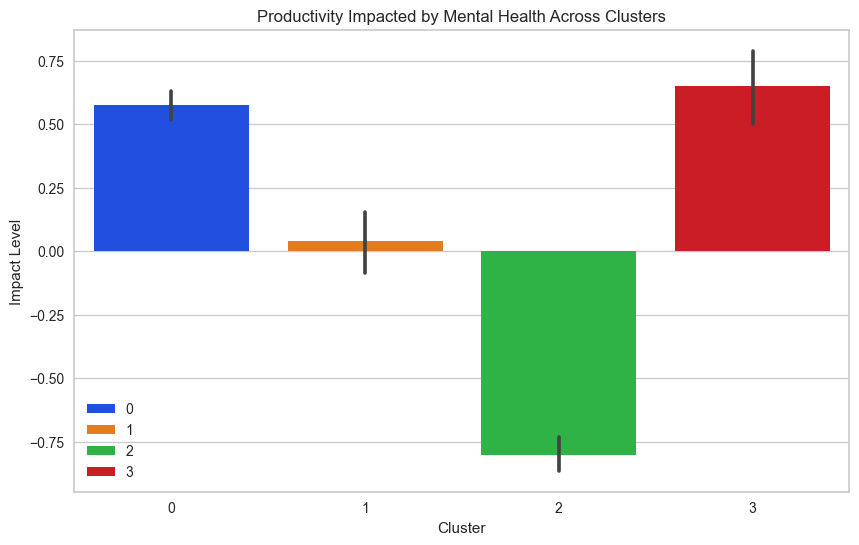

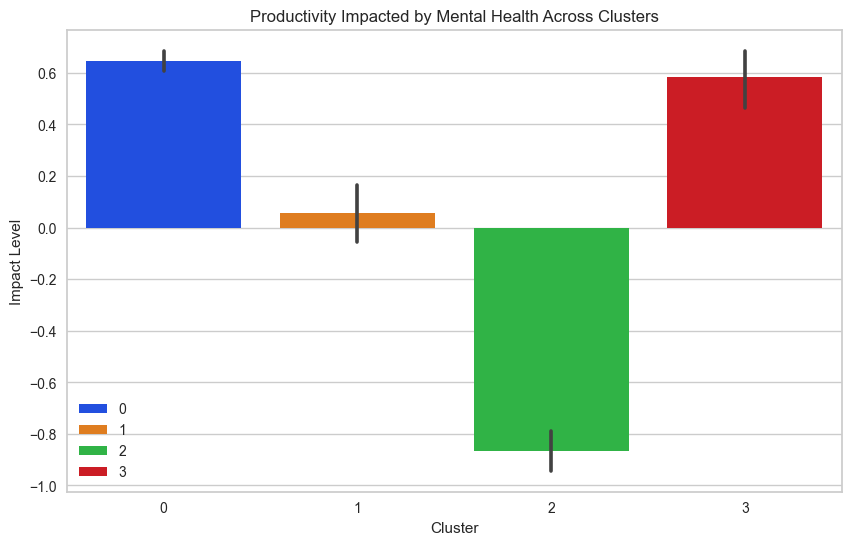

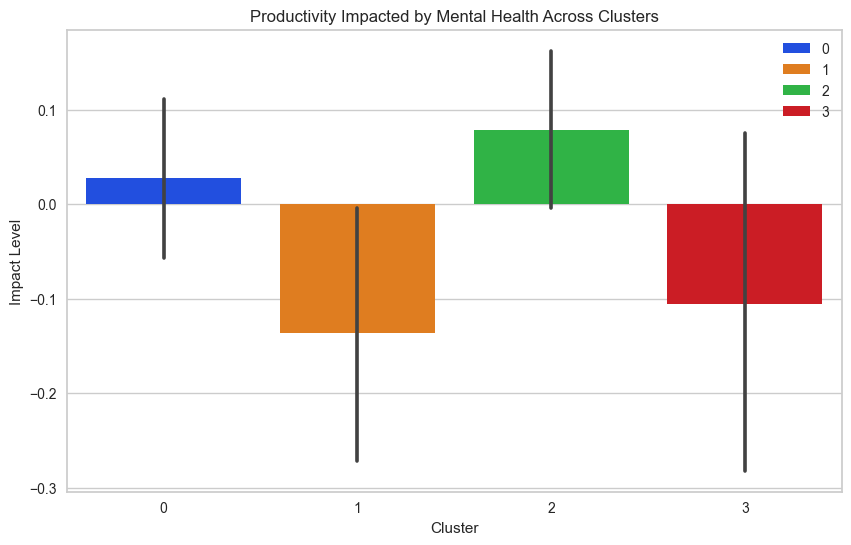

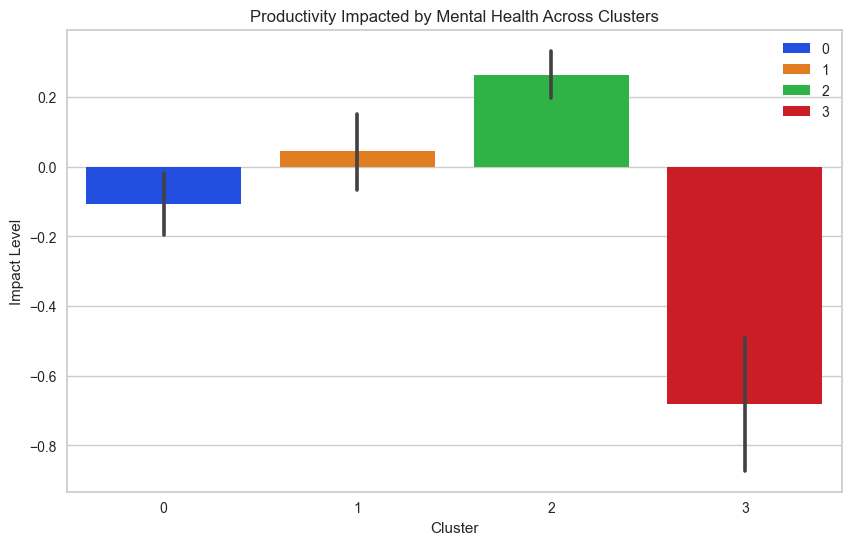

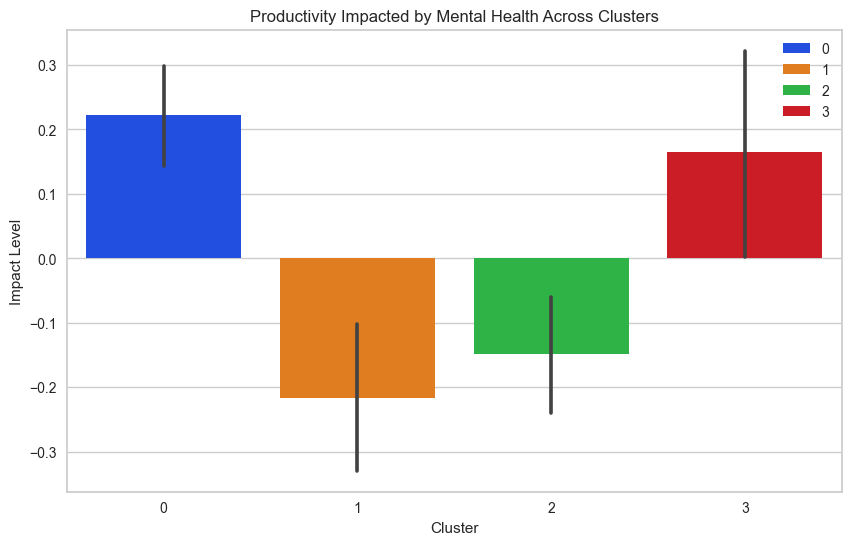

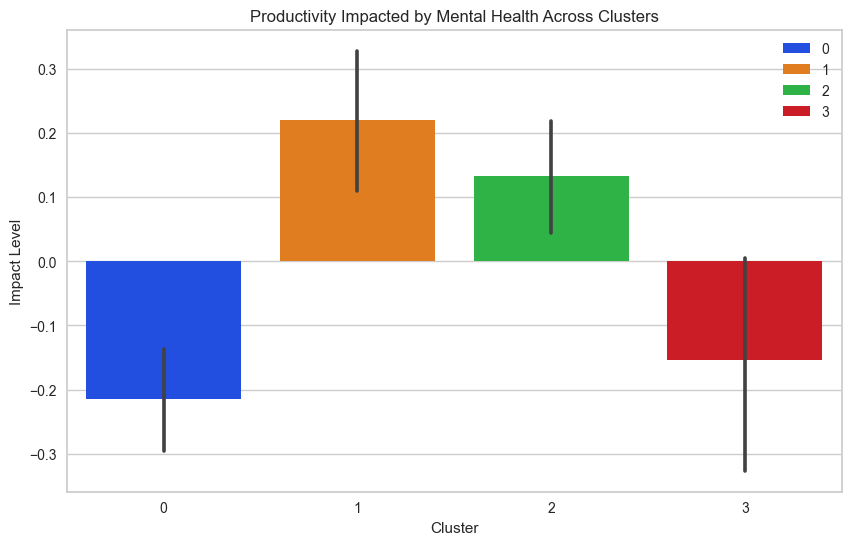

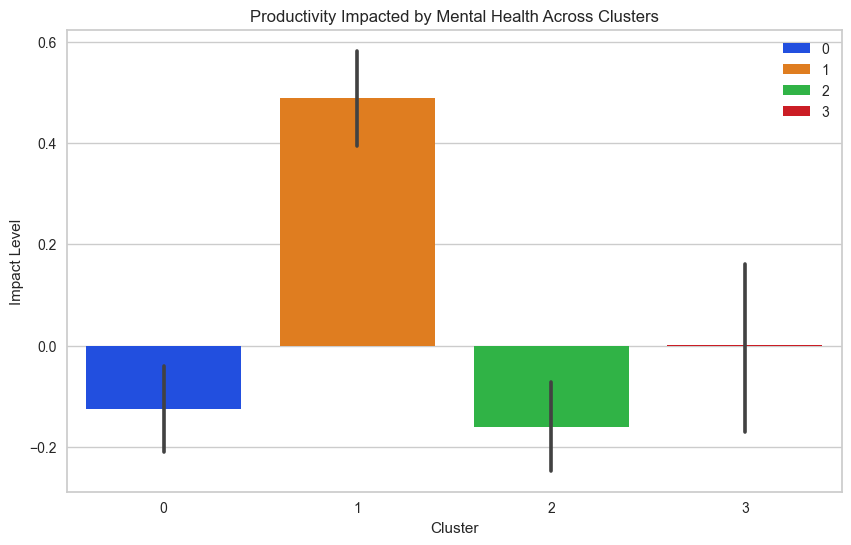

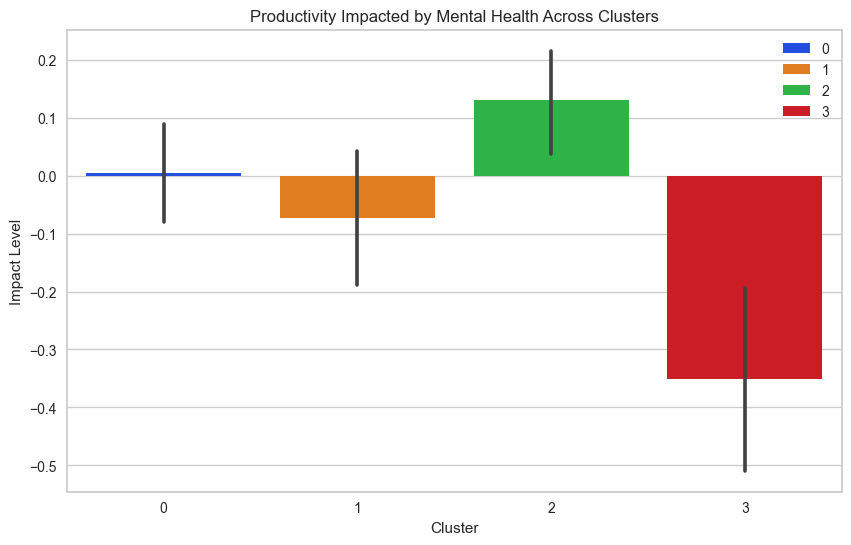

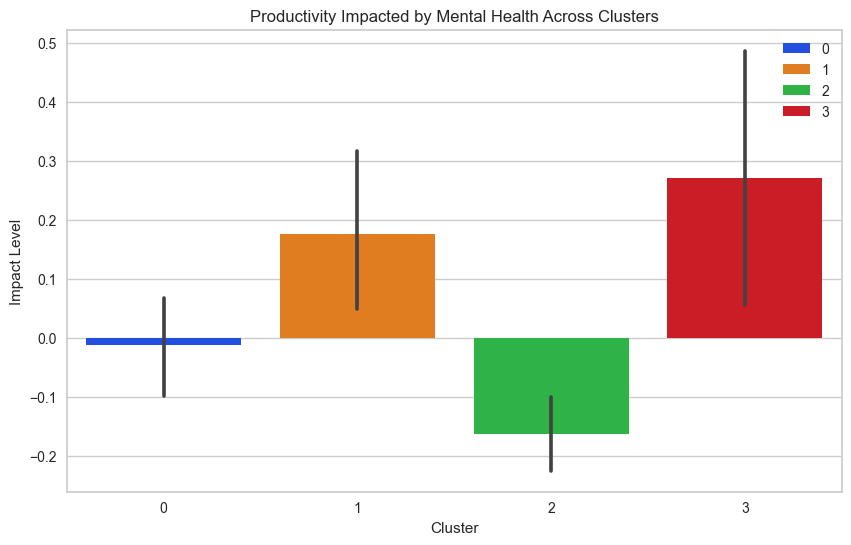

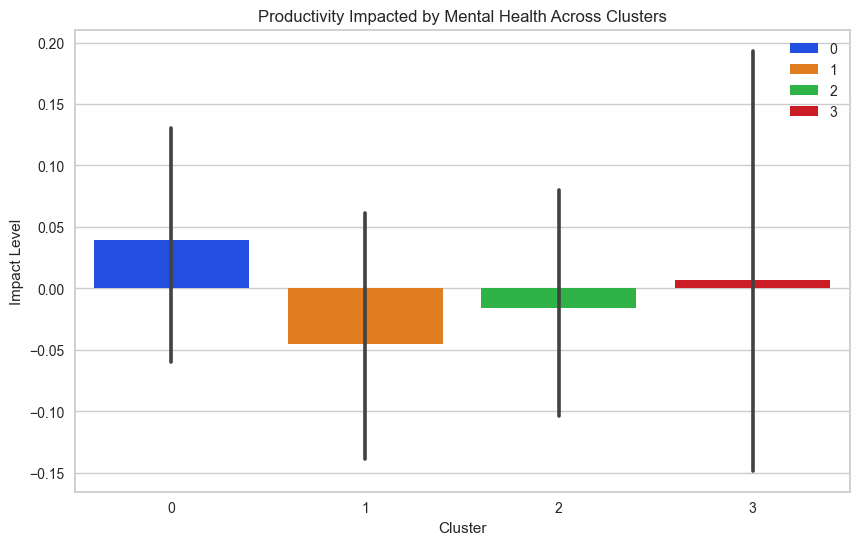

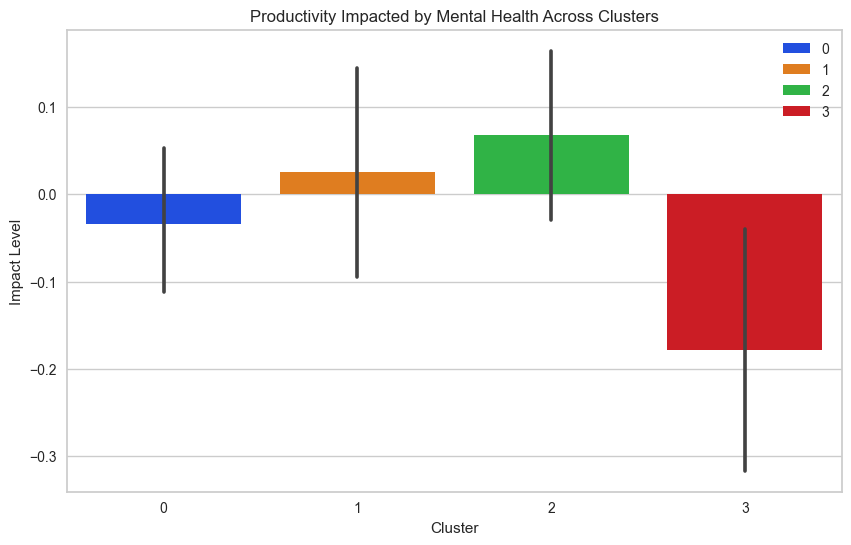

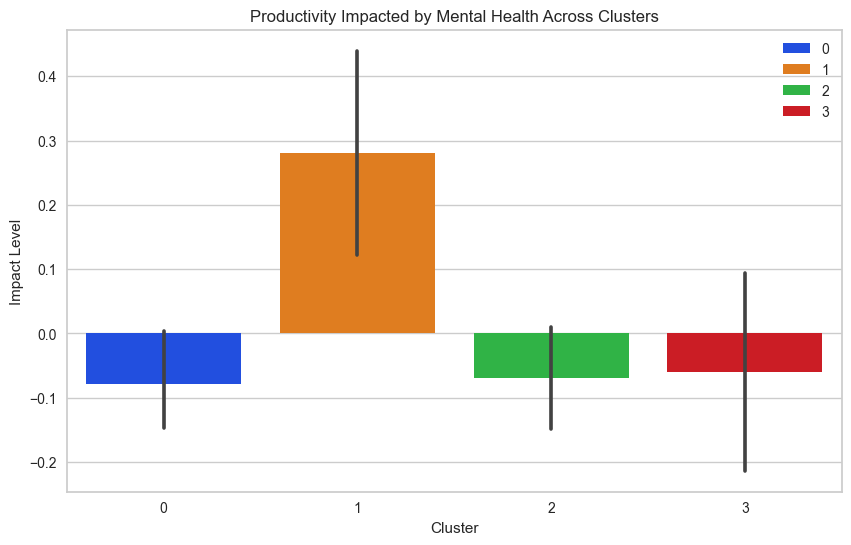

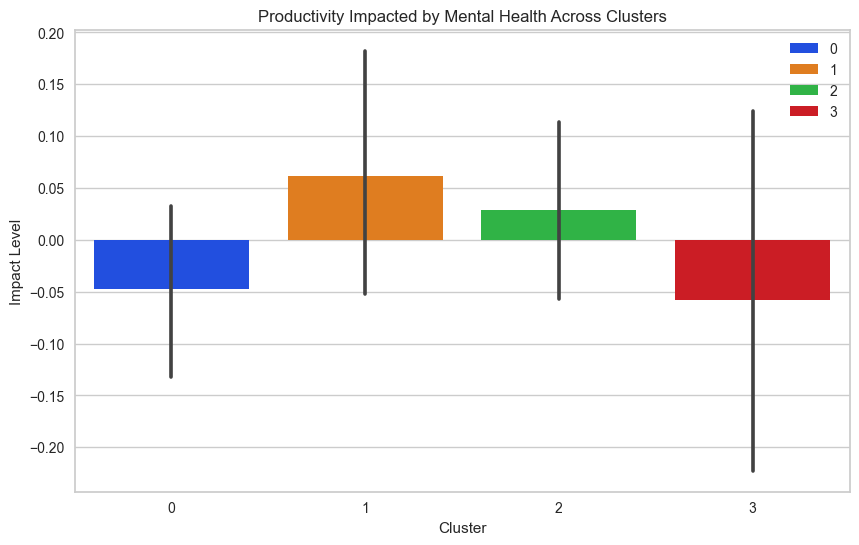

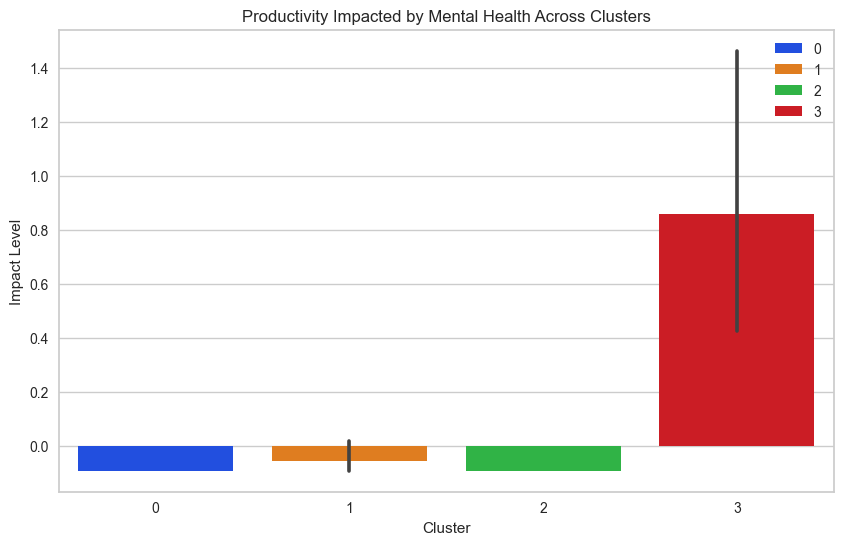

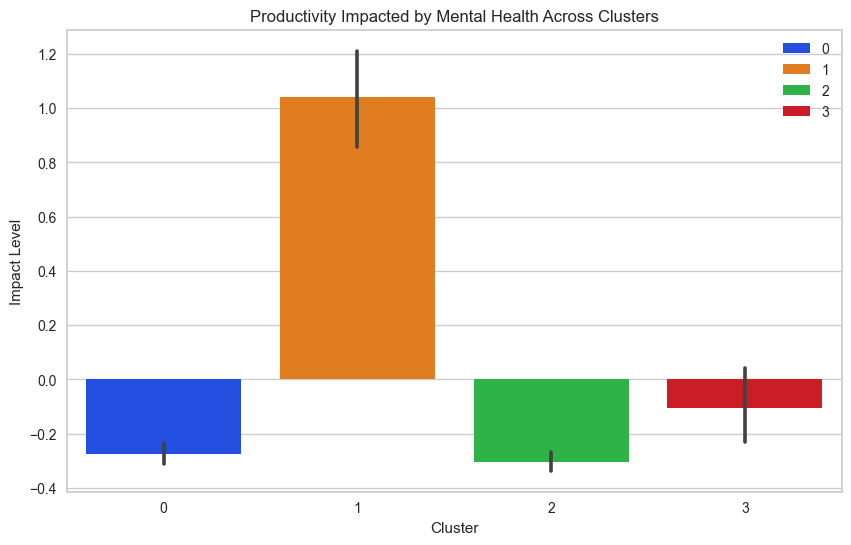

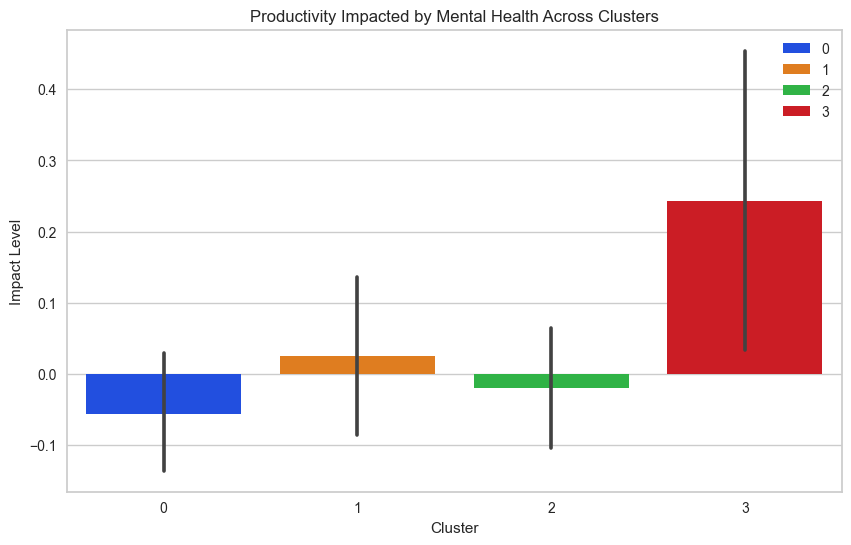

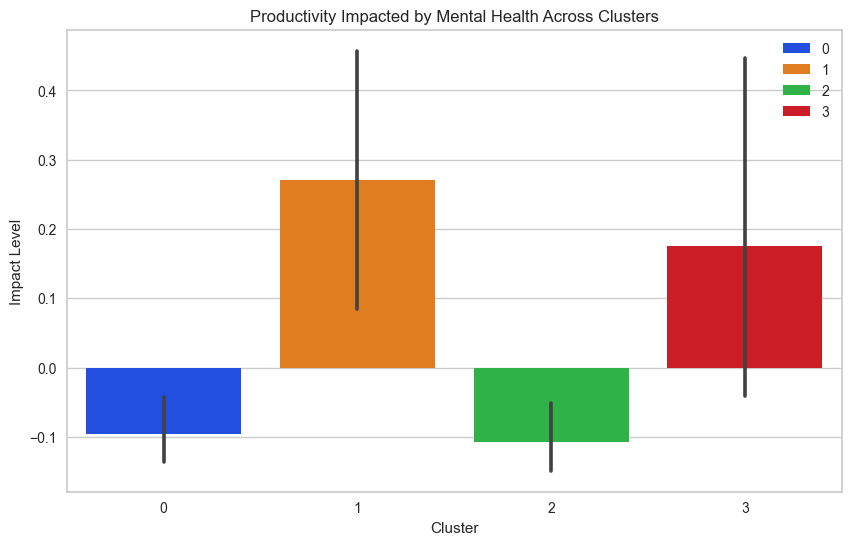

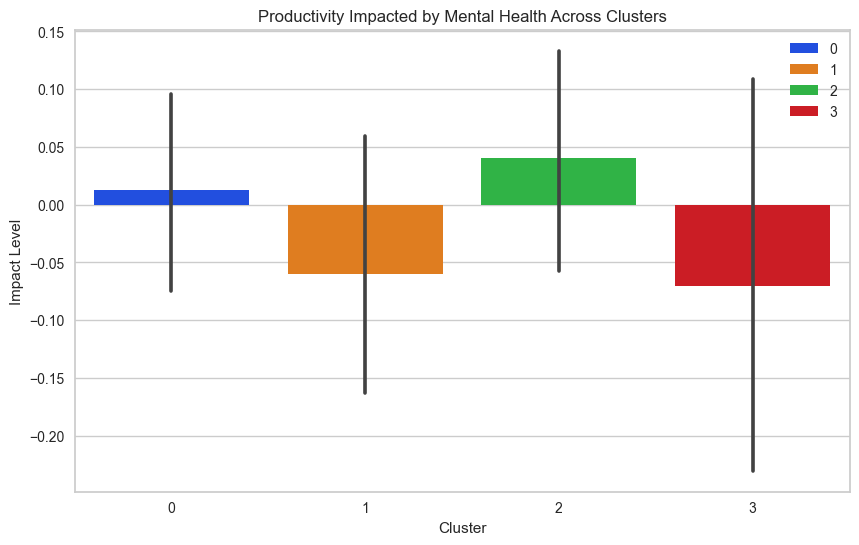

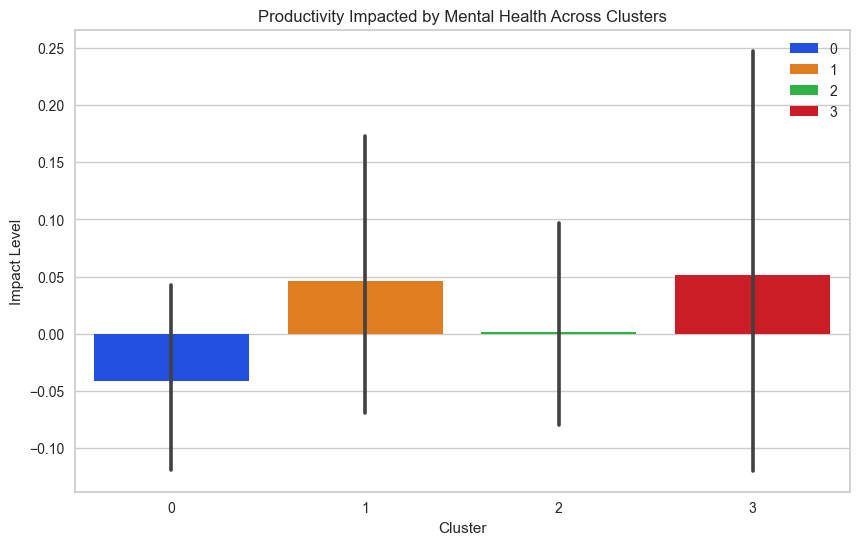

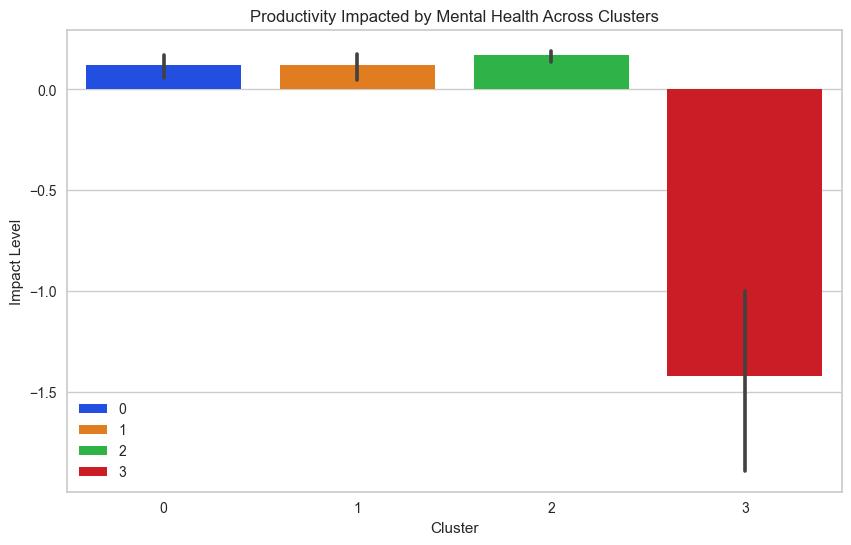

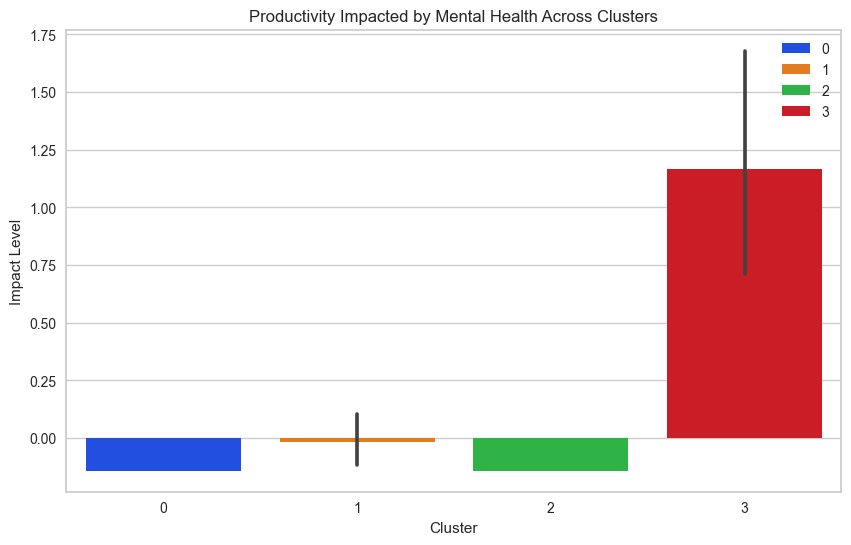

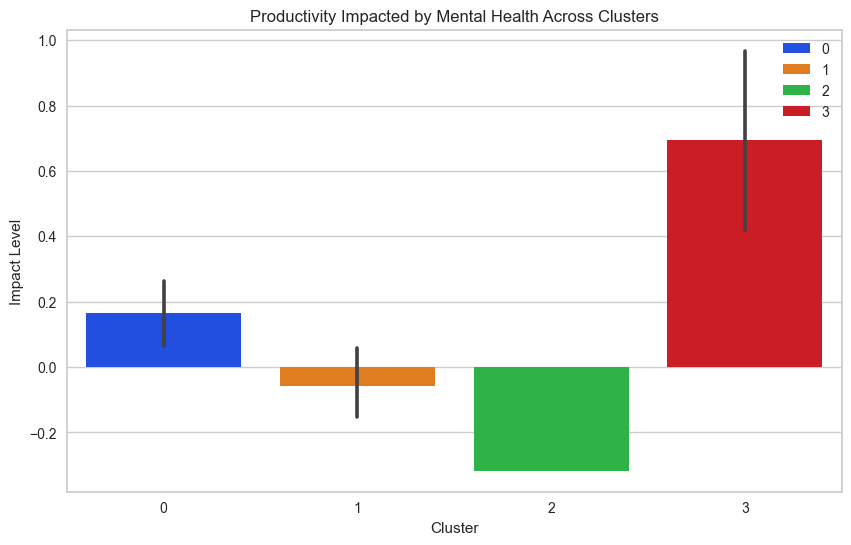

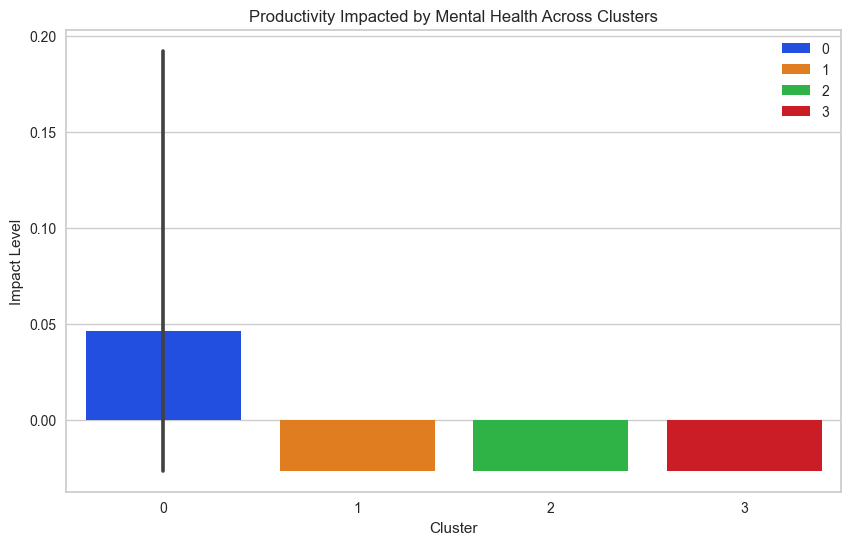

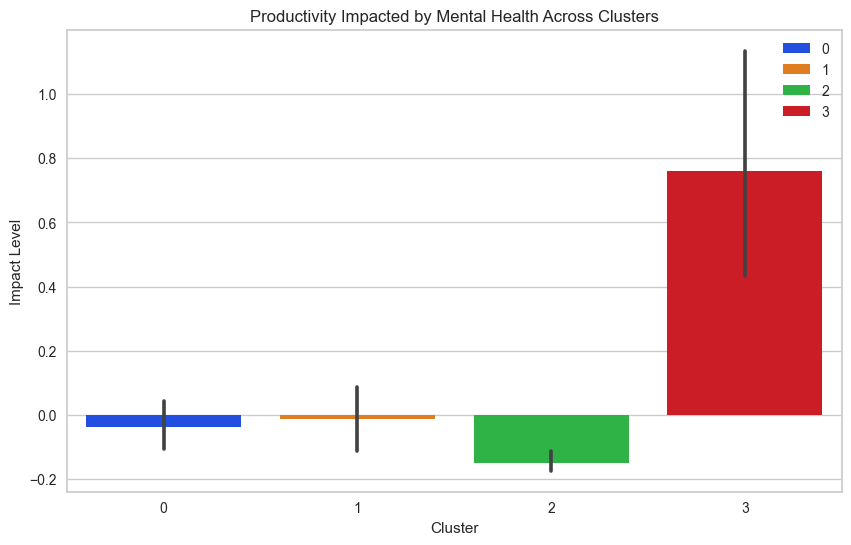

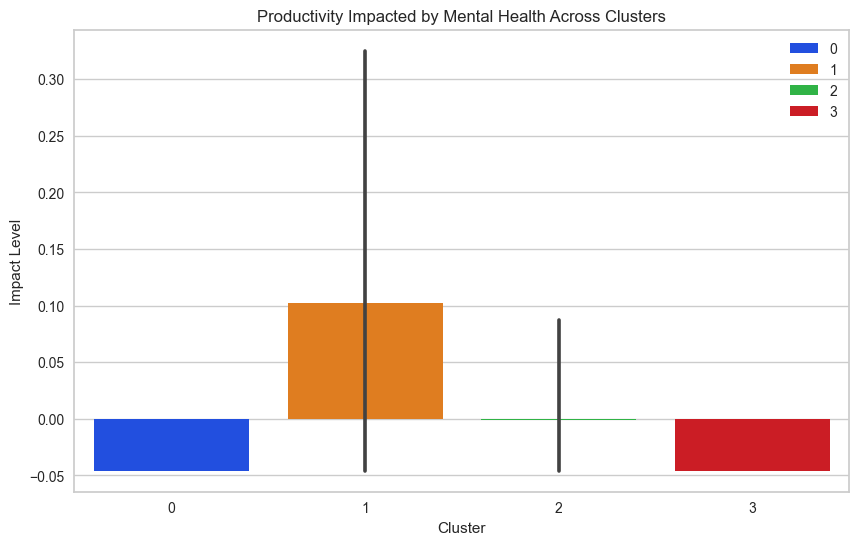

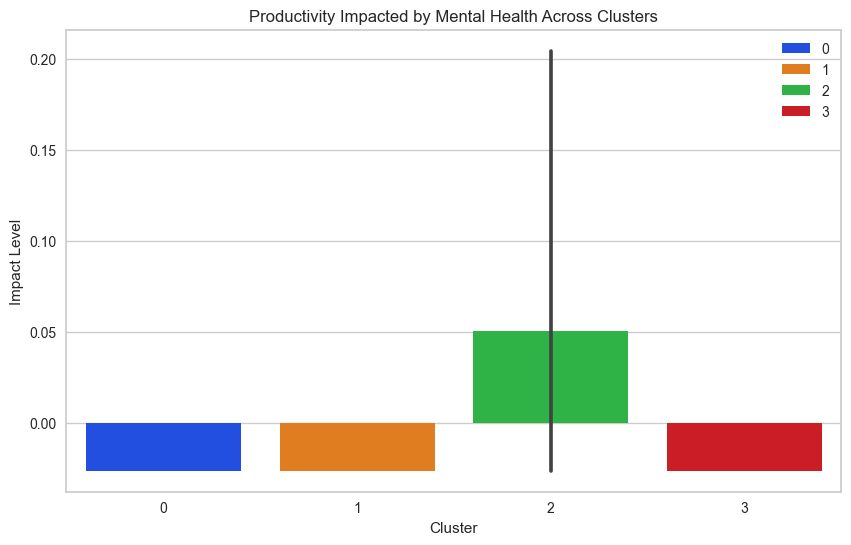

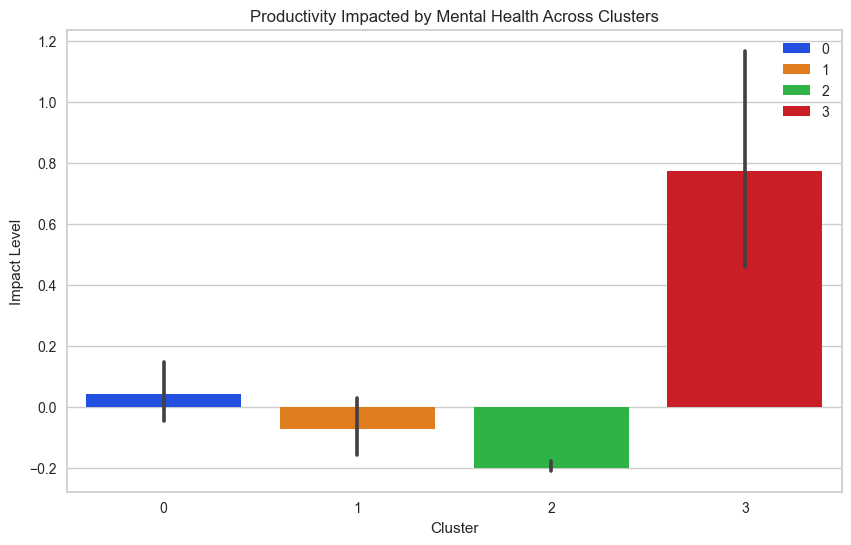

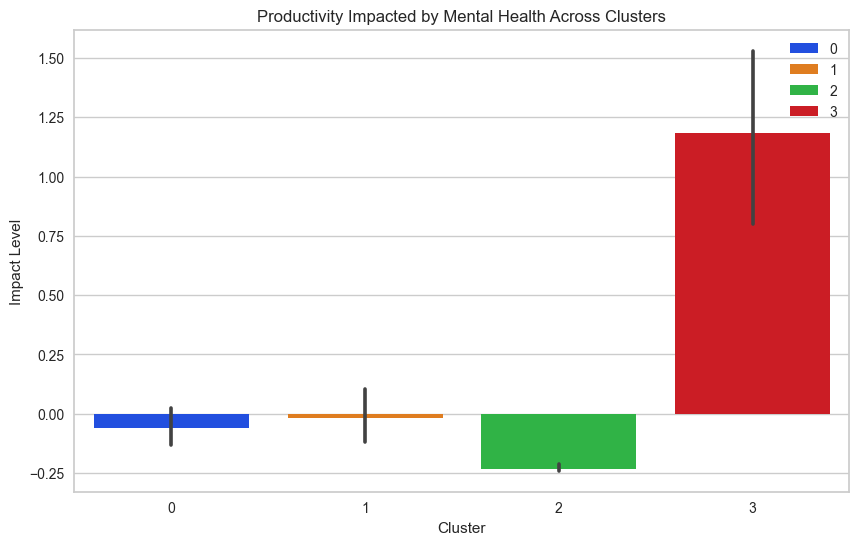

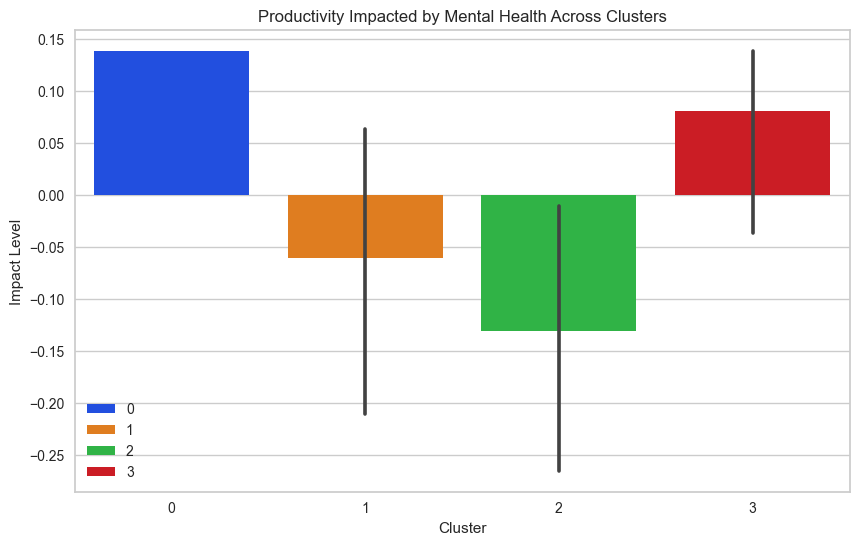

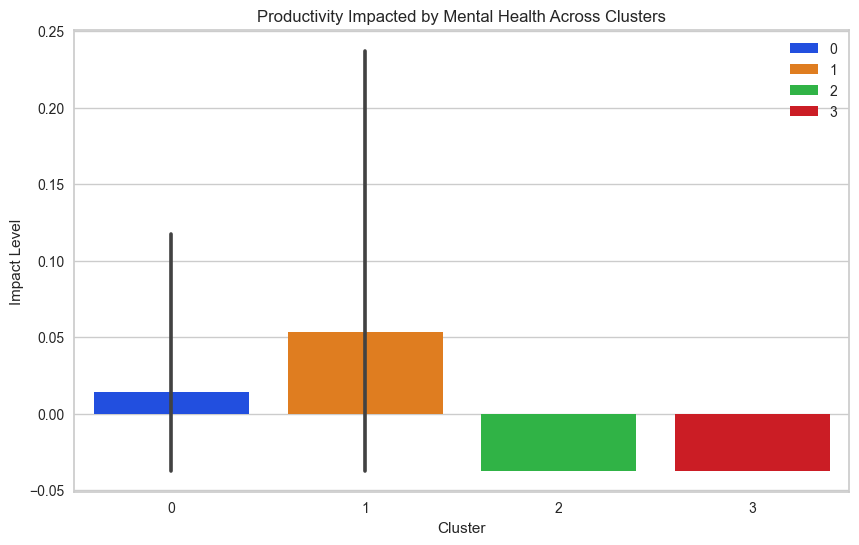

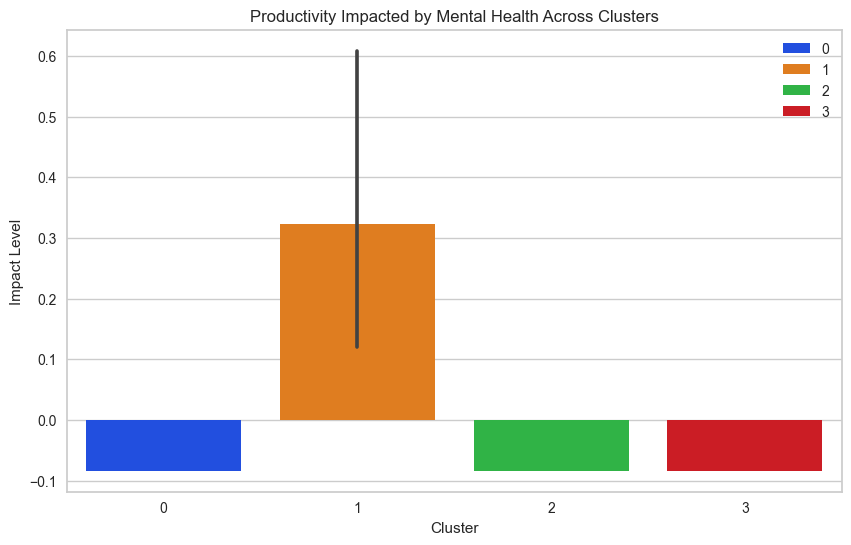

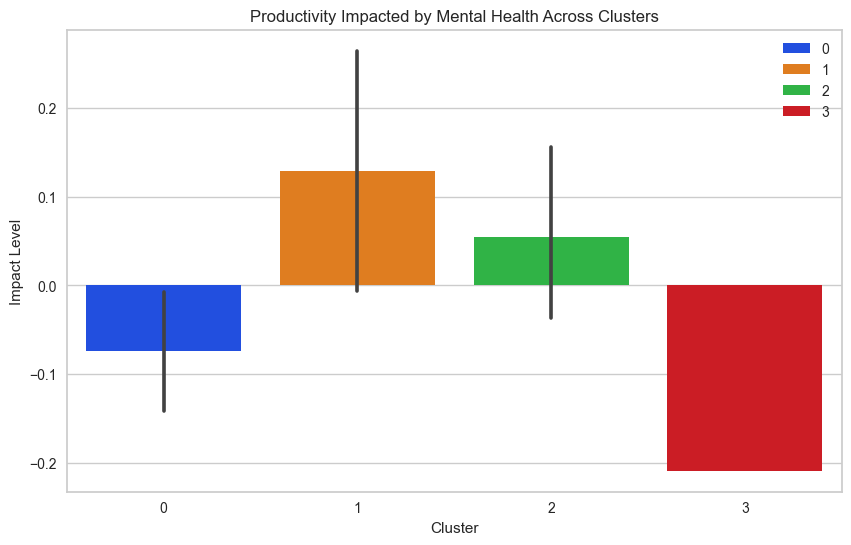

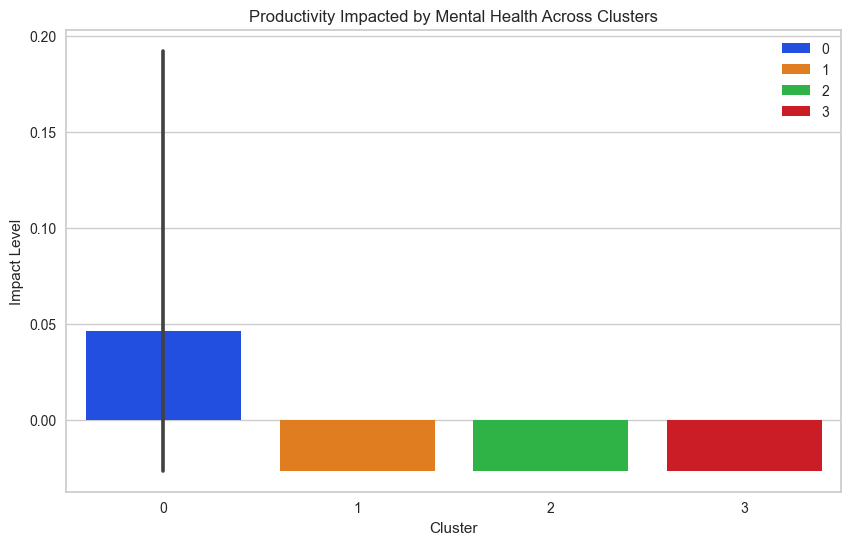

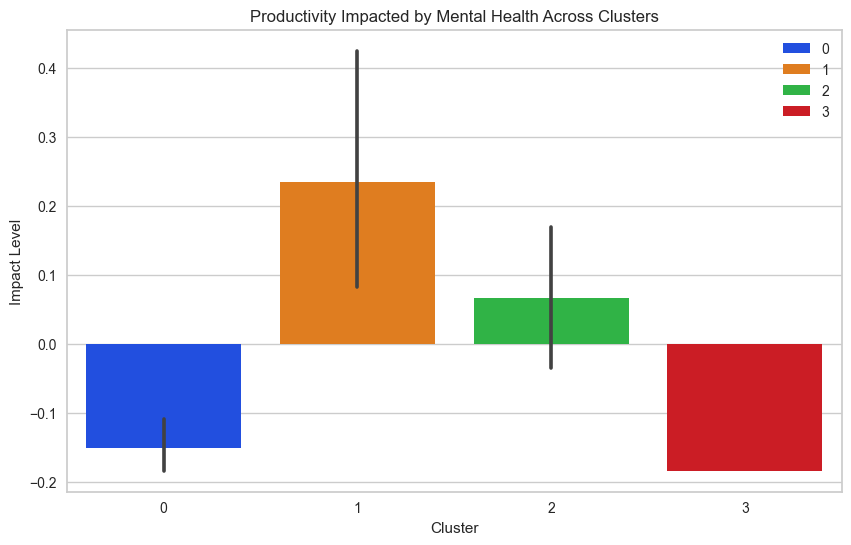

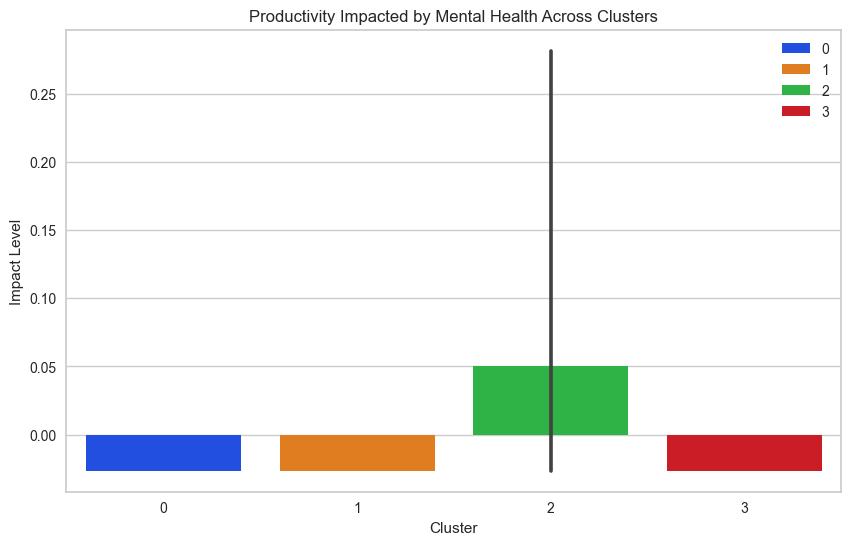

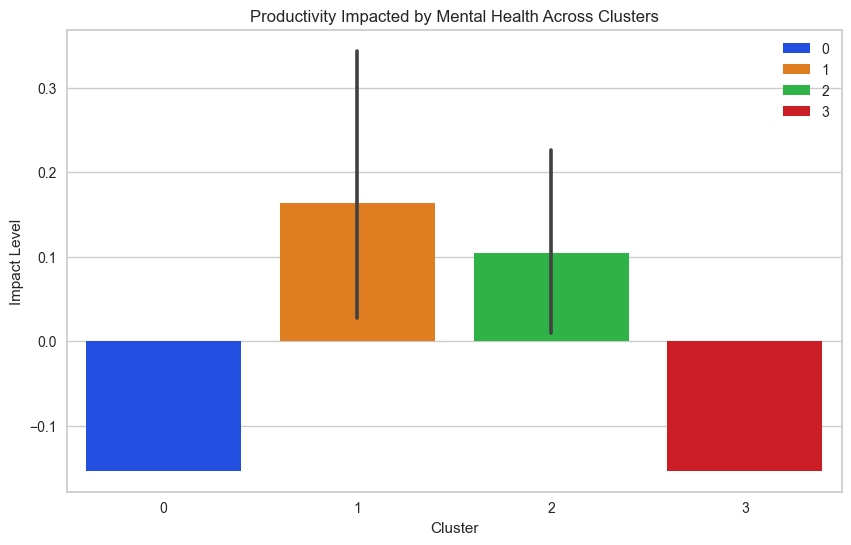

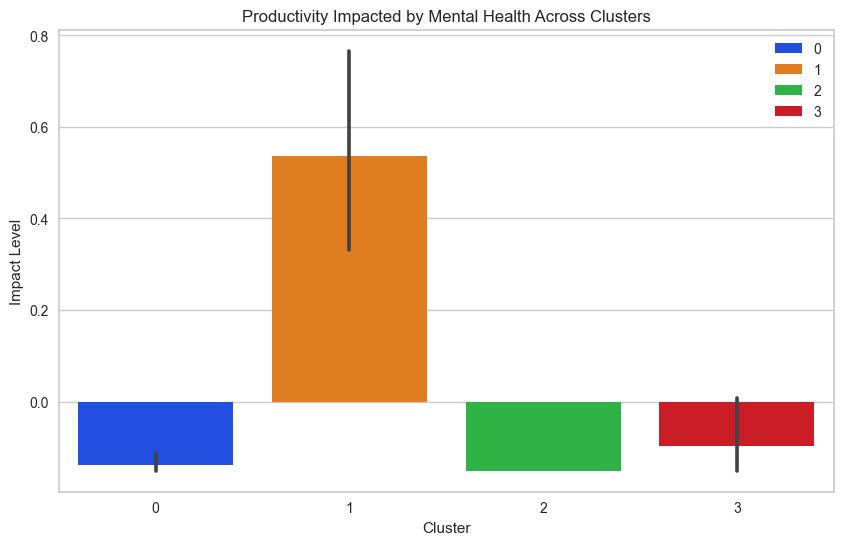

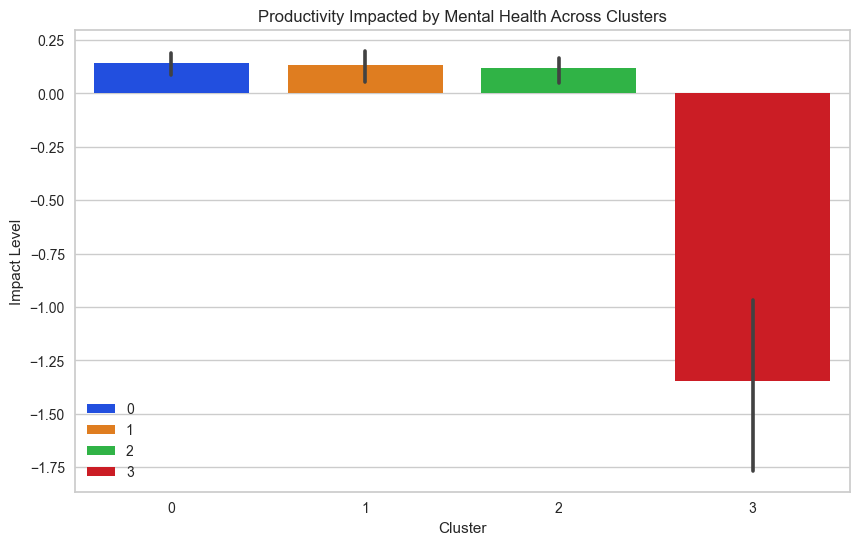

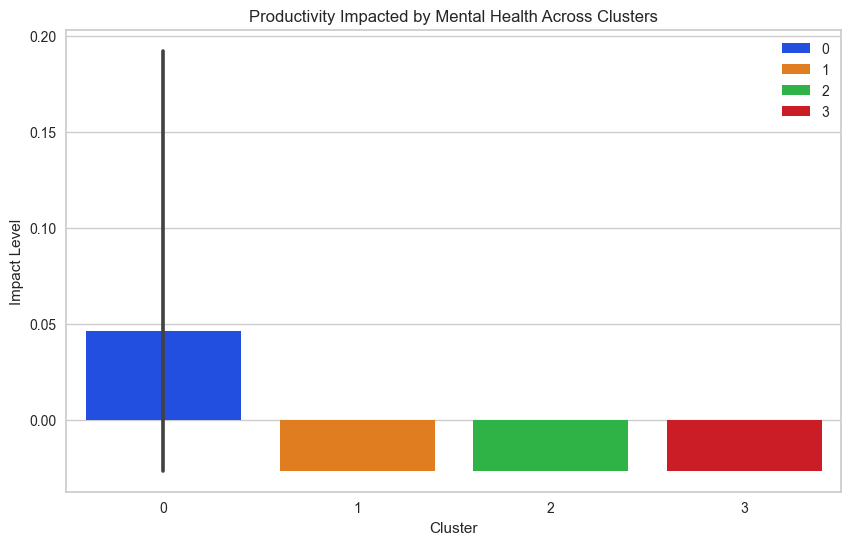

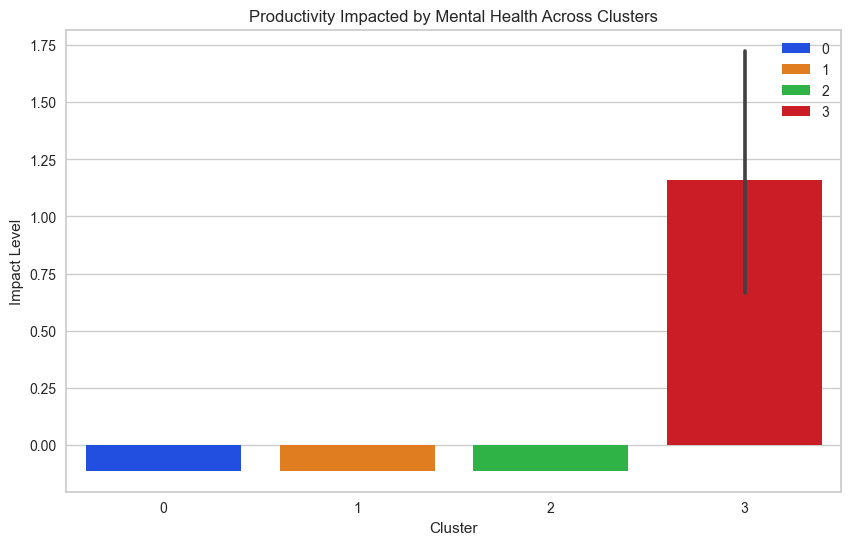

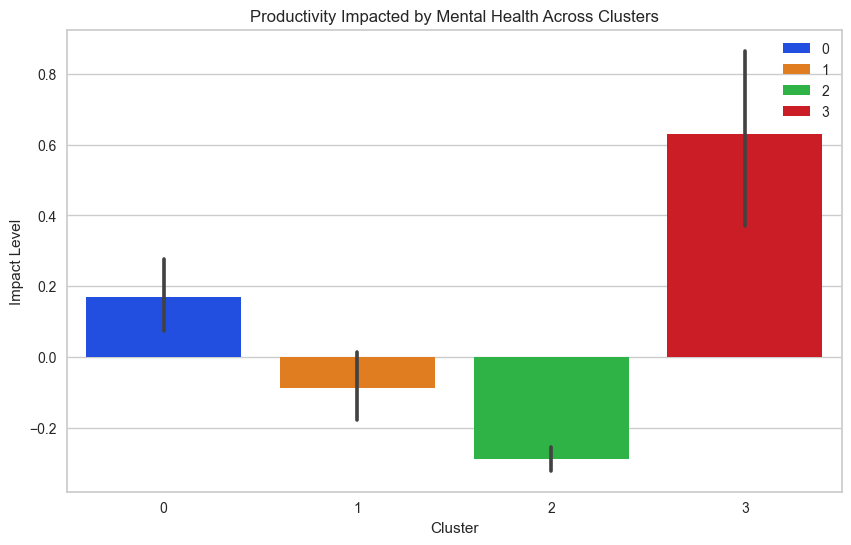

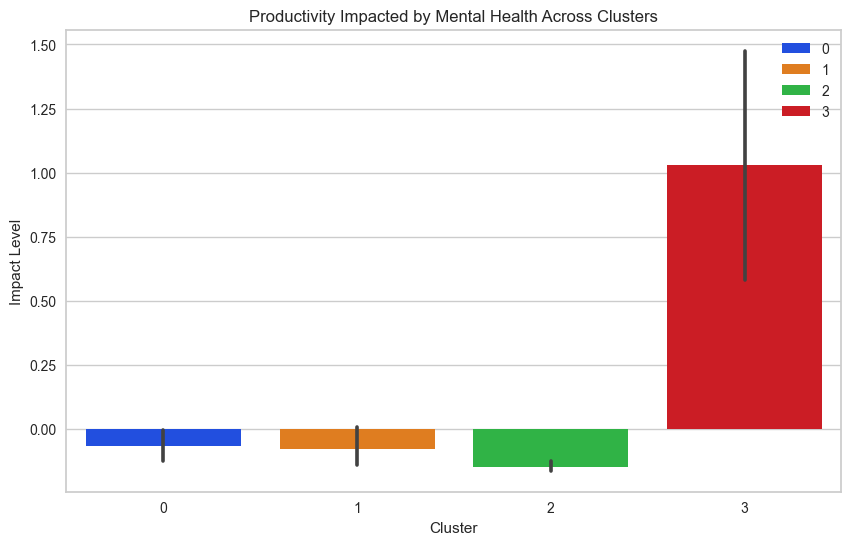

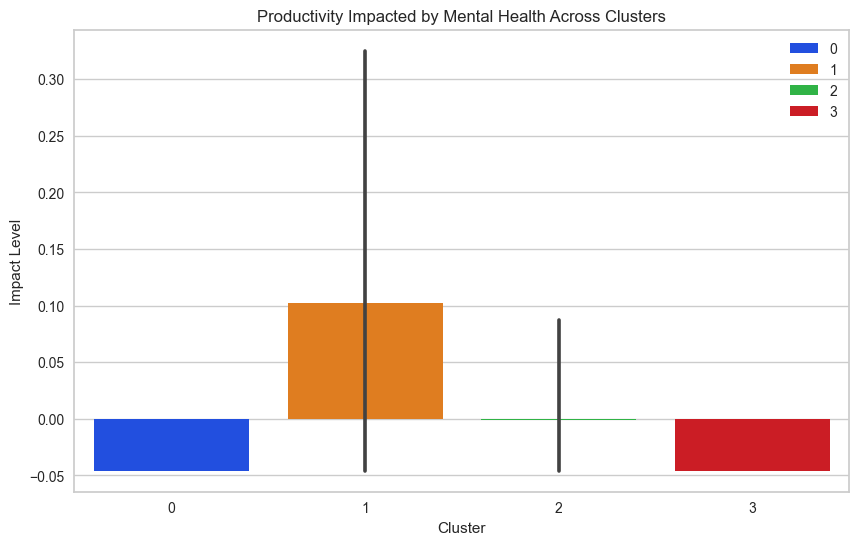

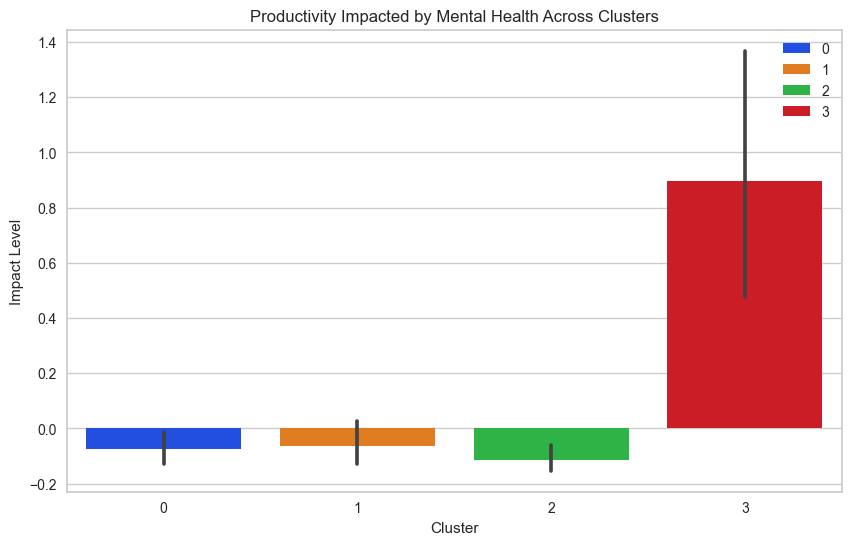

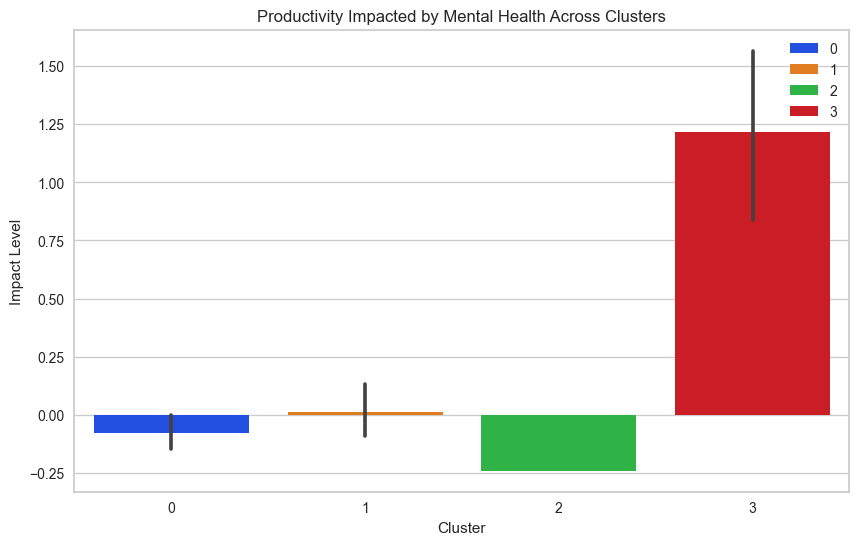

In [ ]:
# Categorical Bar Plot of All Columns
for column in data.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Cluster', y=column, data=scaled_data, palette='bright', hue=kmeans_labels)
    plt.title('Productivity Impacted by Mental Health Across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel('Impact Level')
    plt.show()

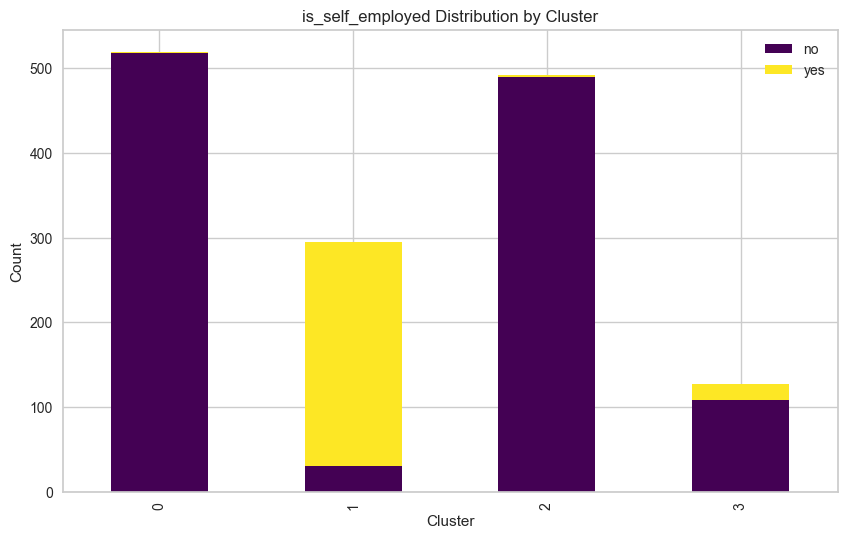

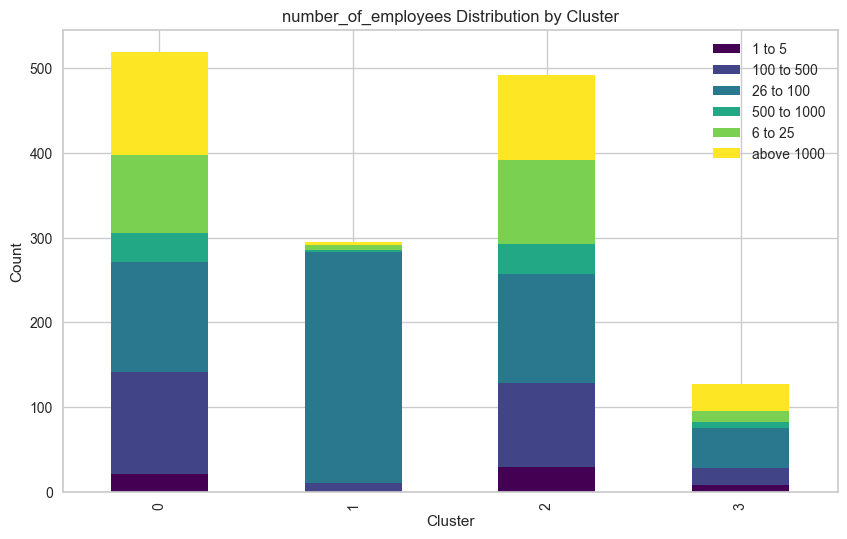

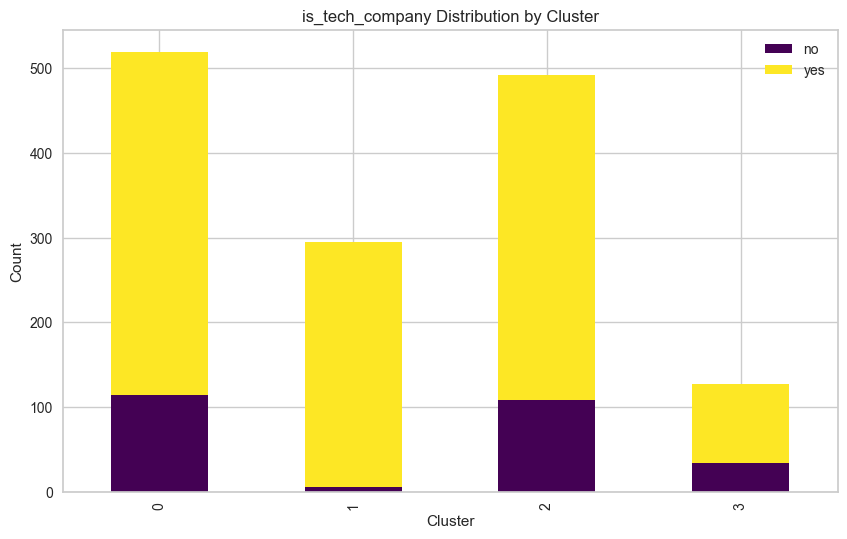

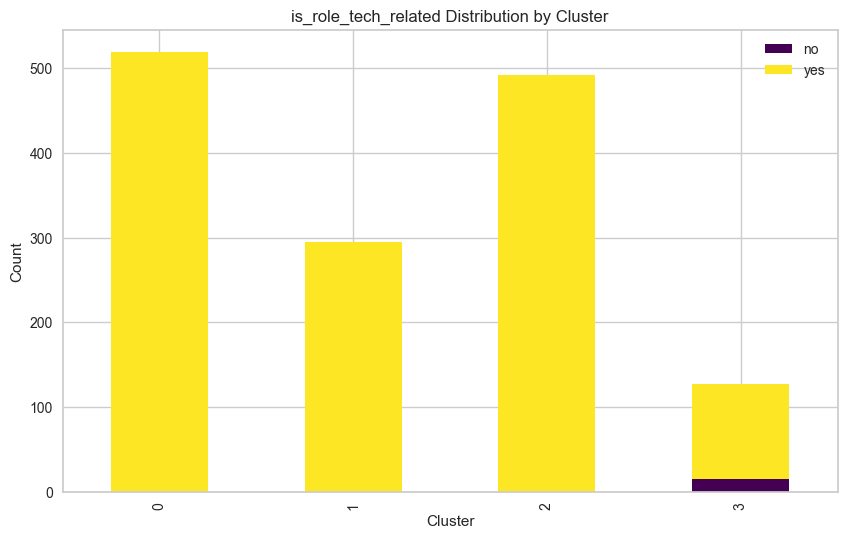

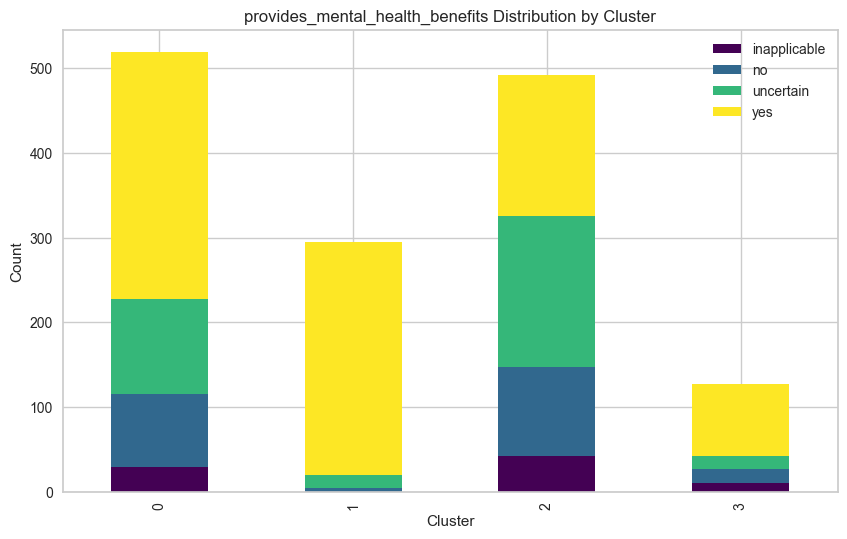

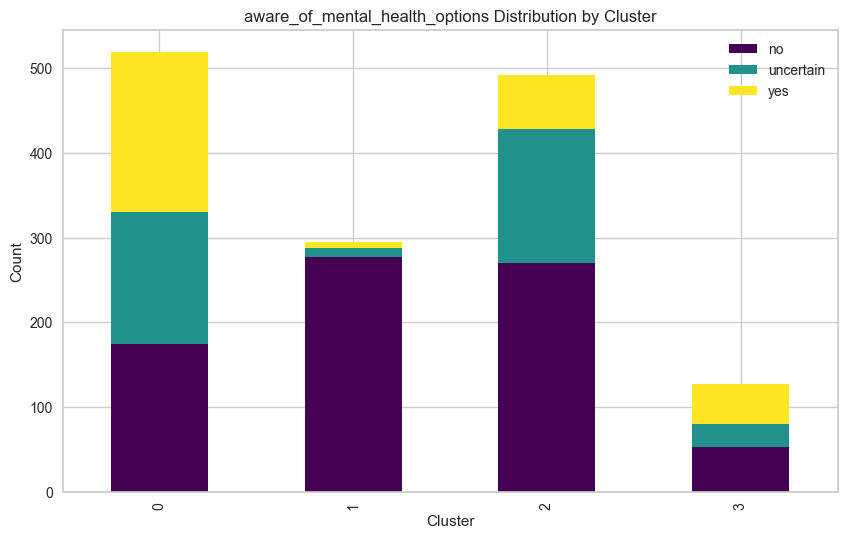

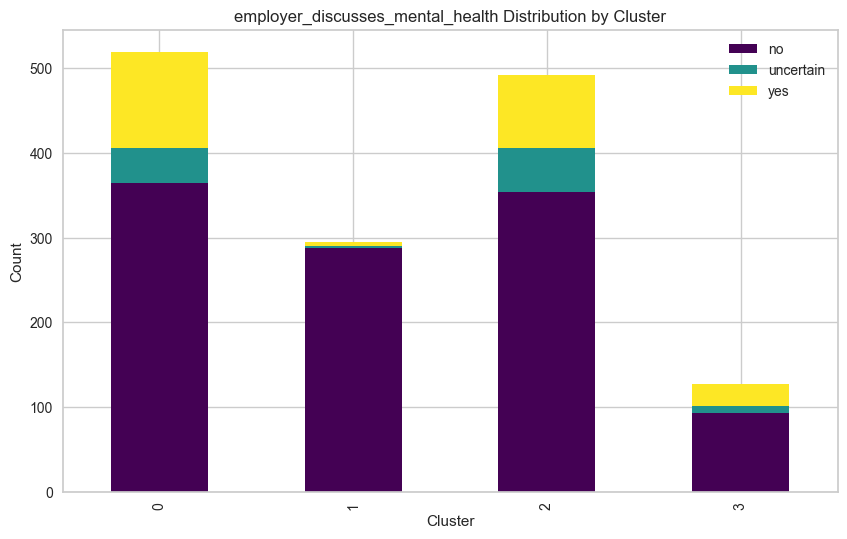

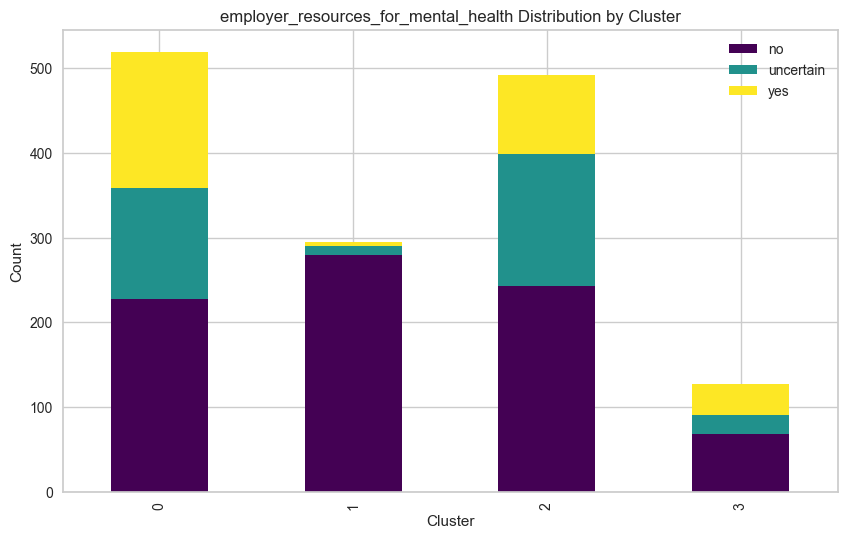

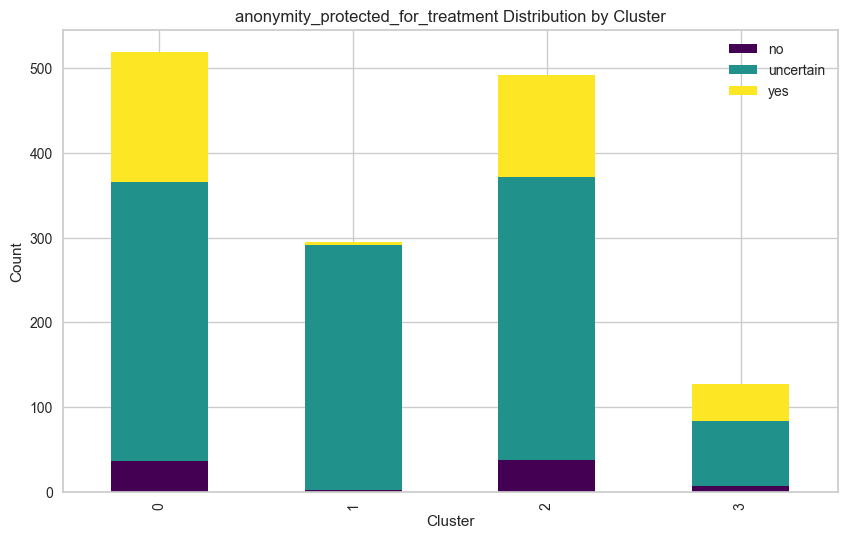

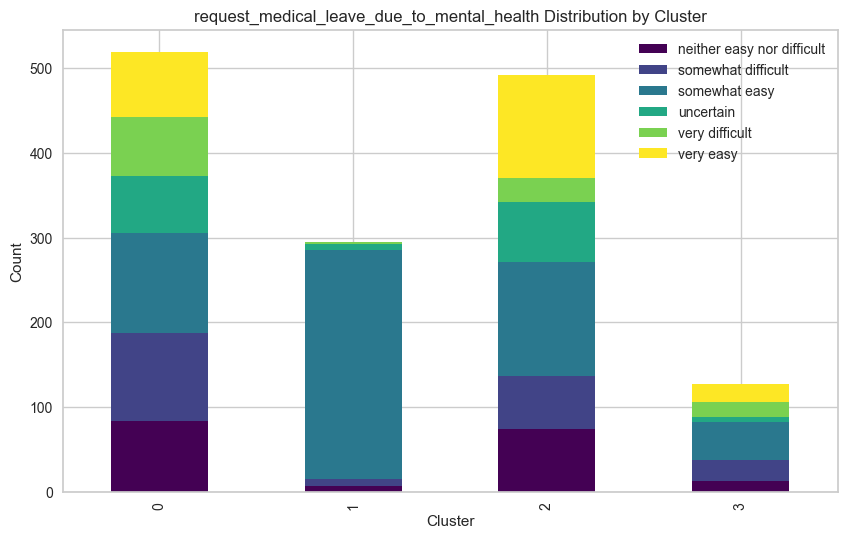

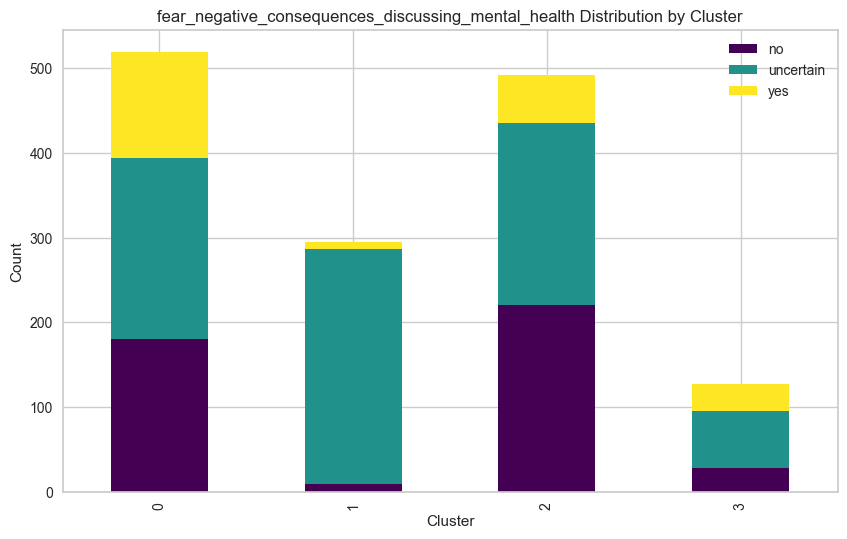

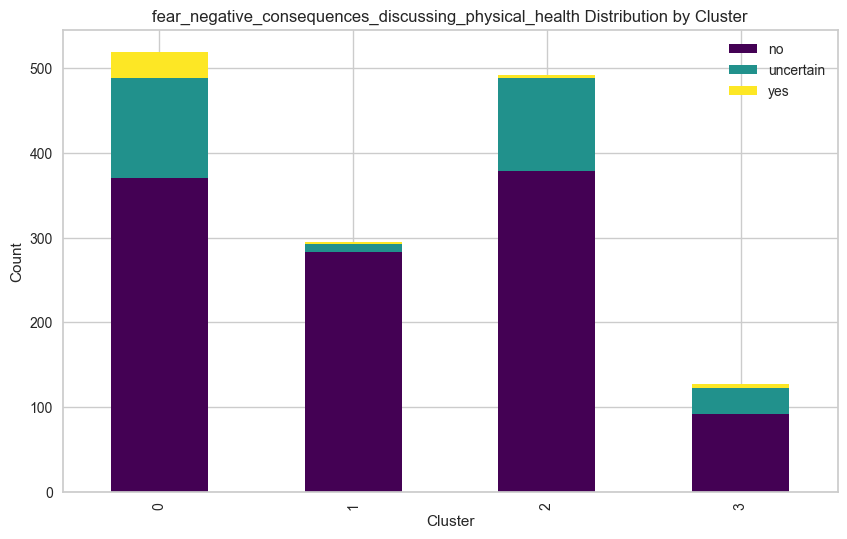

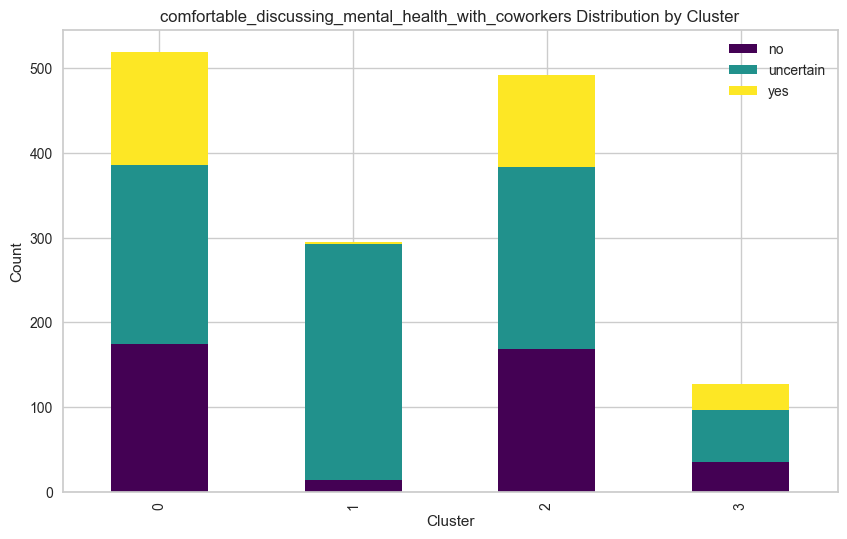

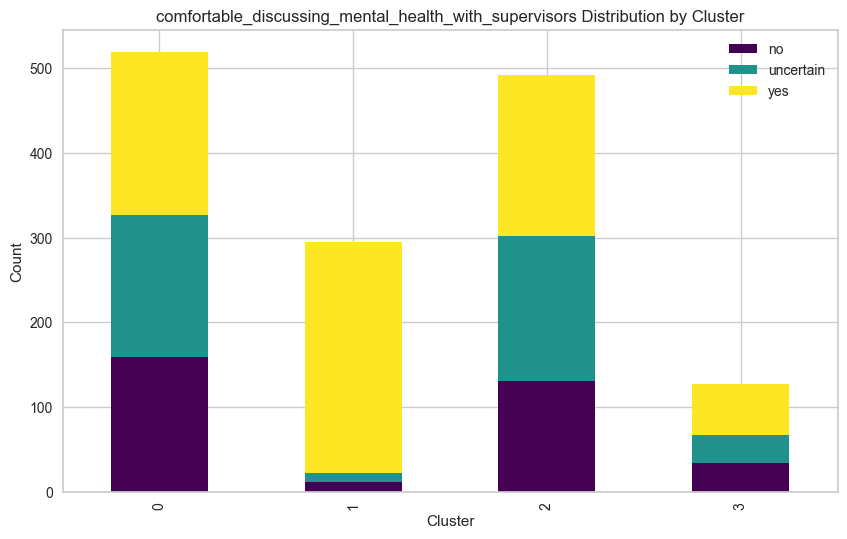

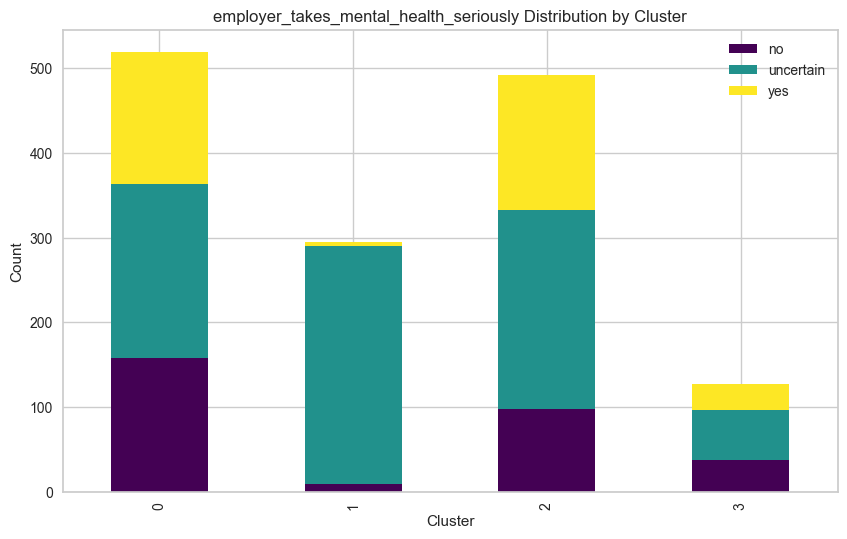

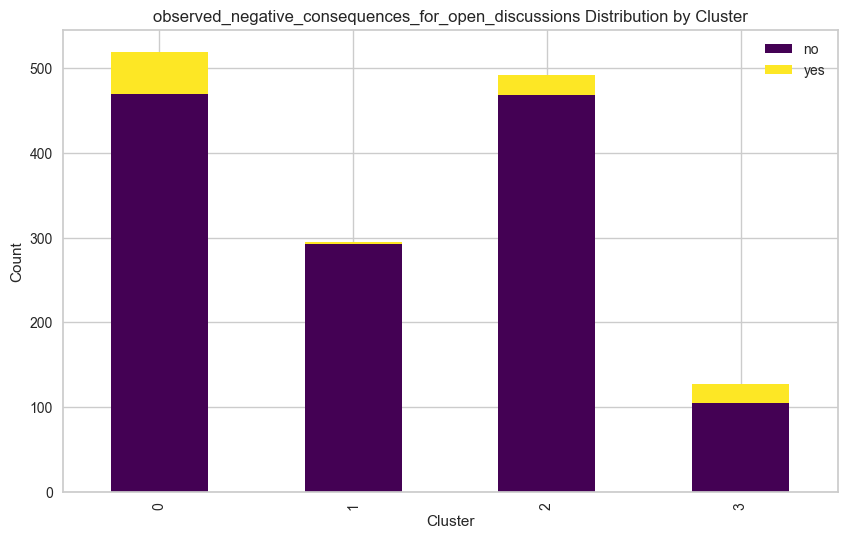

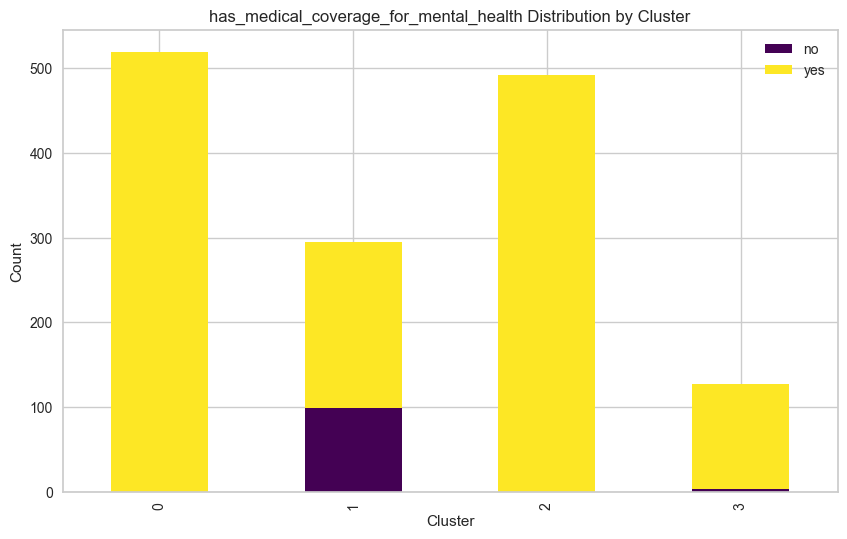

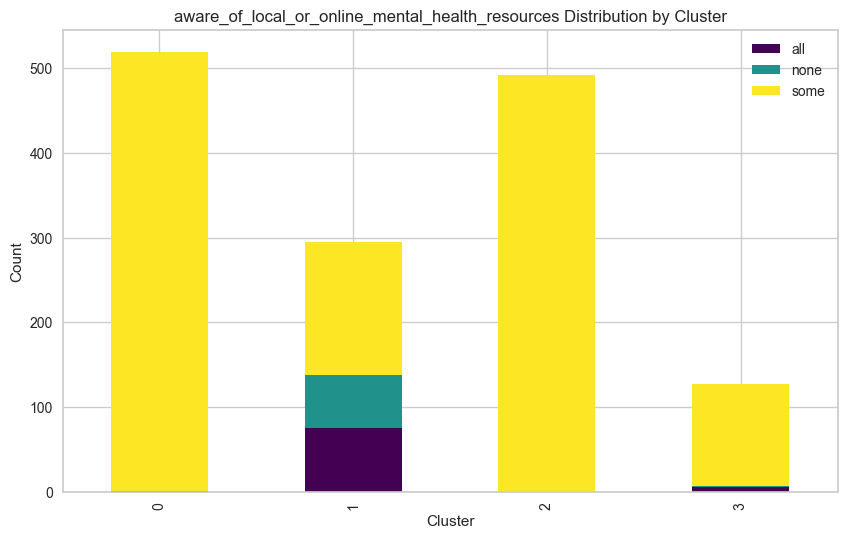

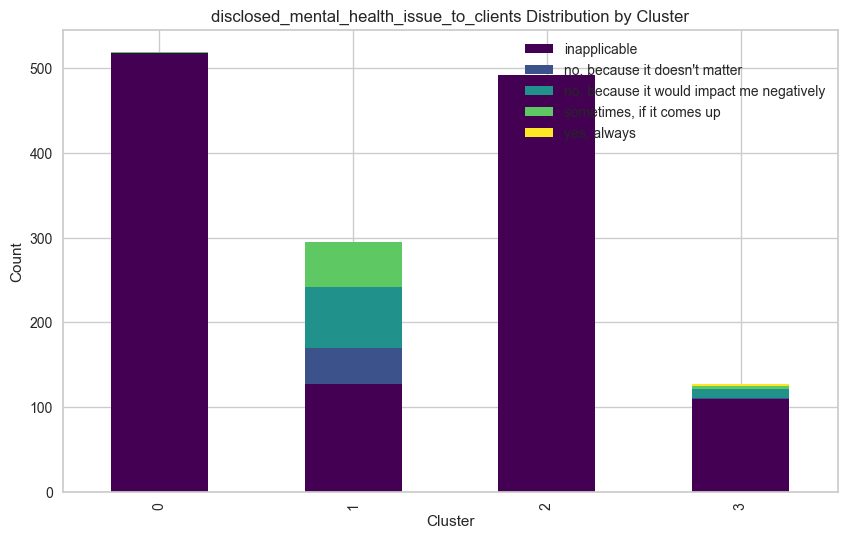

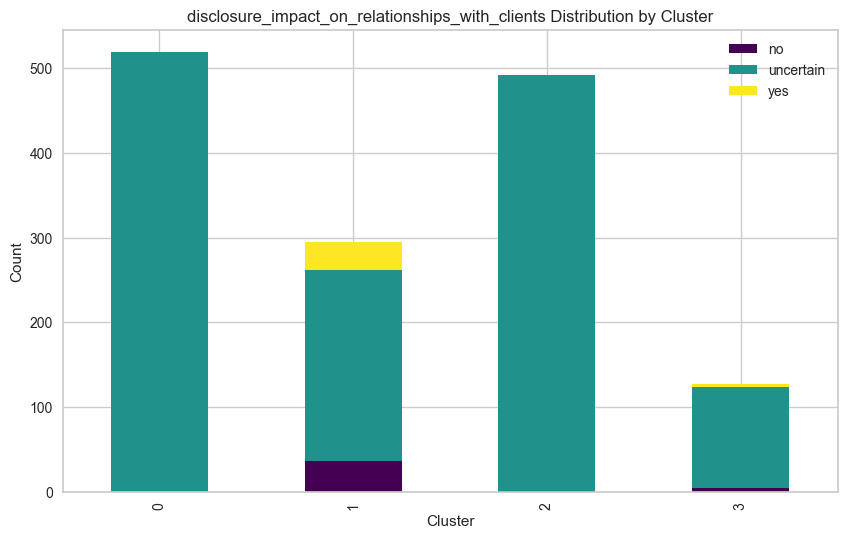

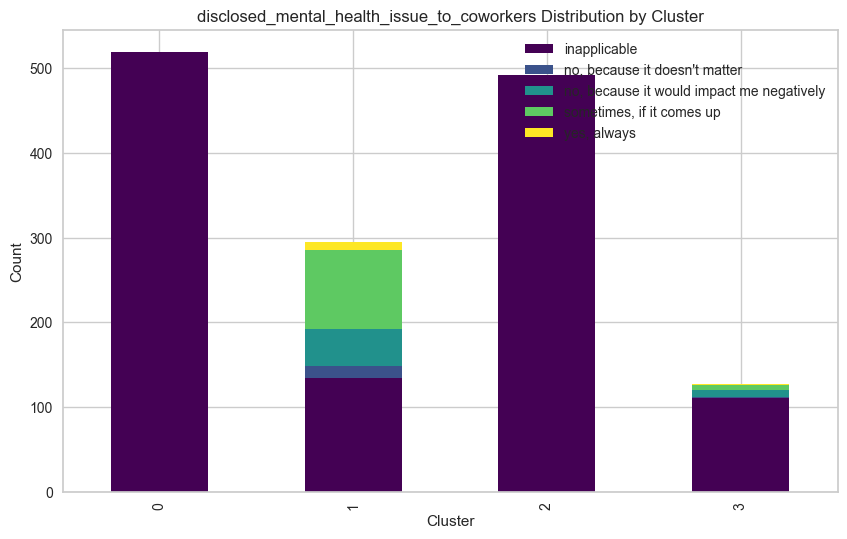

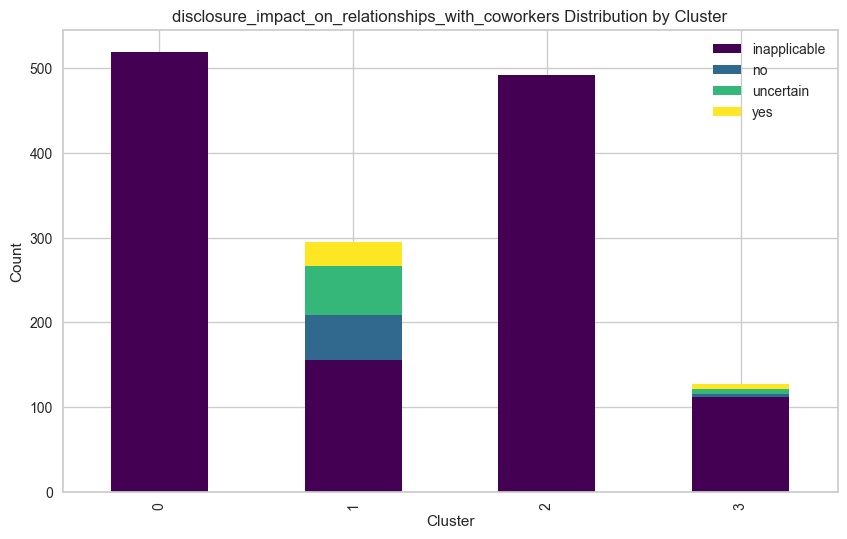

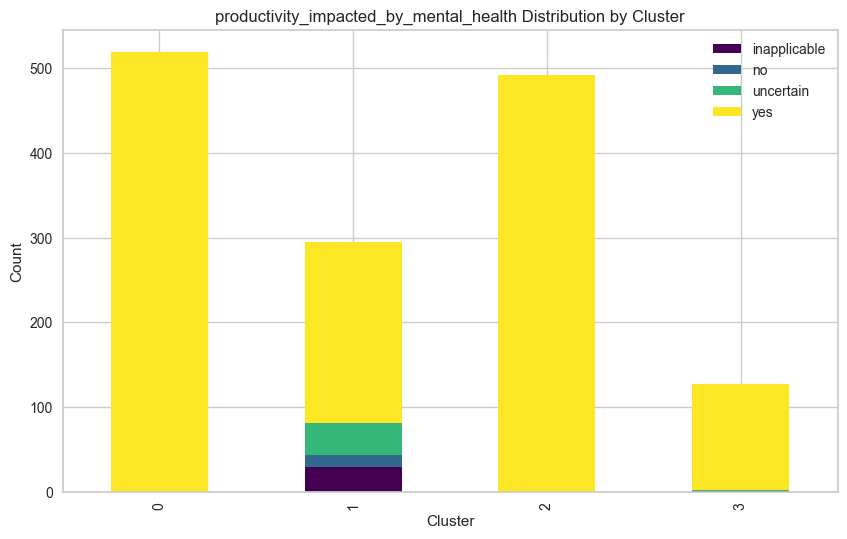

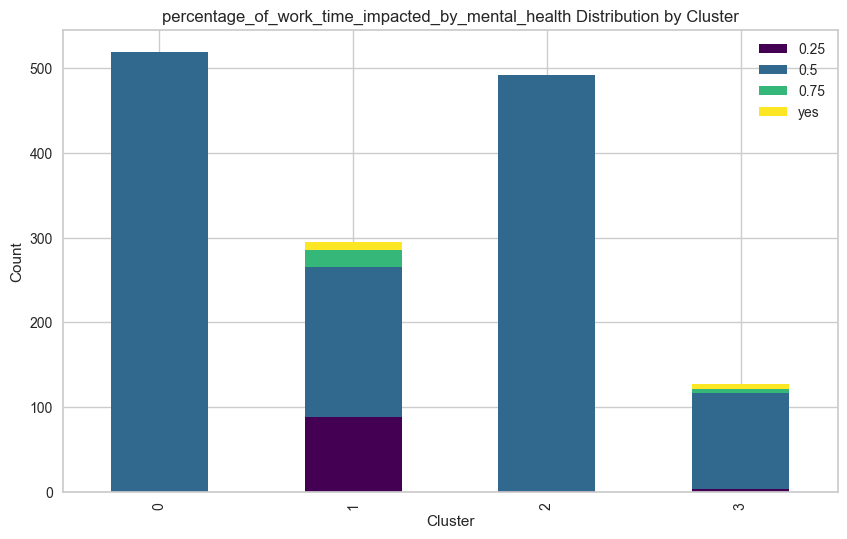

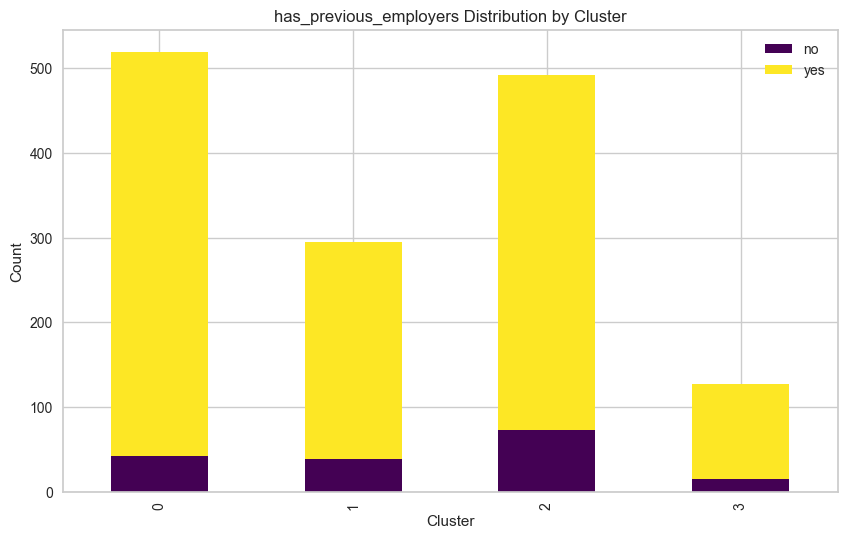

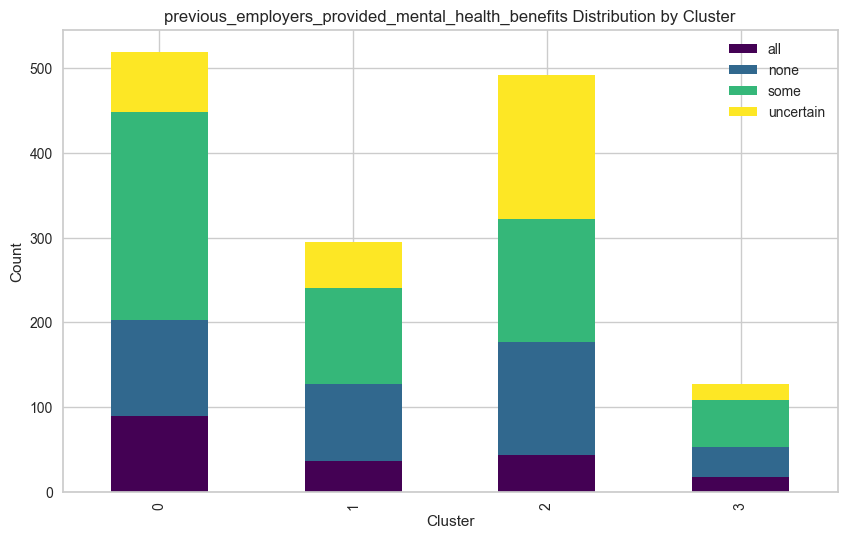

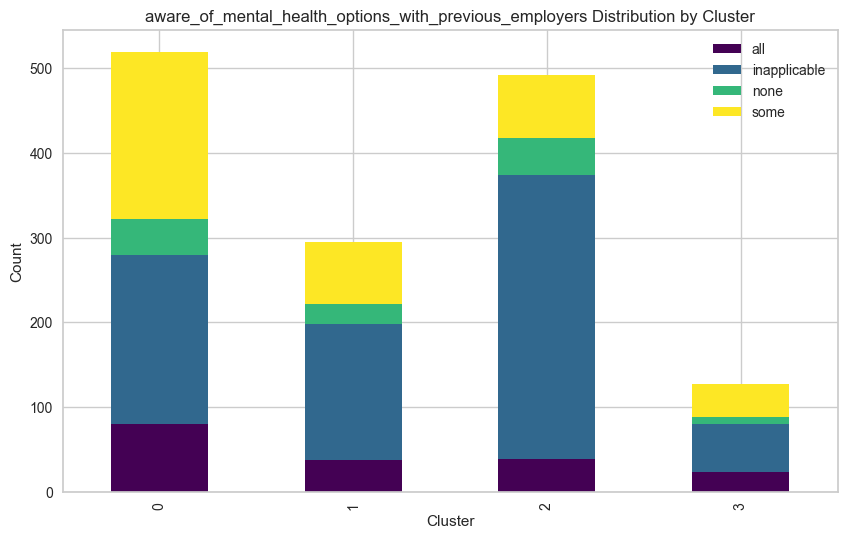

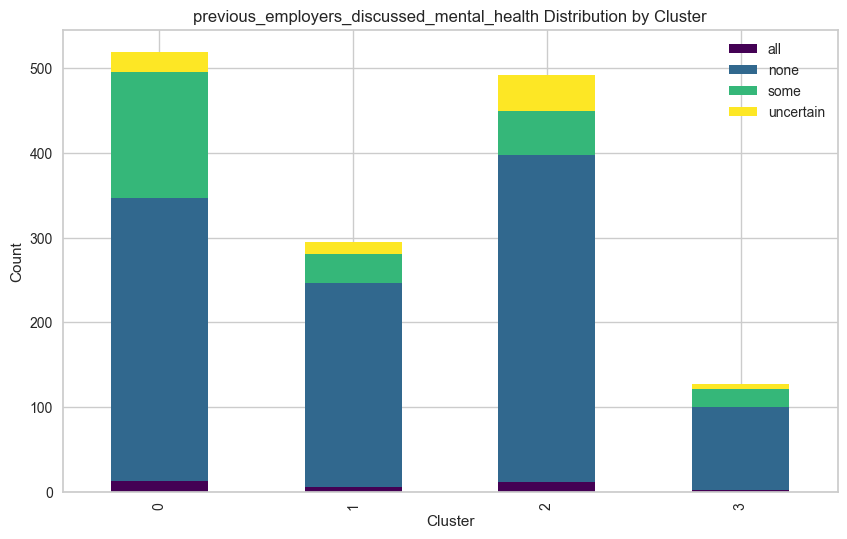

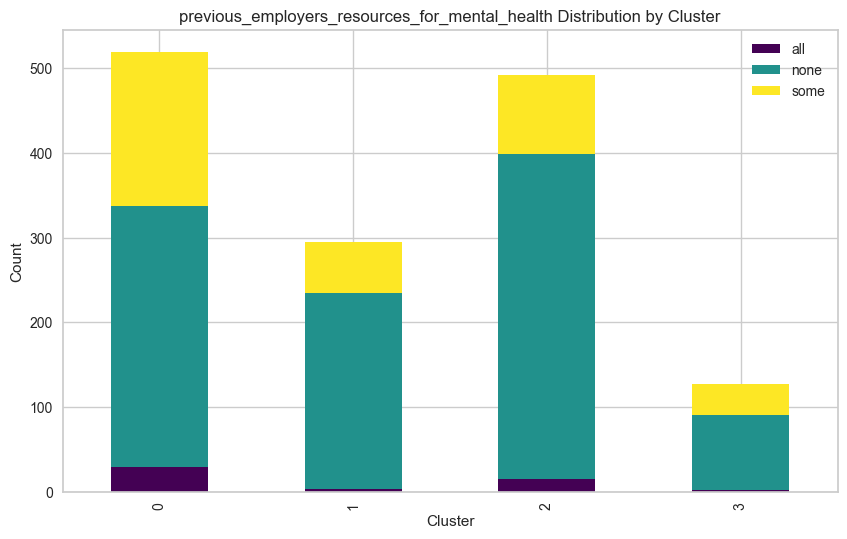

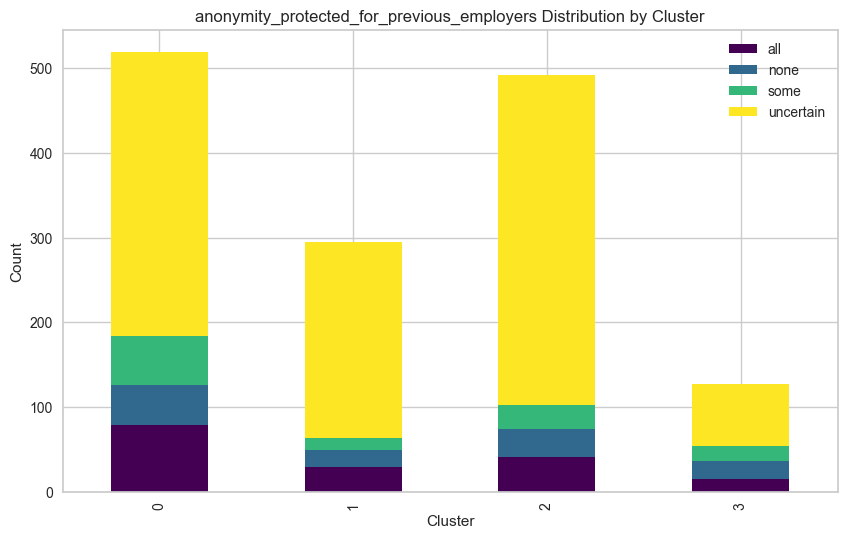

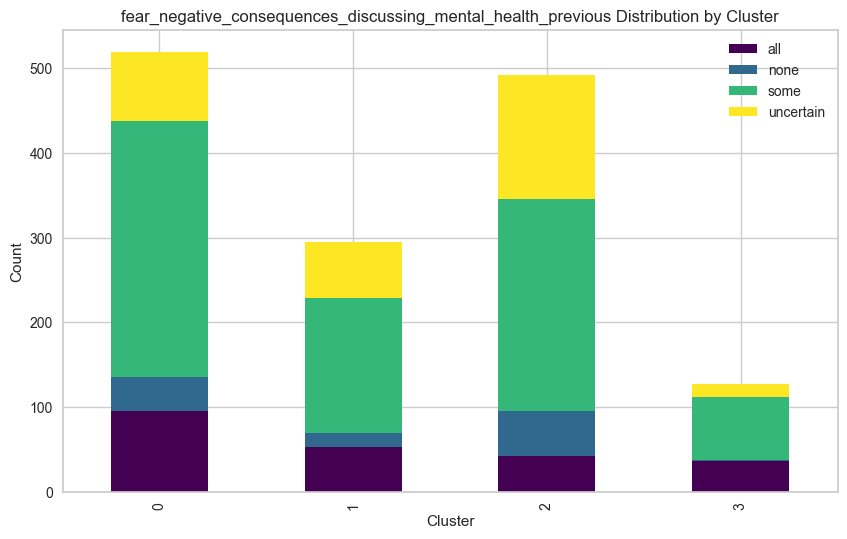

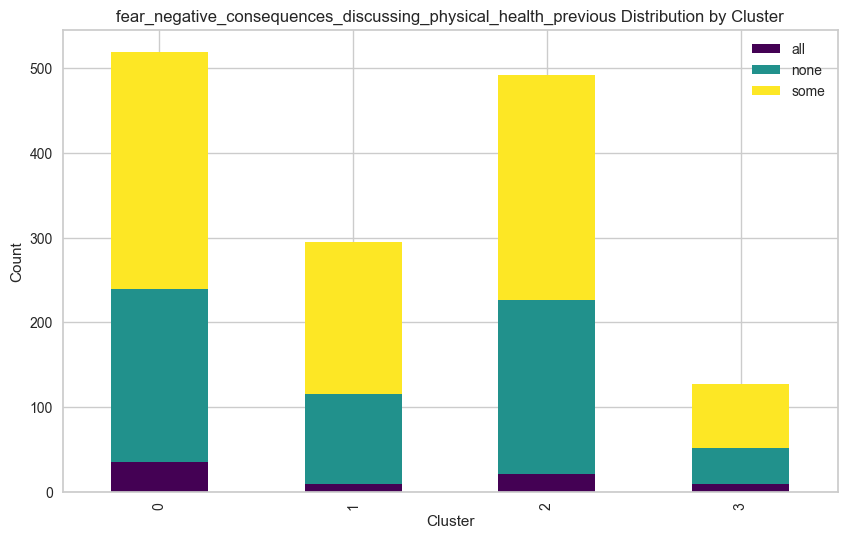

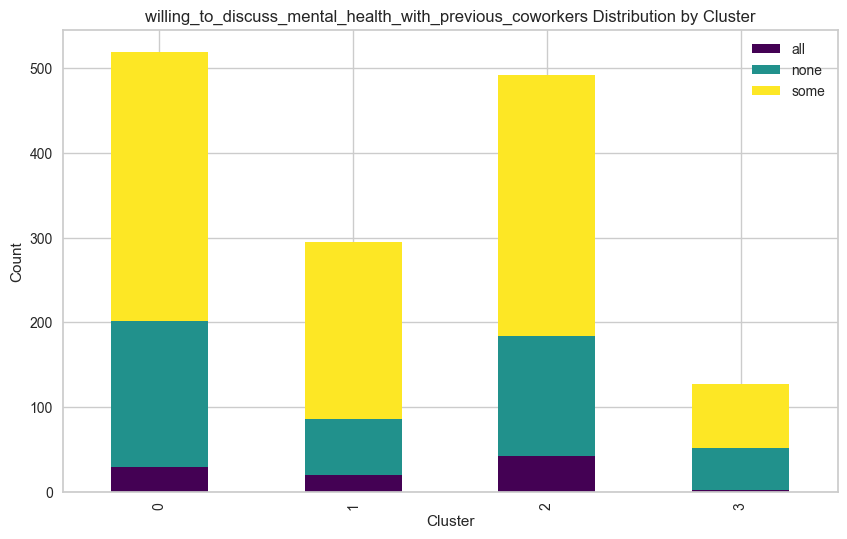

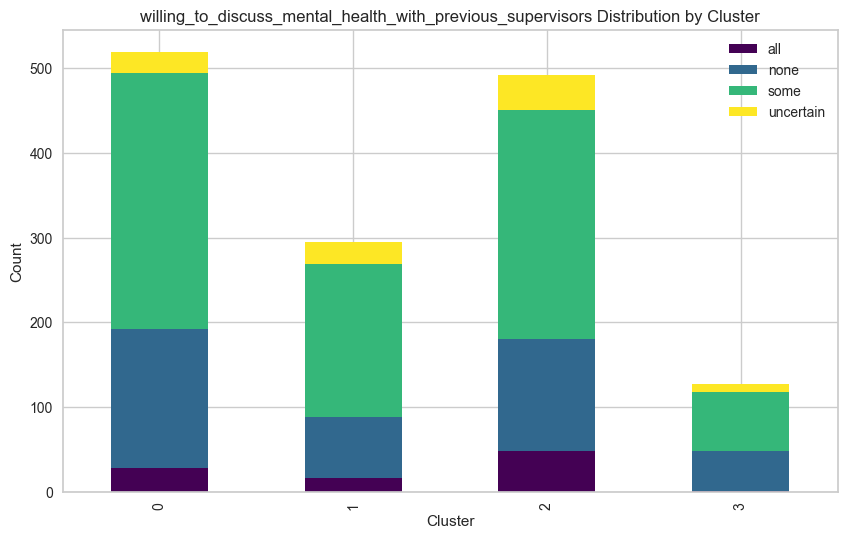

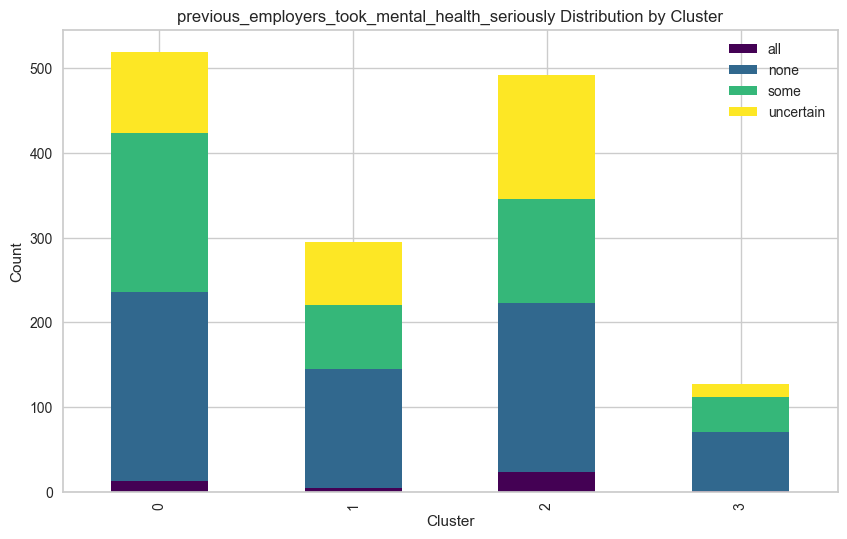

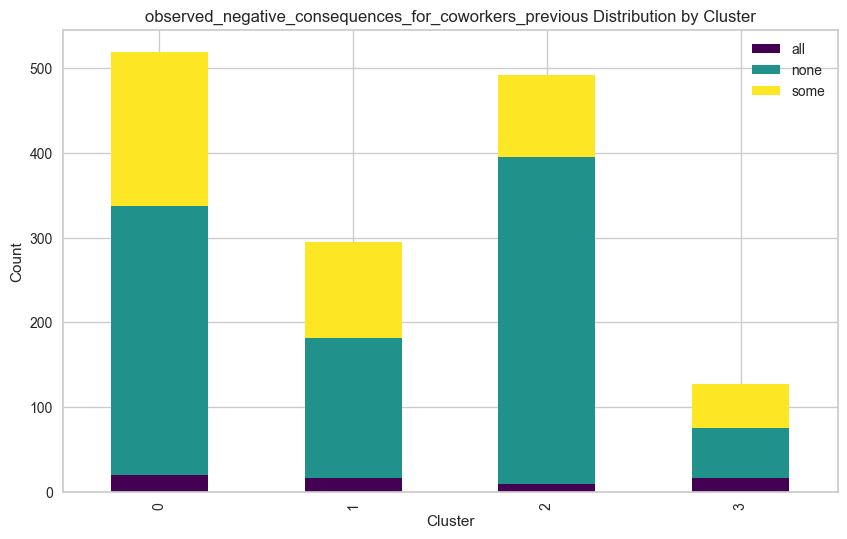

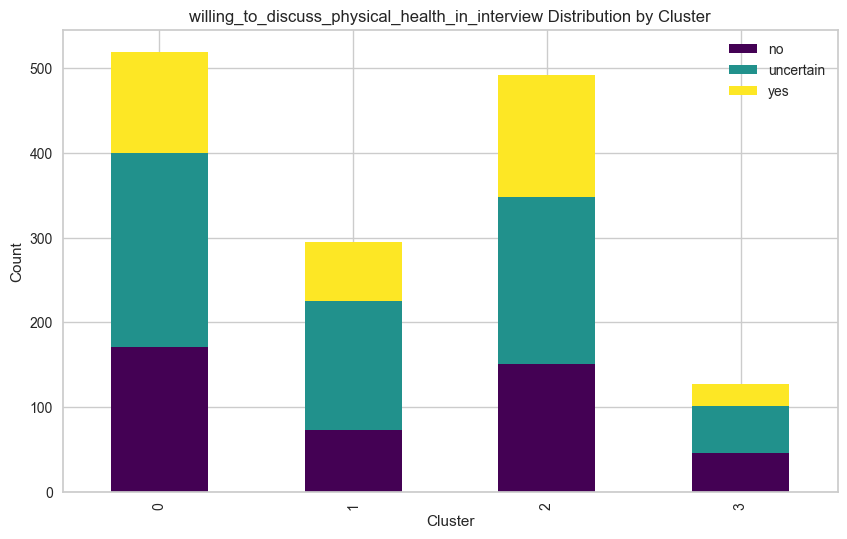

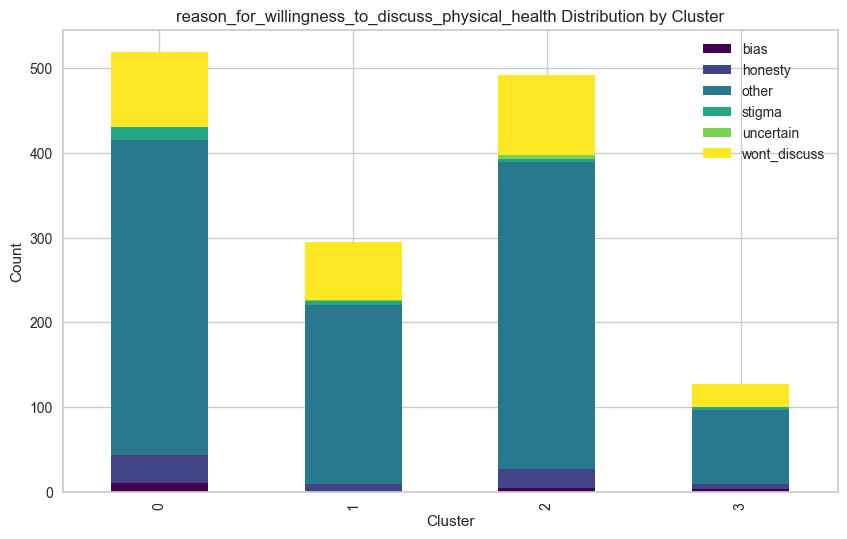

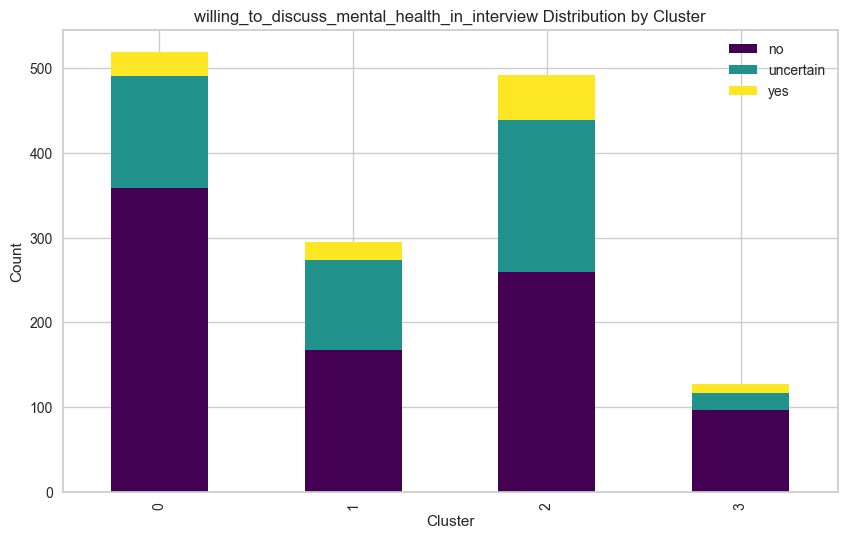

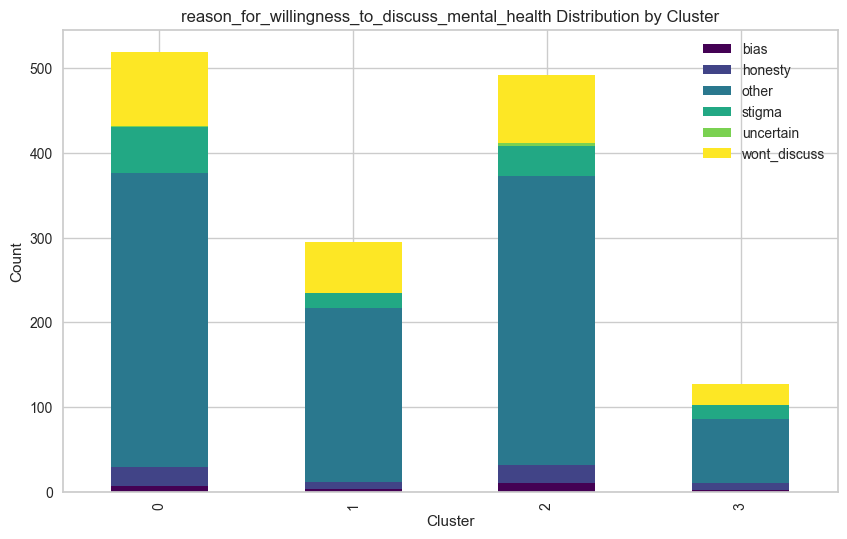

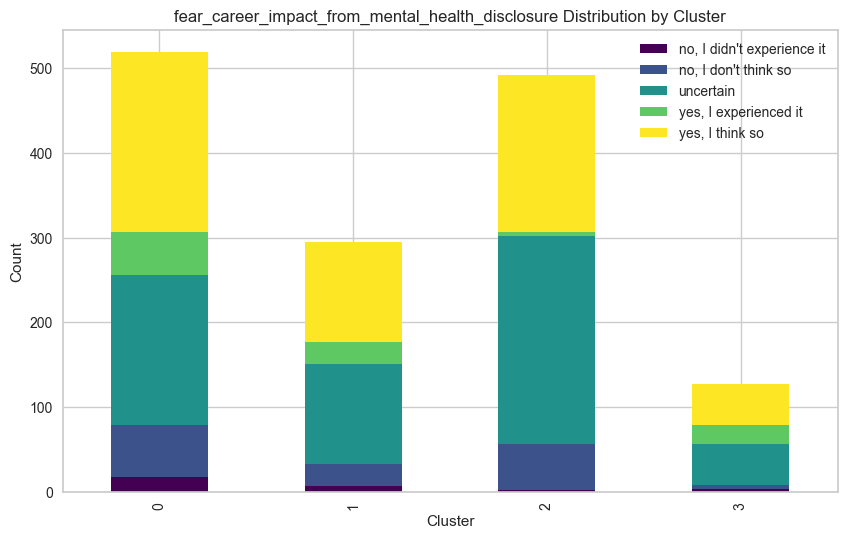

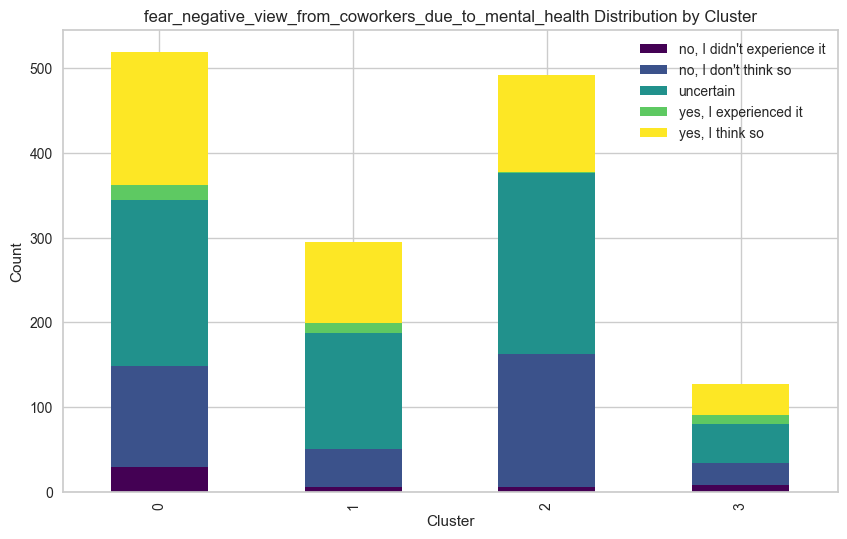

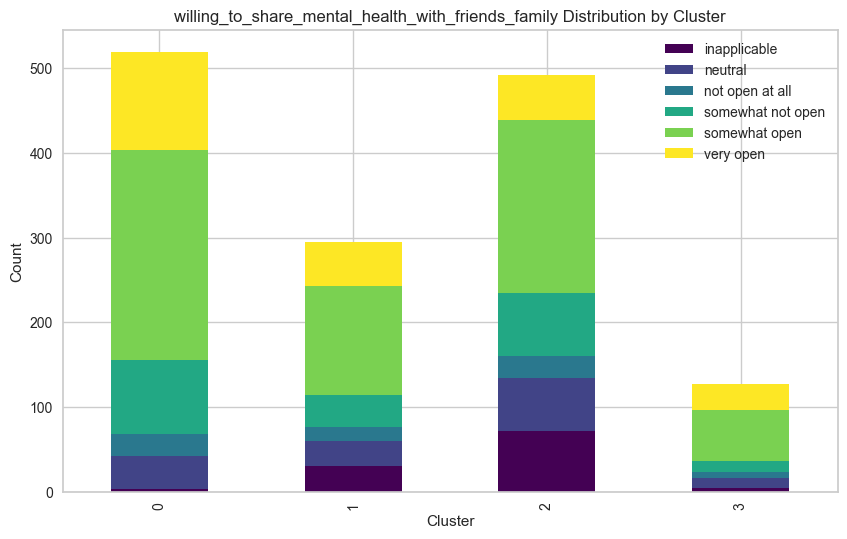

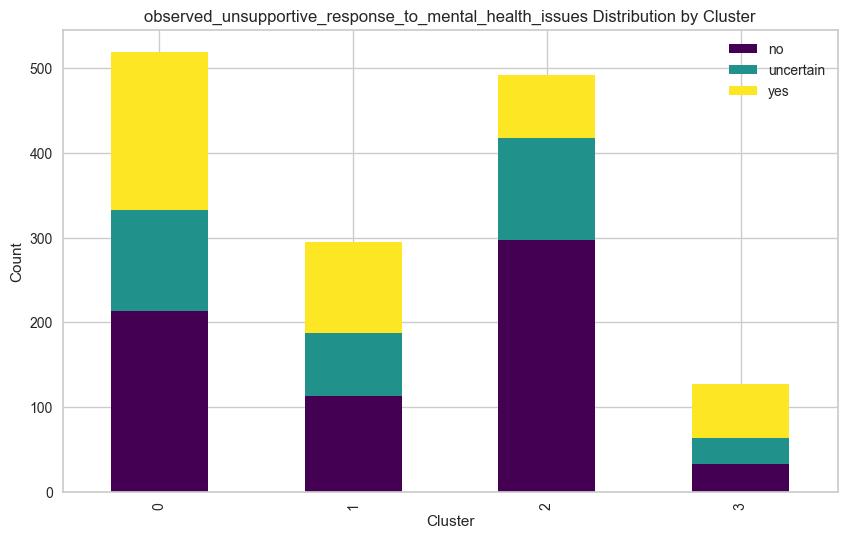

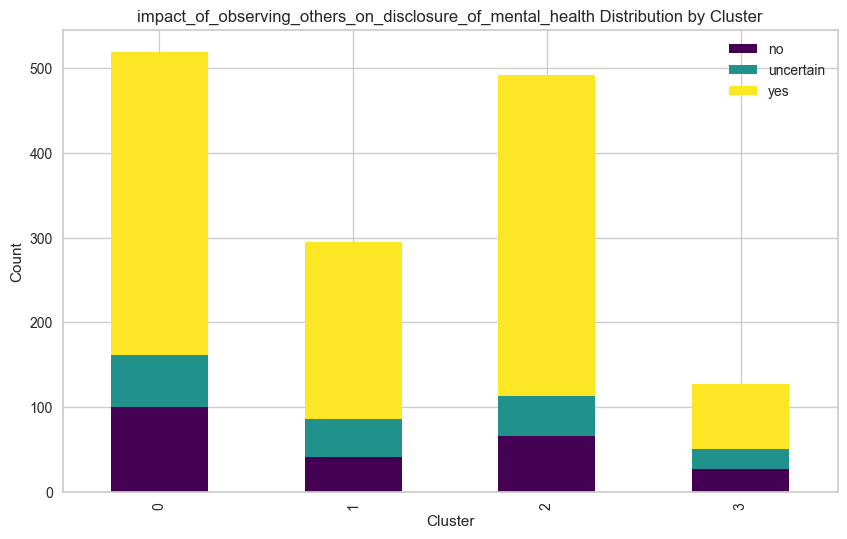

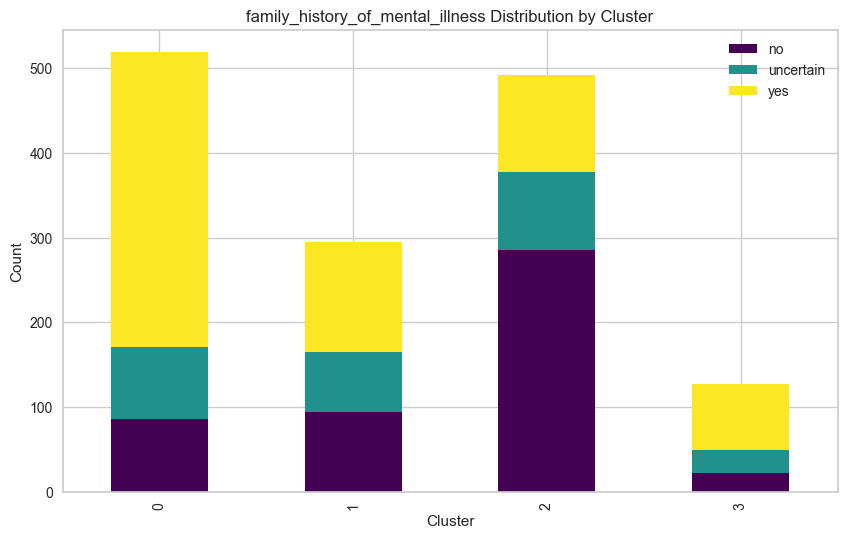

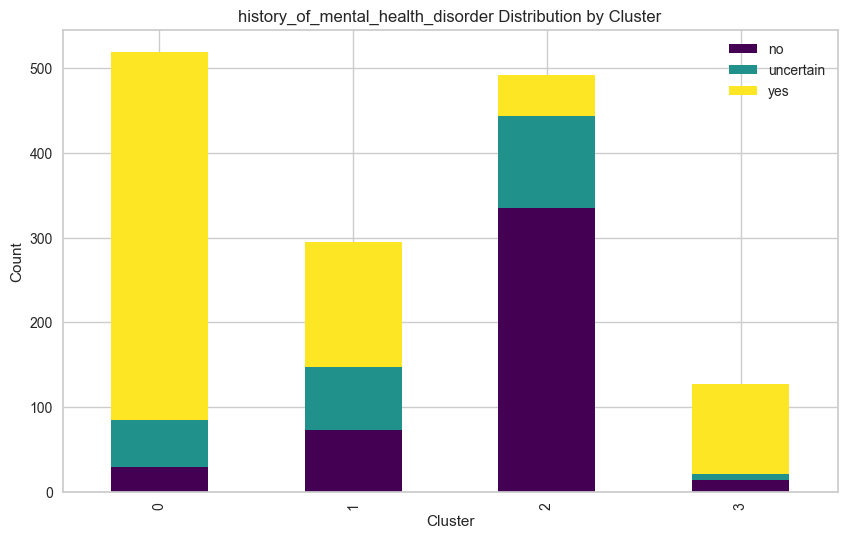

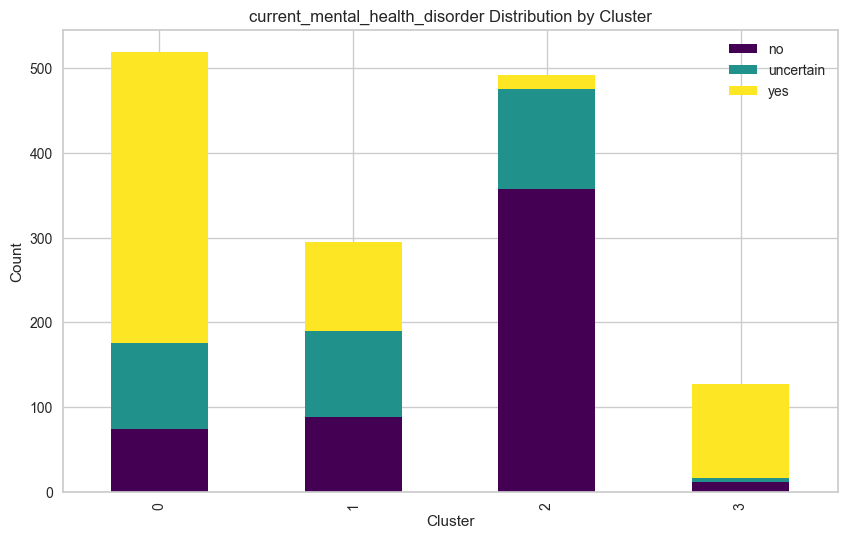

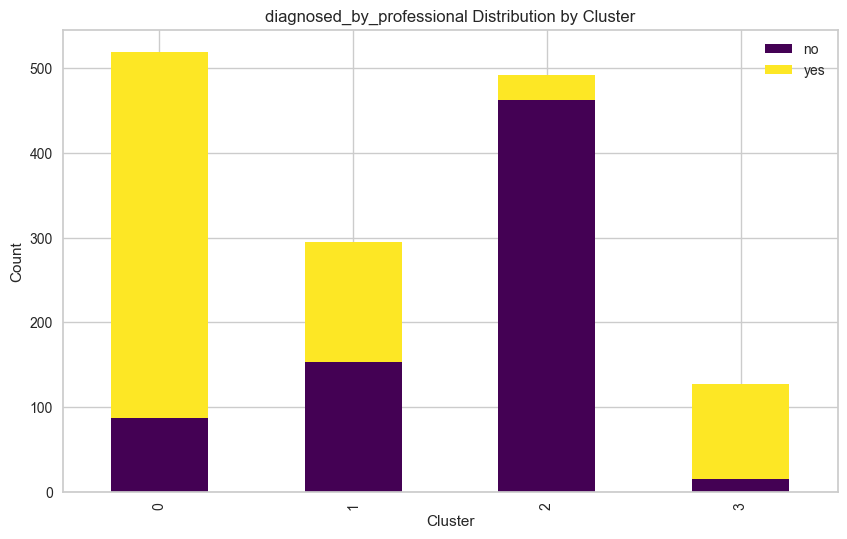

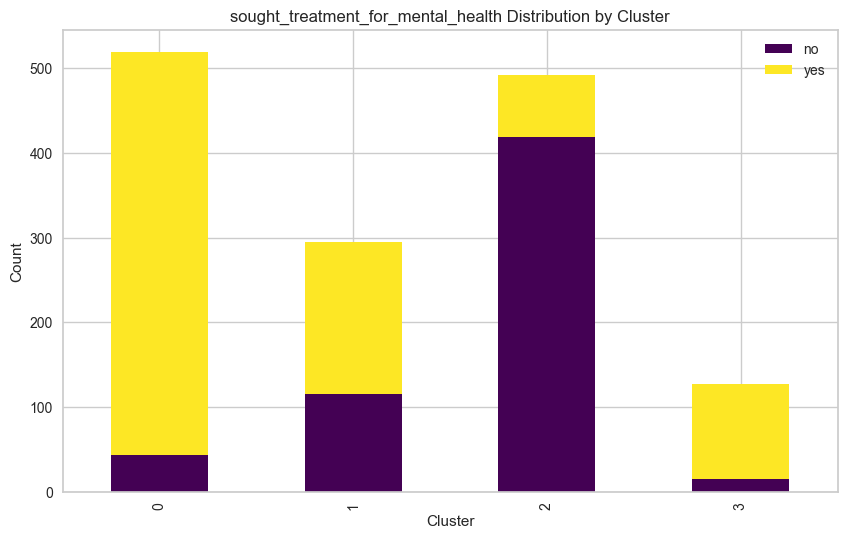

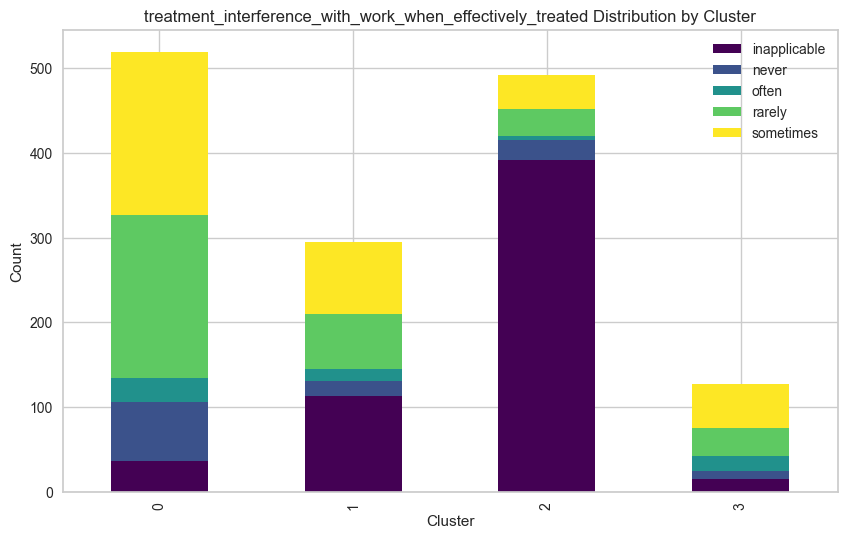

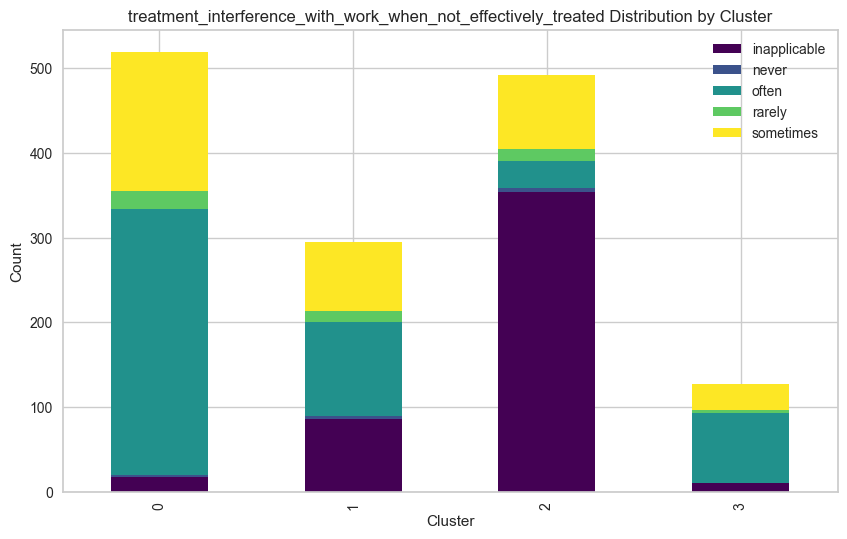

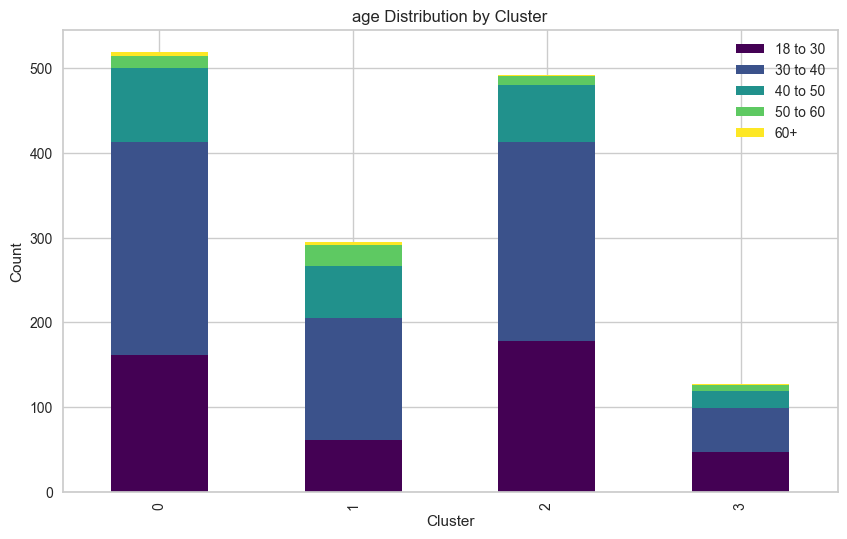

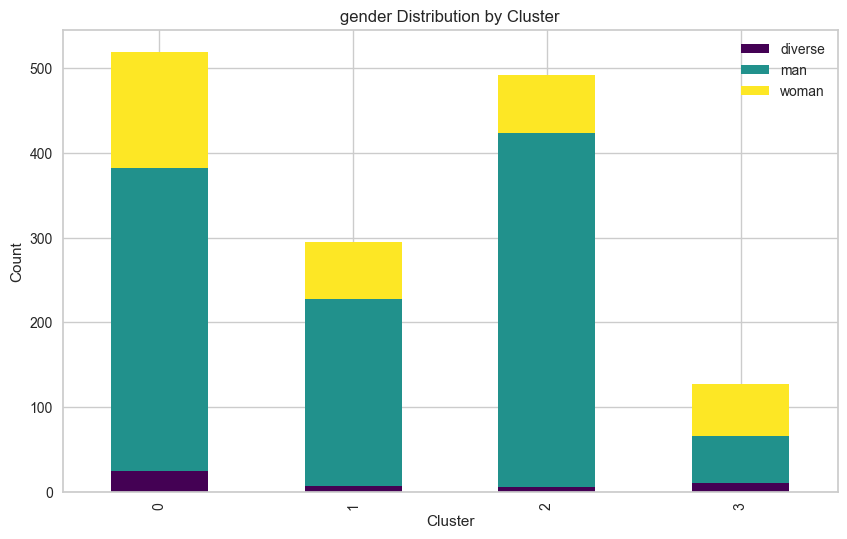

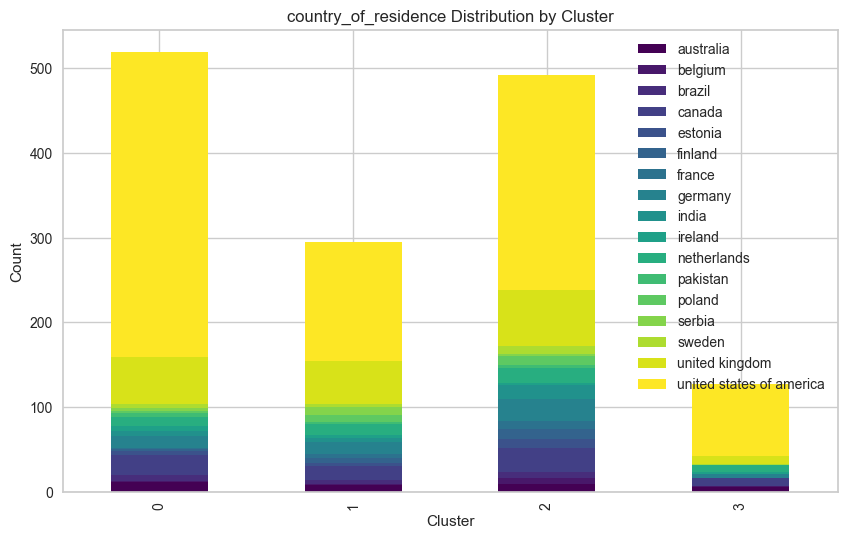

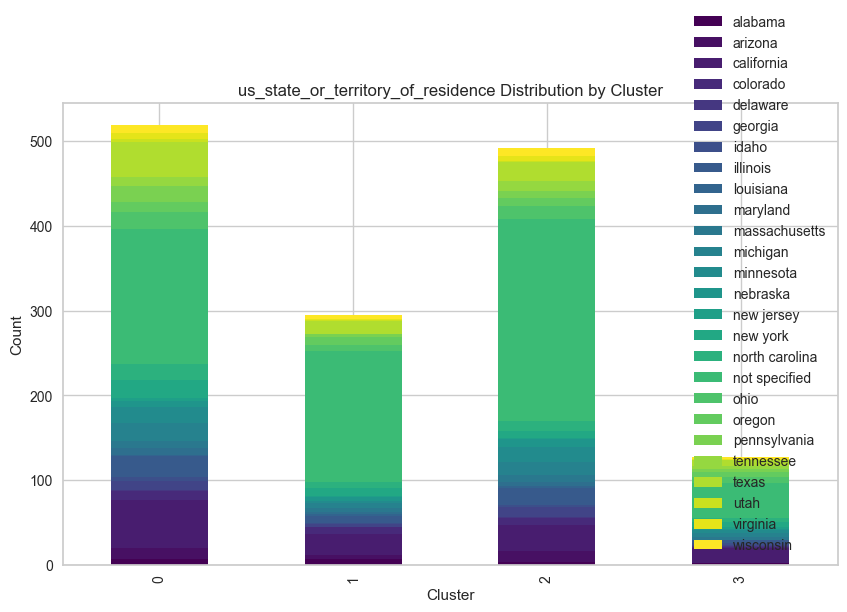

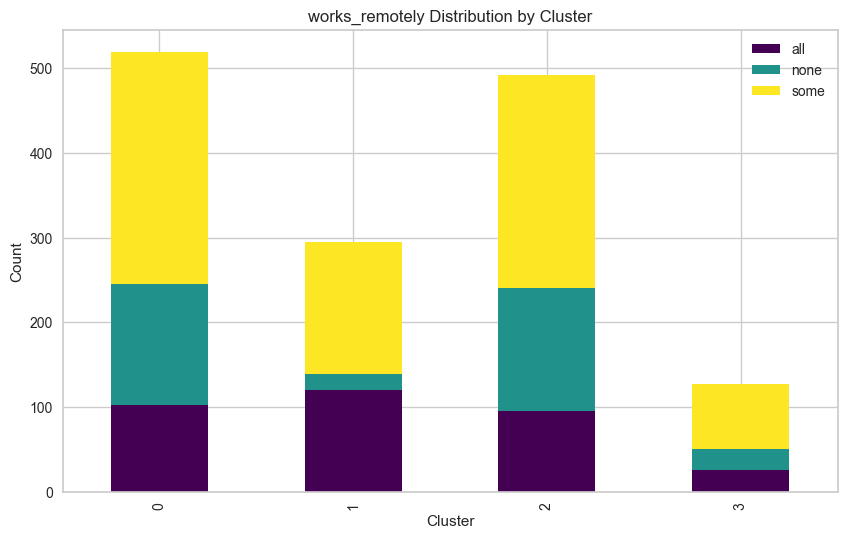

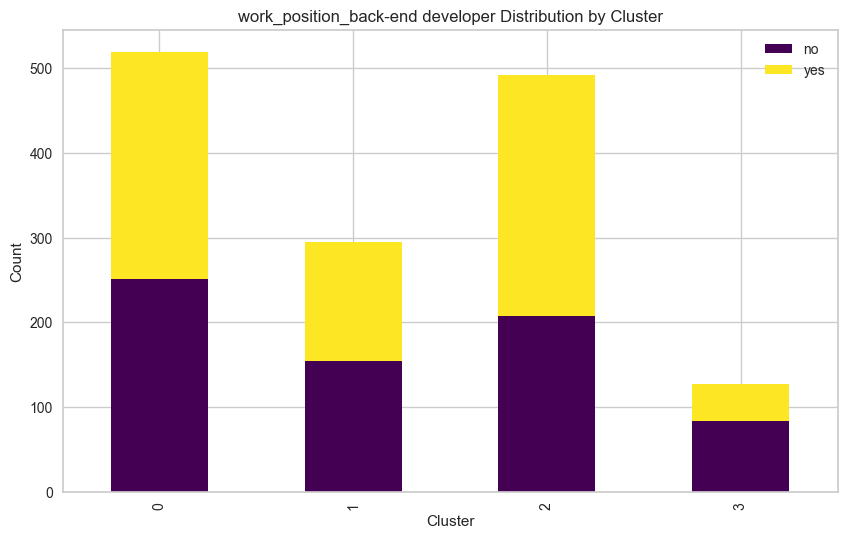

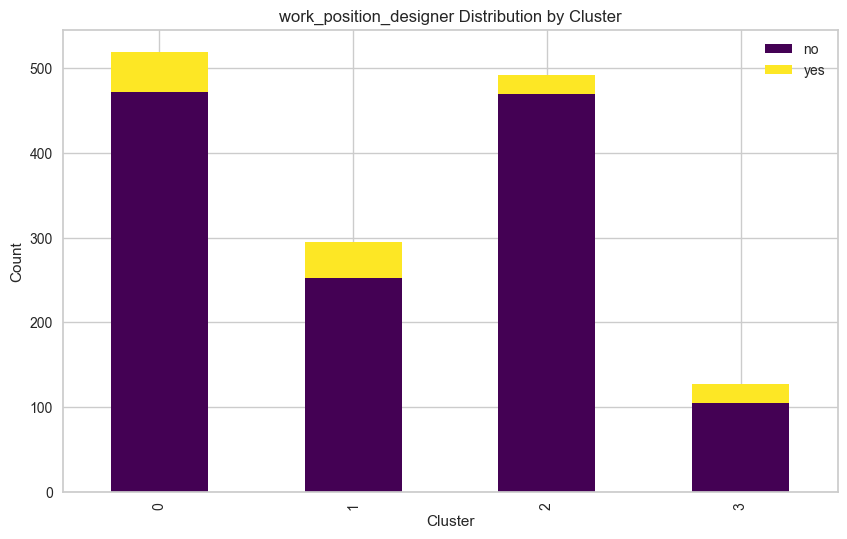

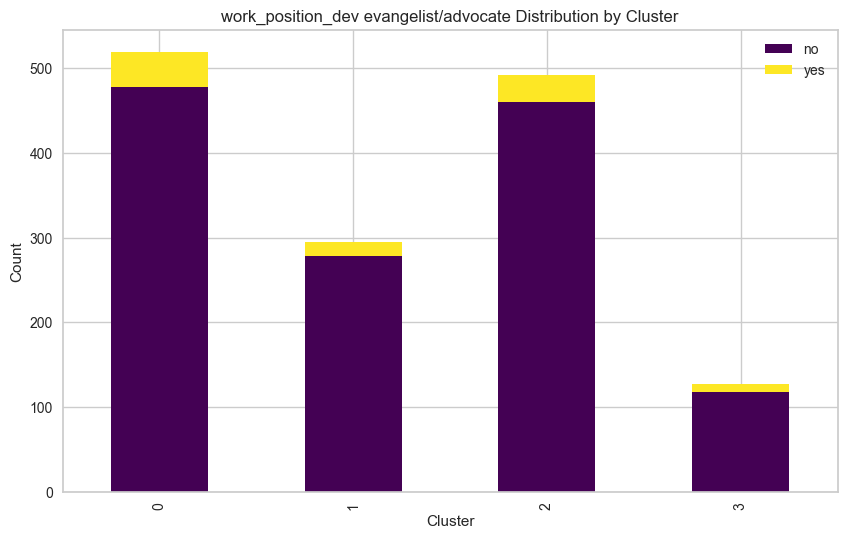

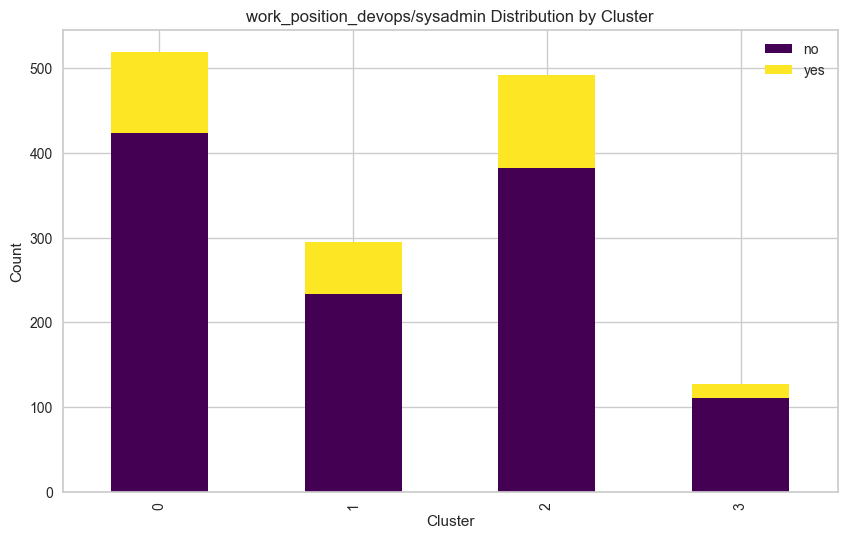

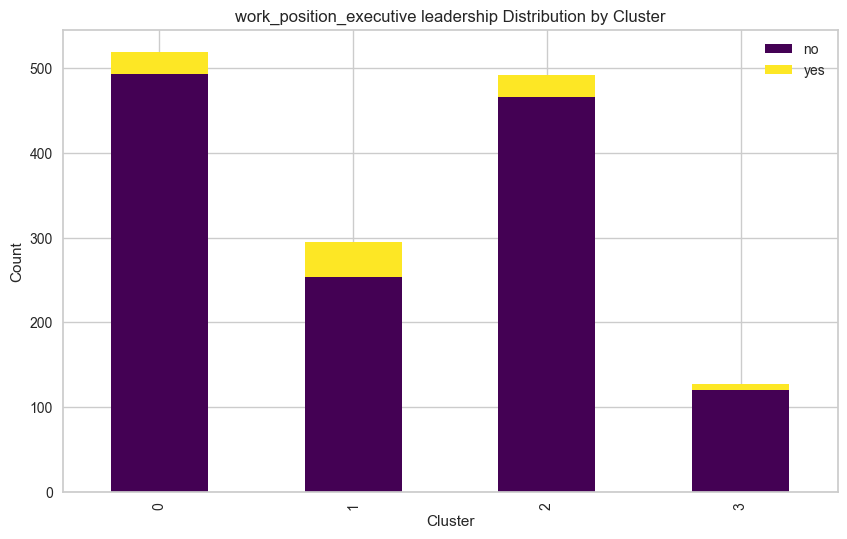

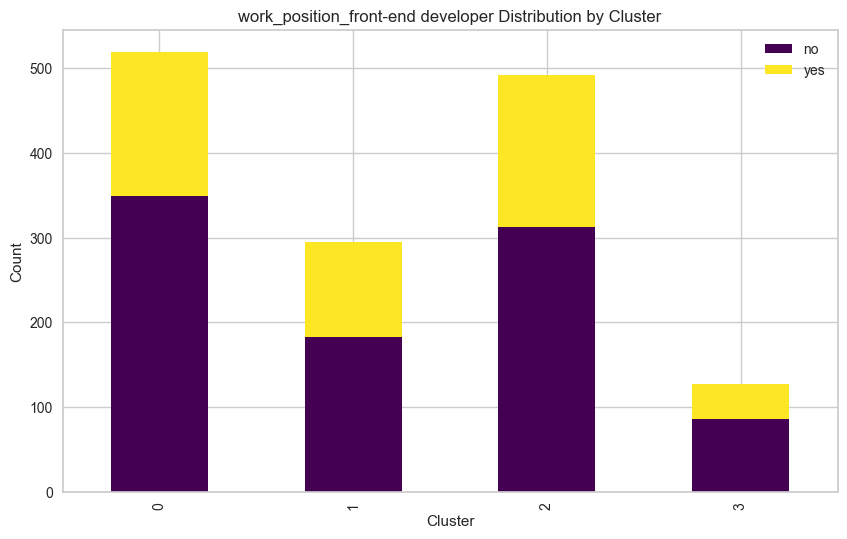

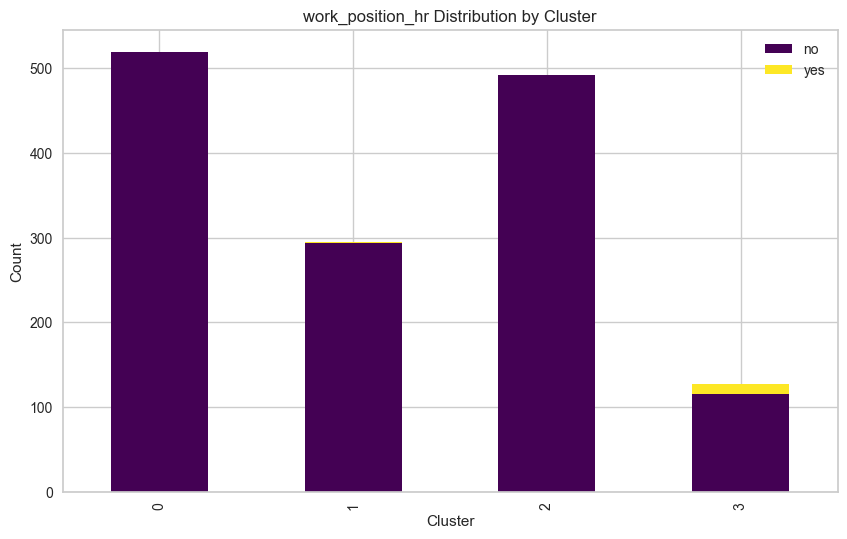

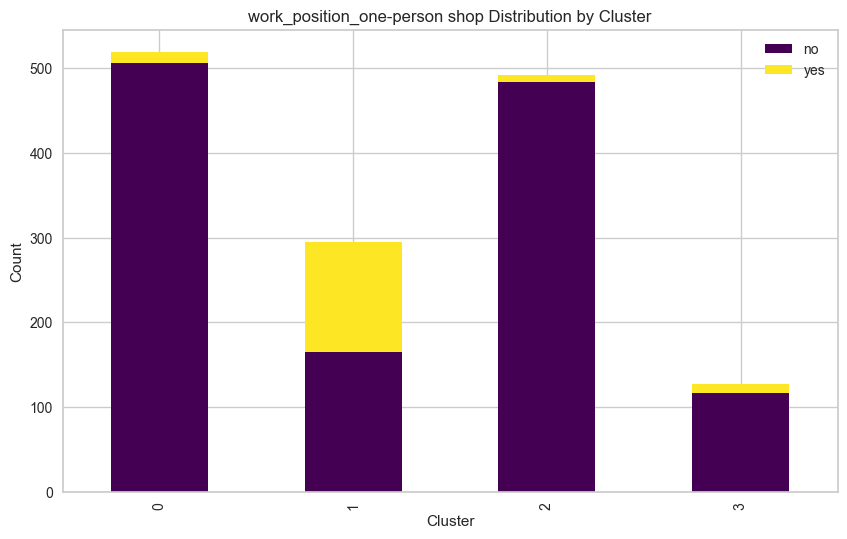

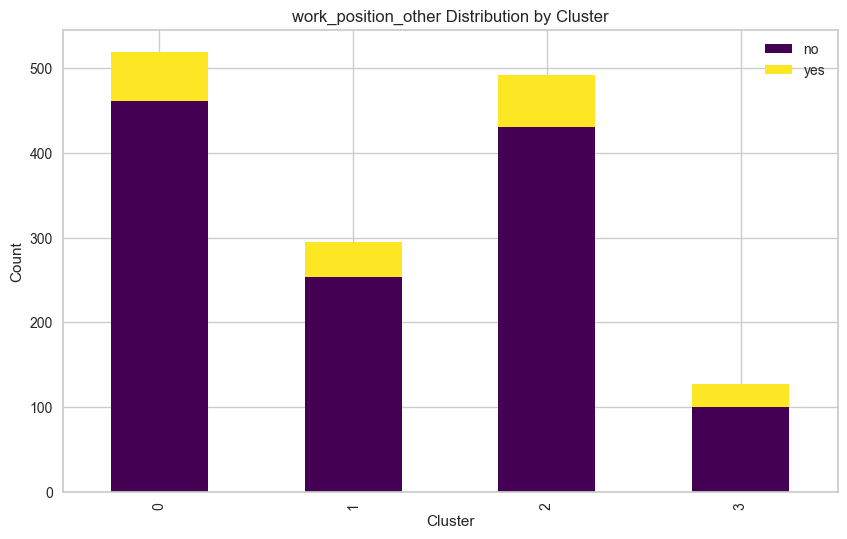

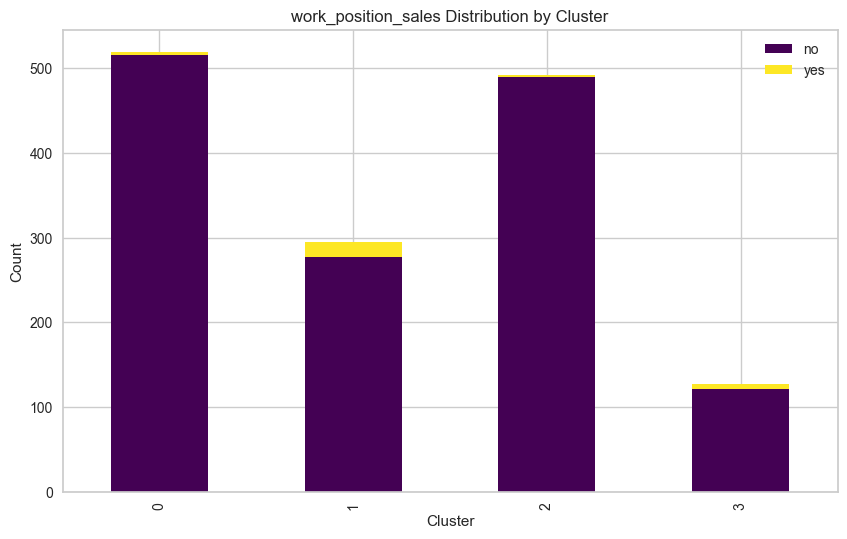

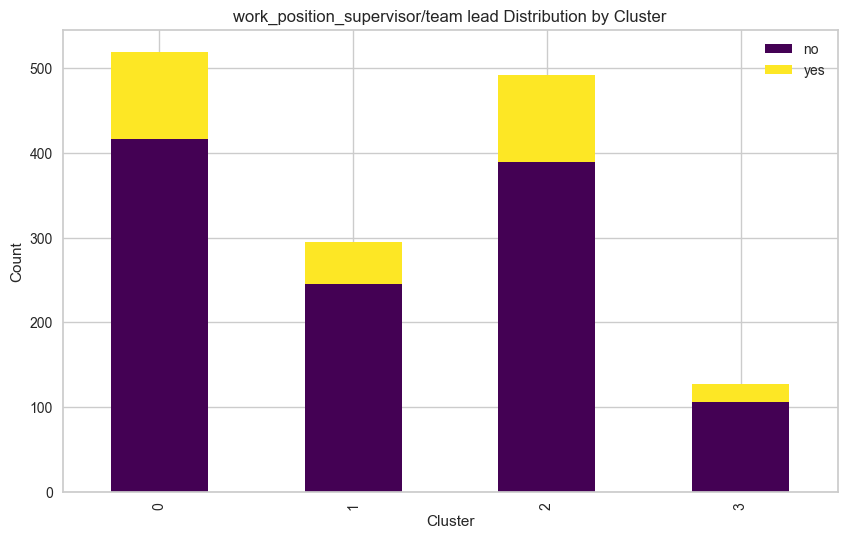

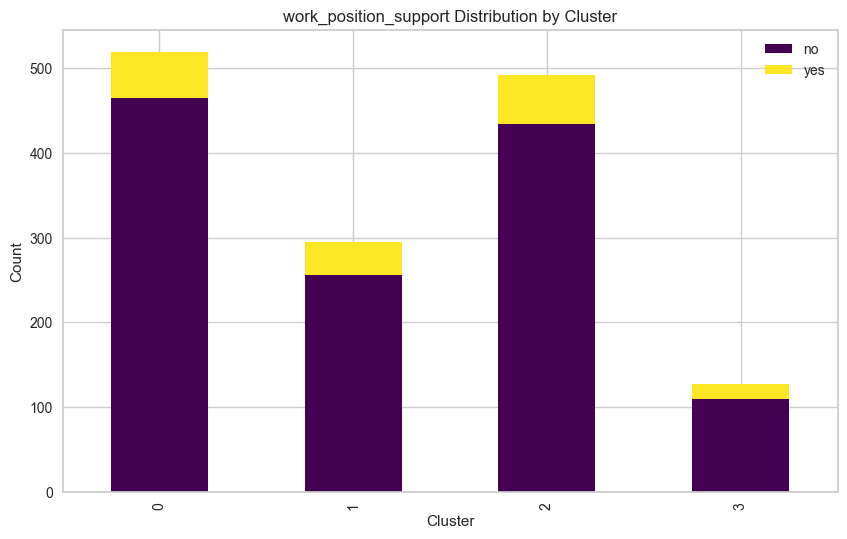

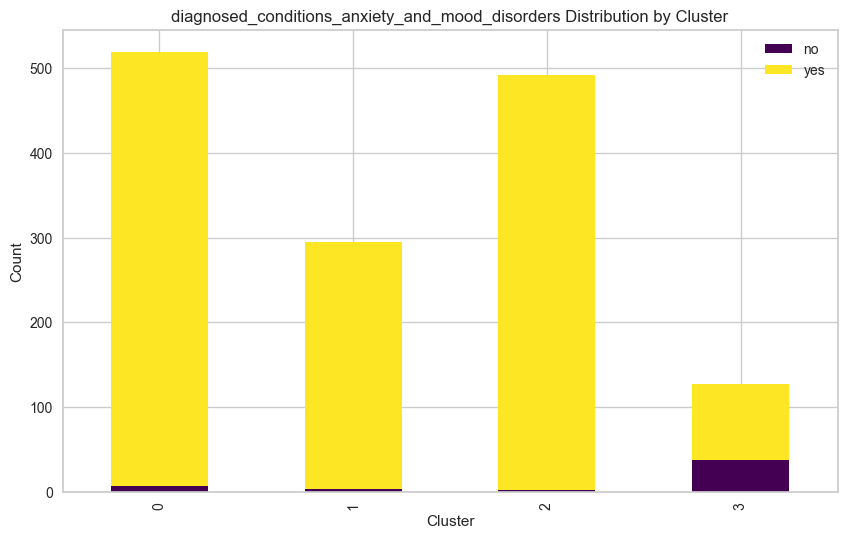

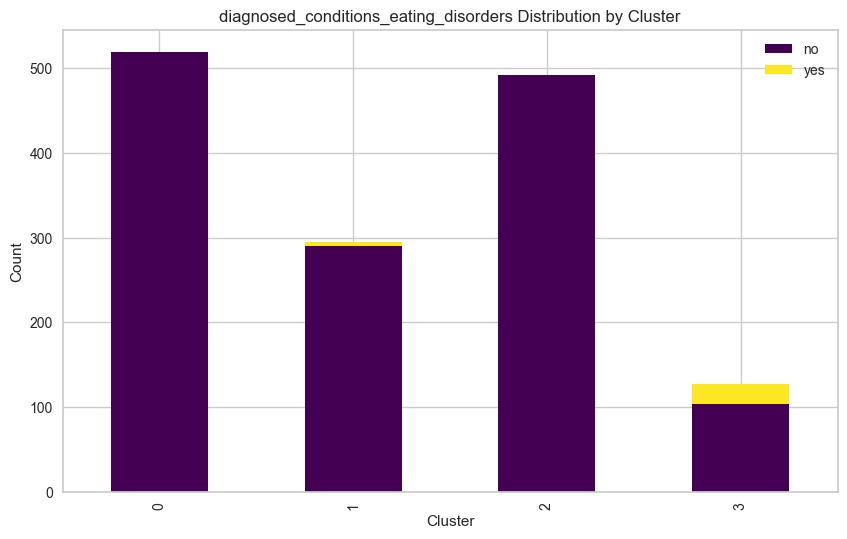

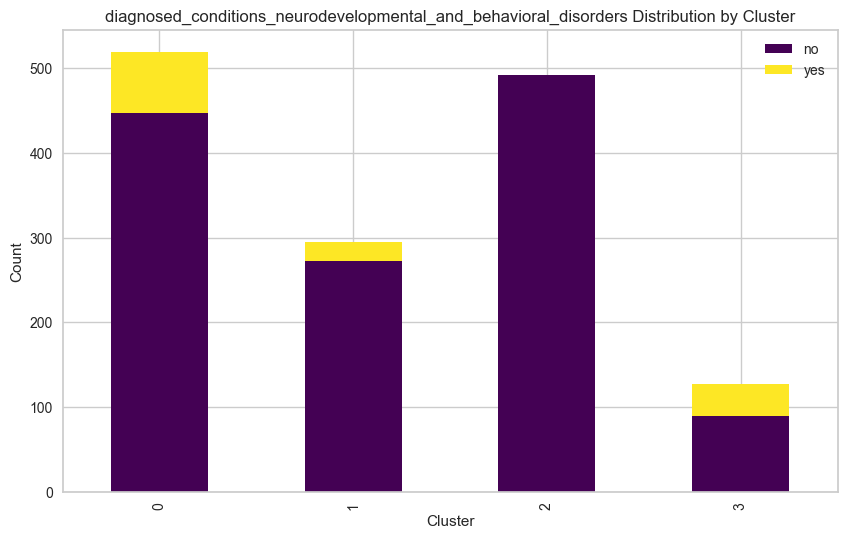

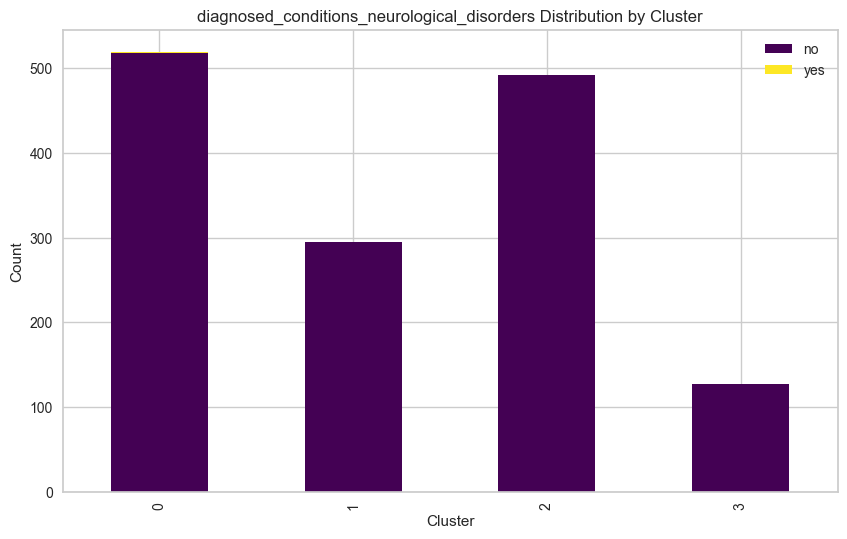

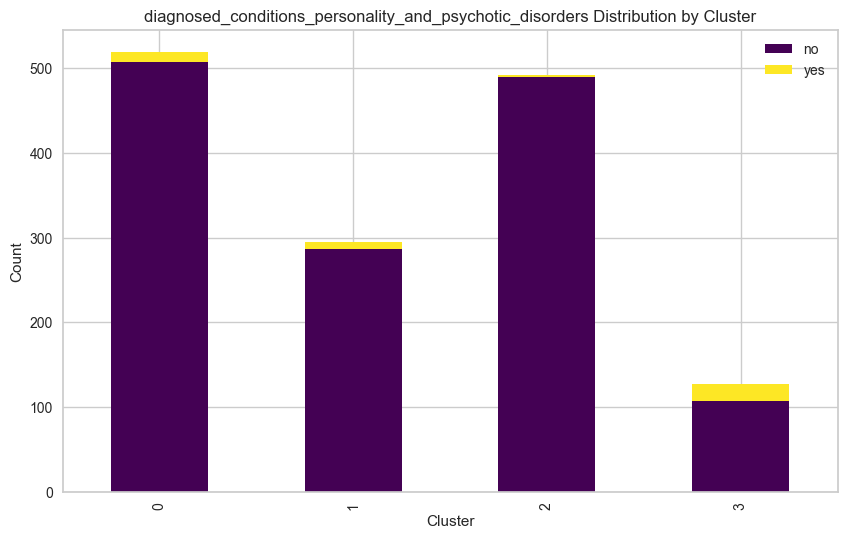

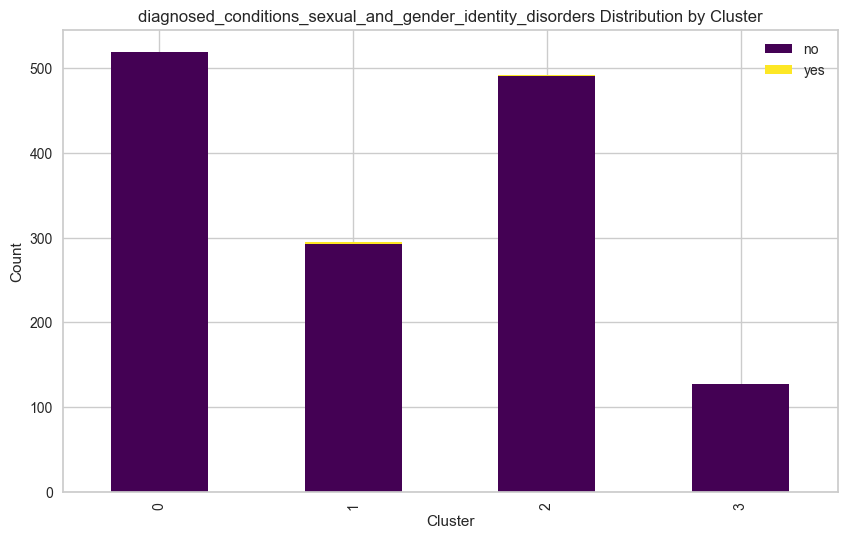

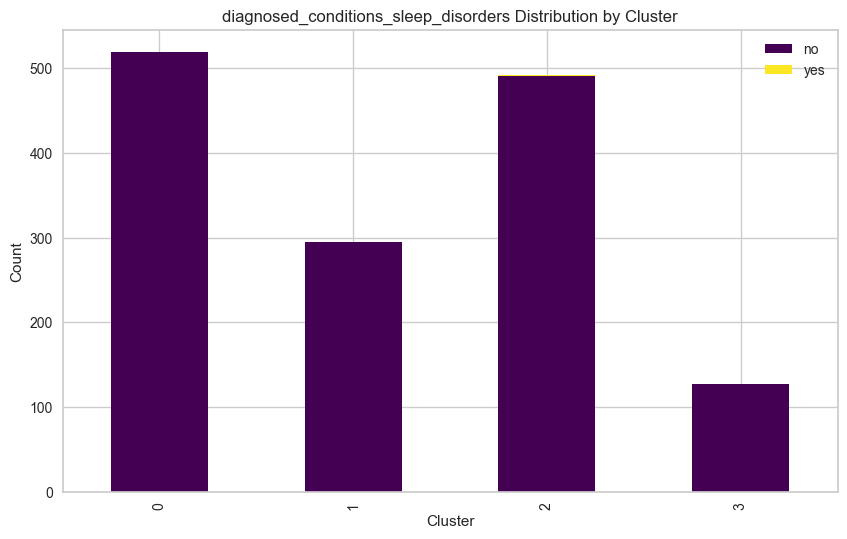

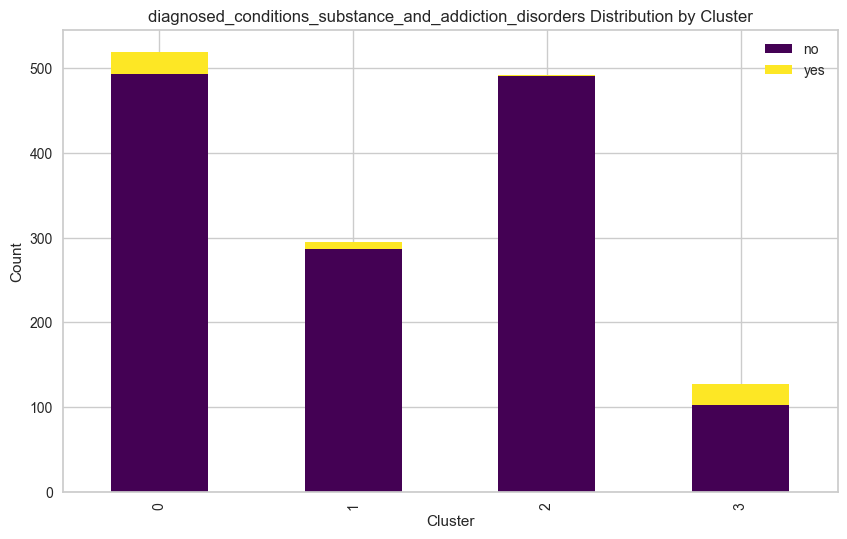

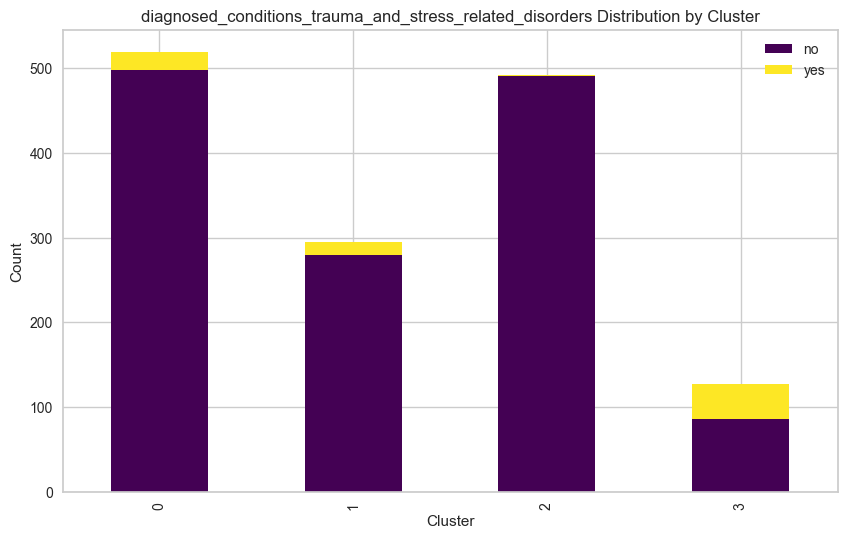

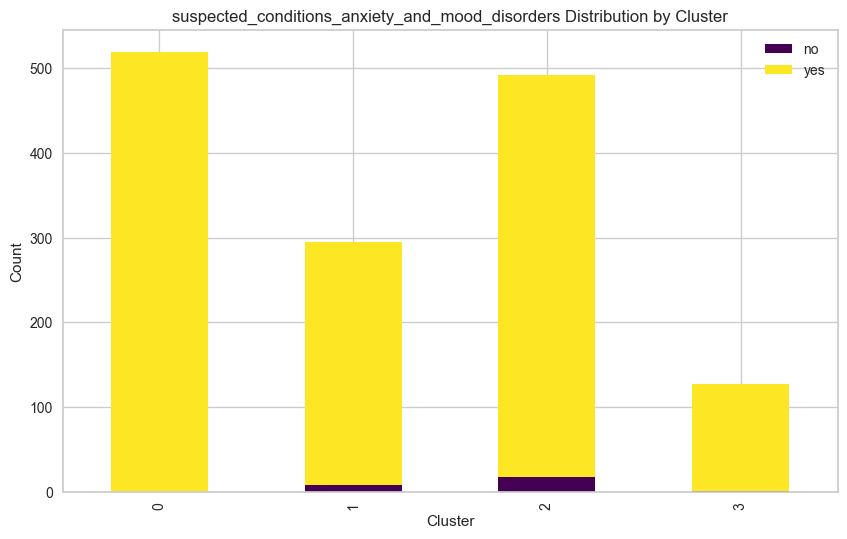

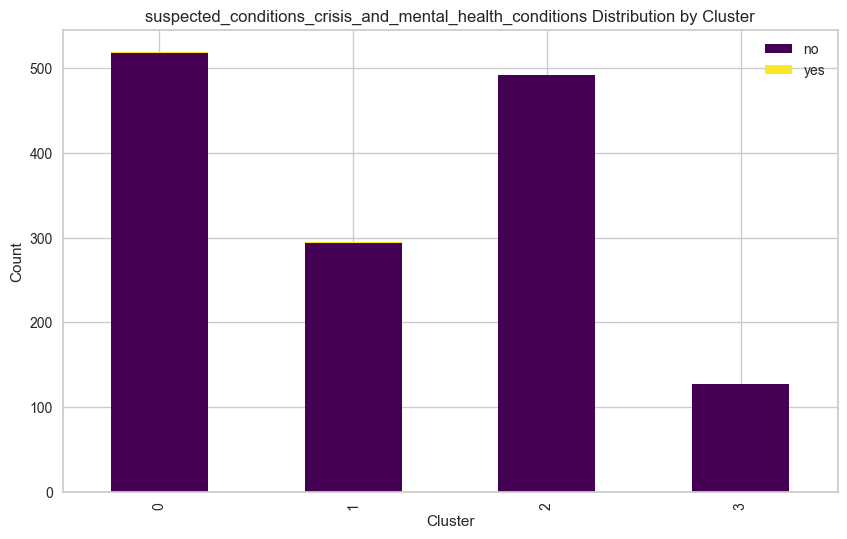

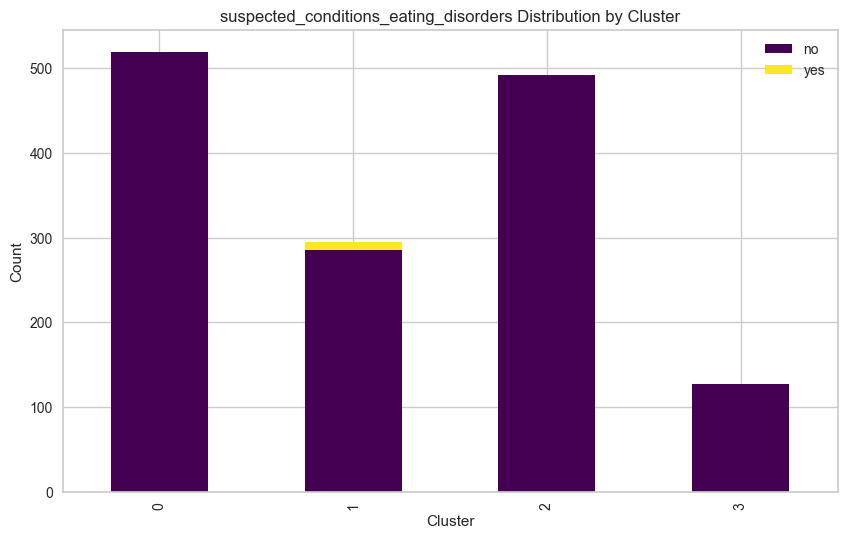

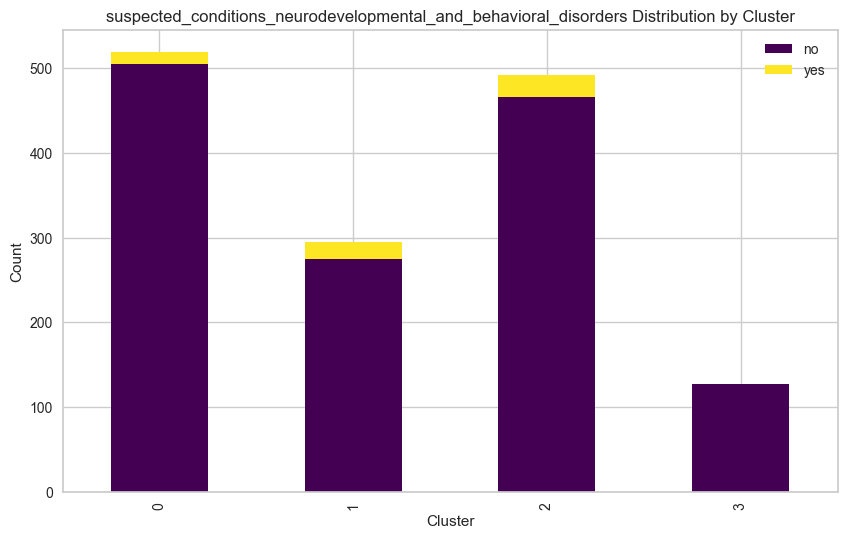

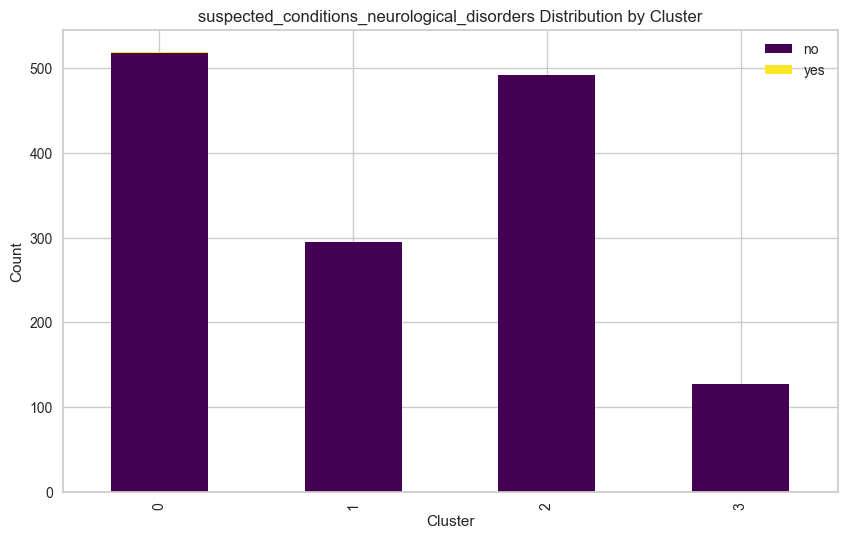

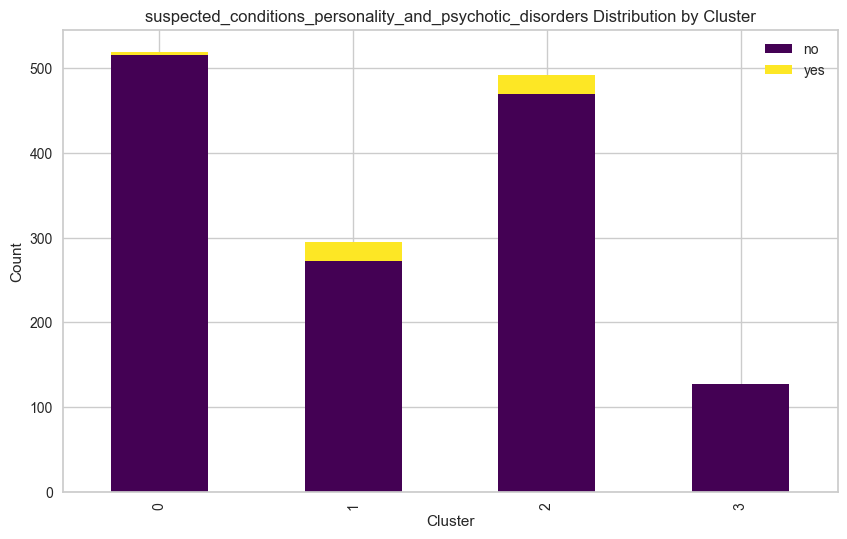

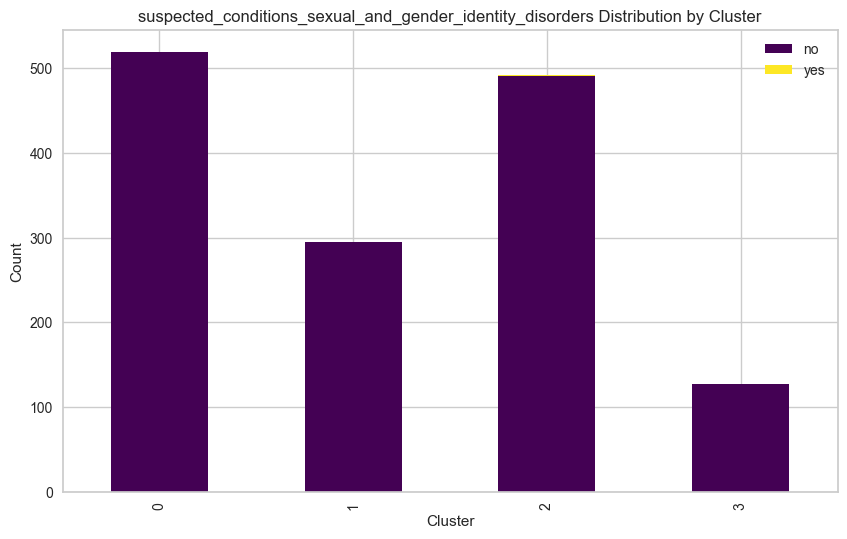

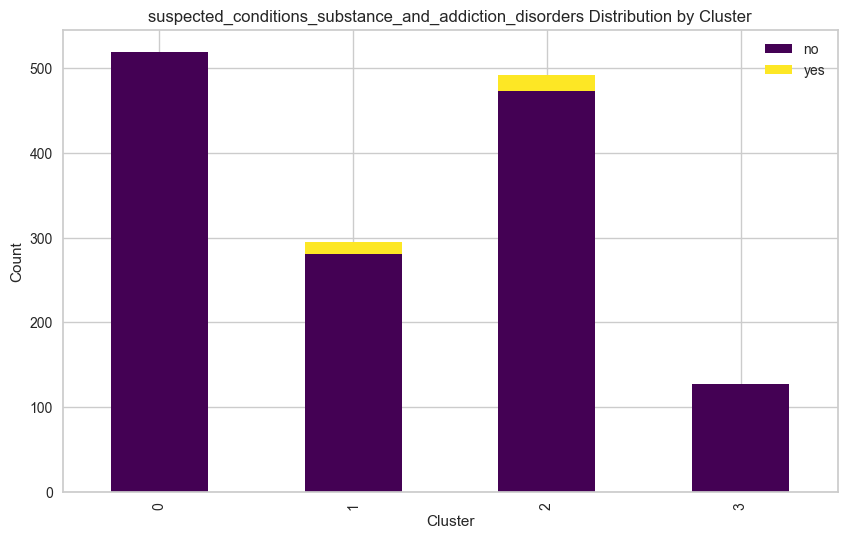

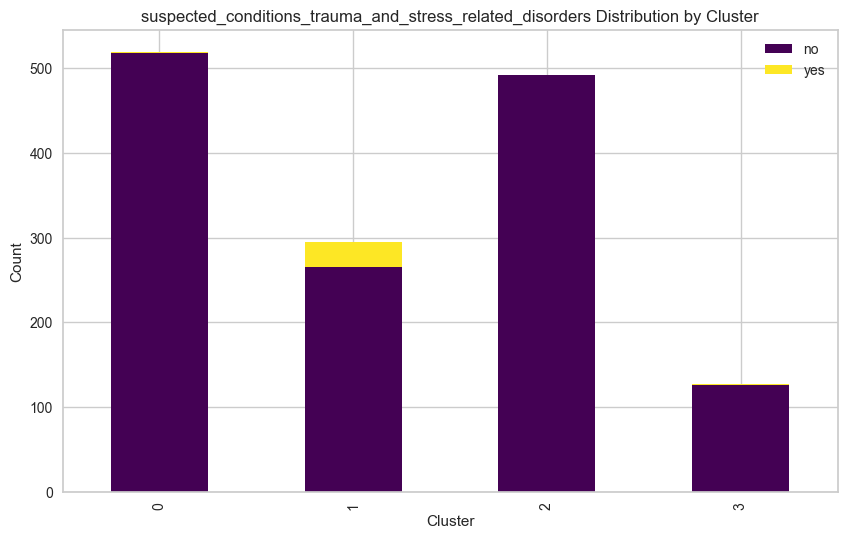

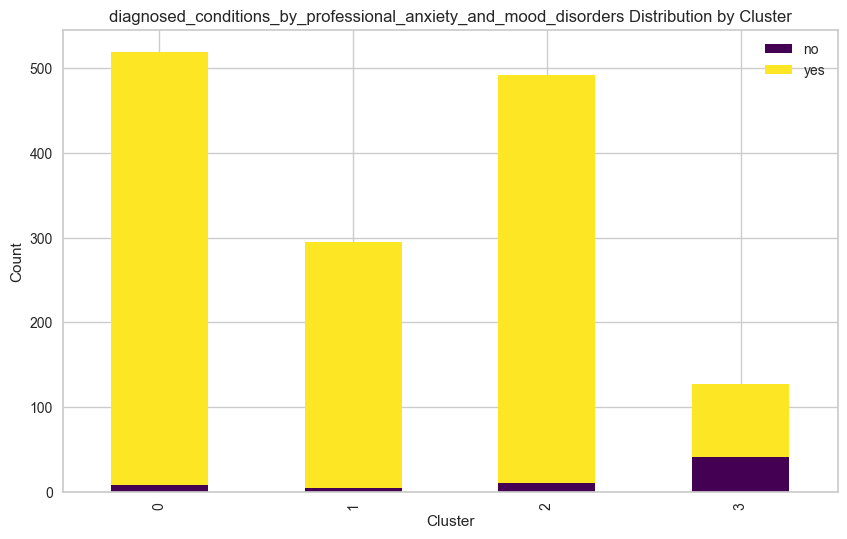

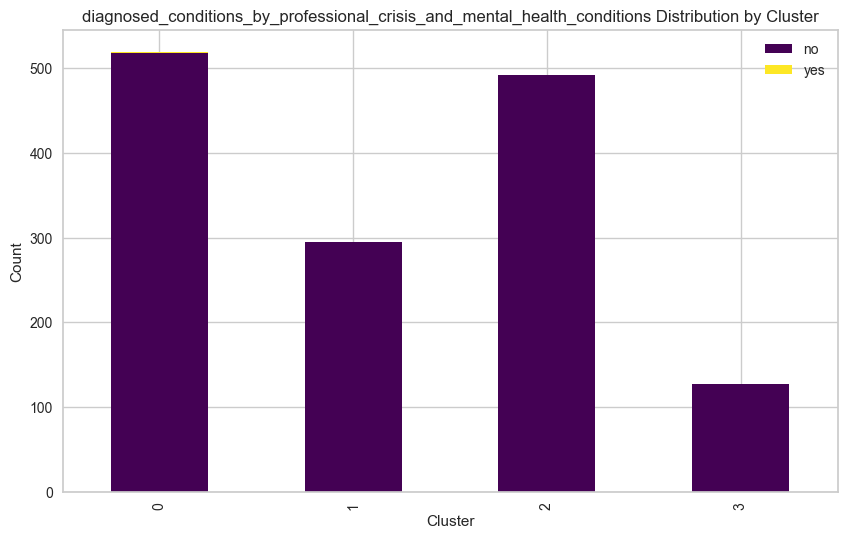

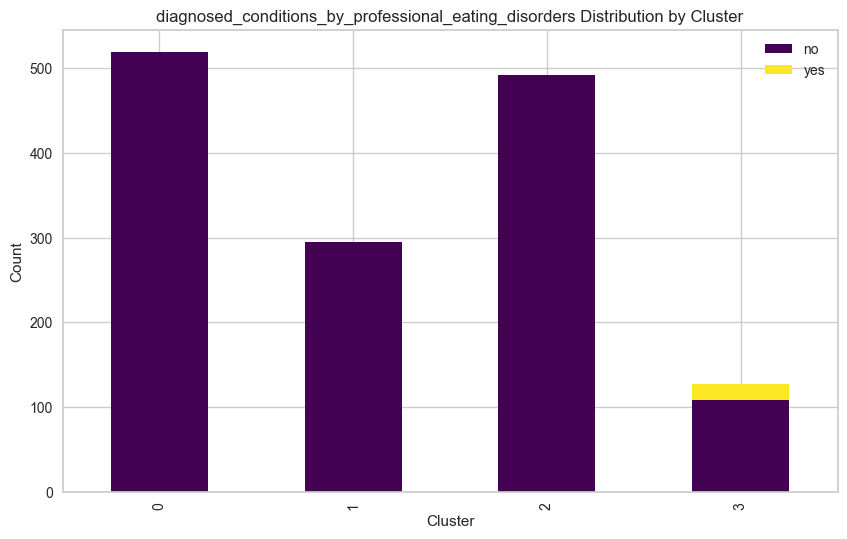

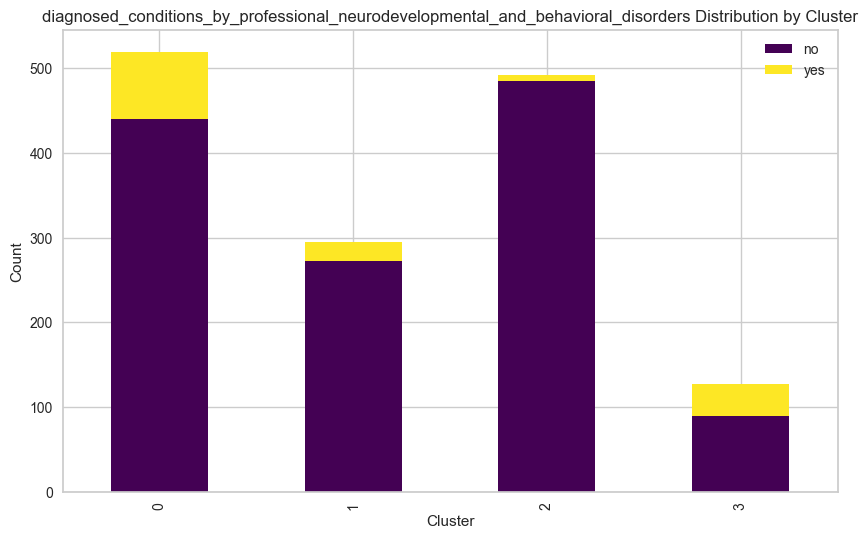

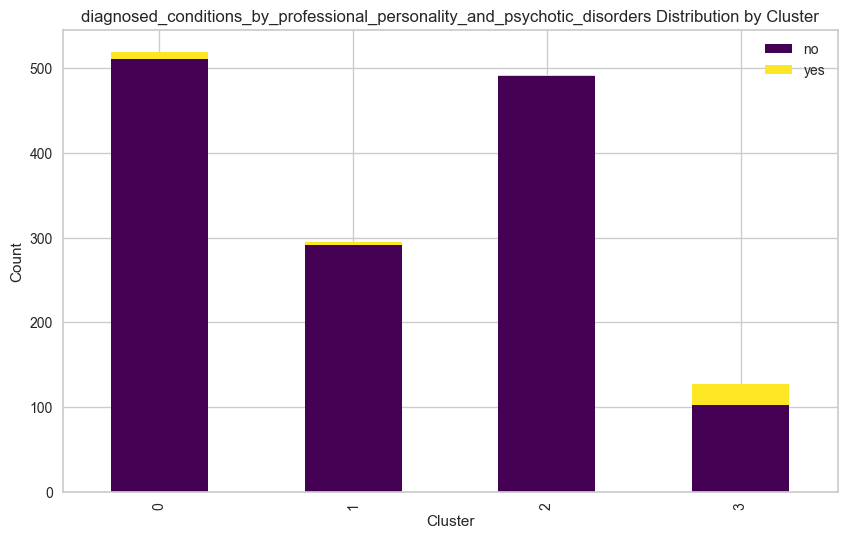

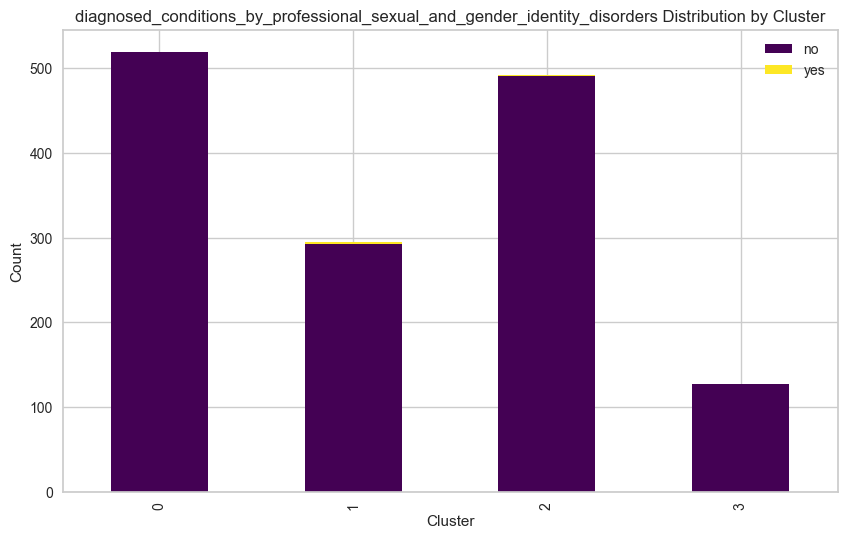

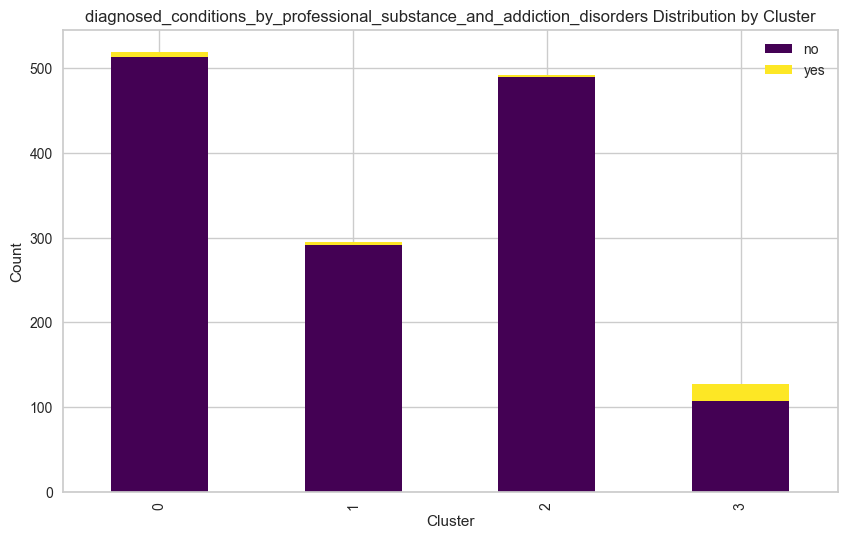

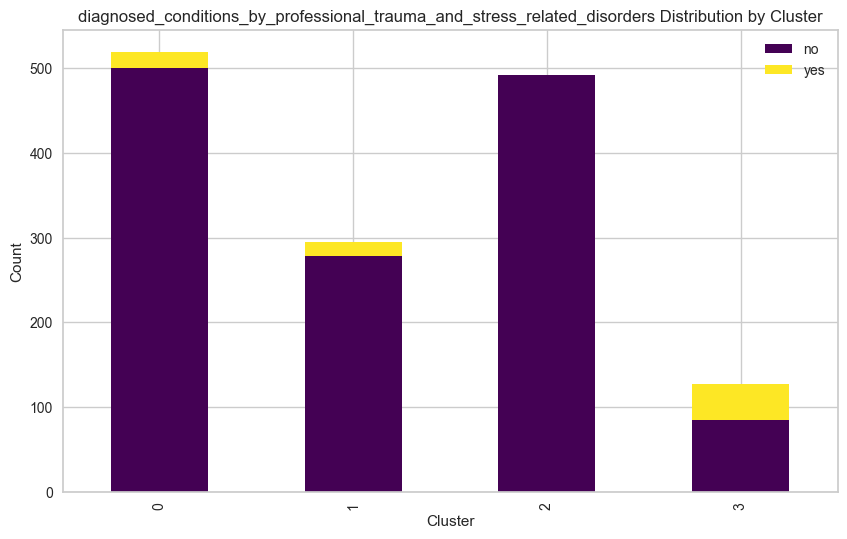

In [ ]:
# Stacked Bar Plot of All Columns
for column in data.columns:
    print(column)
    distribution = pd.crosstab(scaled_data['Cluster'], data[column])
    distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title(f'{column} Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title='')
    plt.show()